In [2]:
#Decommentt the lines below to change the current working directory to the parent directory. Then comment them back avoid the change for future runs.

#import os
#os.chdir('..')
#os.getcwd()

'/Users/mottad/Library/CloudStorage/OneDrive-LuxotticaGroupS.p.A/Desktop/news_classification'

In [37]:

from utils.preproc import *
import numpy as np
import yaml
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
with open("config/config.yaml", 'r') as ymlfile:
    config = yaml.safe_load(ymlfile)
    
LABEL_NAMES = config['LABEL_NAMES']

In [5]:
dev_df, _ = load_data("data/development.csv", sep=",", dtype = {"id": str, "page_rank": int, "label": int})
dev_df_original = dev_df.copy()

Development set: 79,997 samples, 7 columns


In [6]:
dev_df['category'] = dev_df['label'].apply(lambda x: LABEL_NAMES[x])

### Category distribution

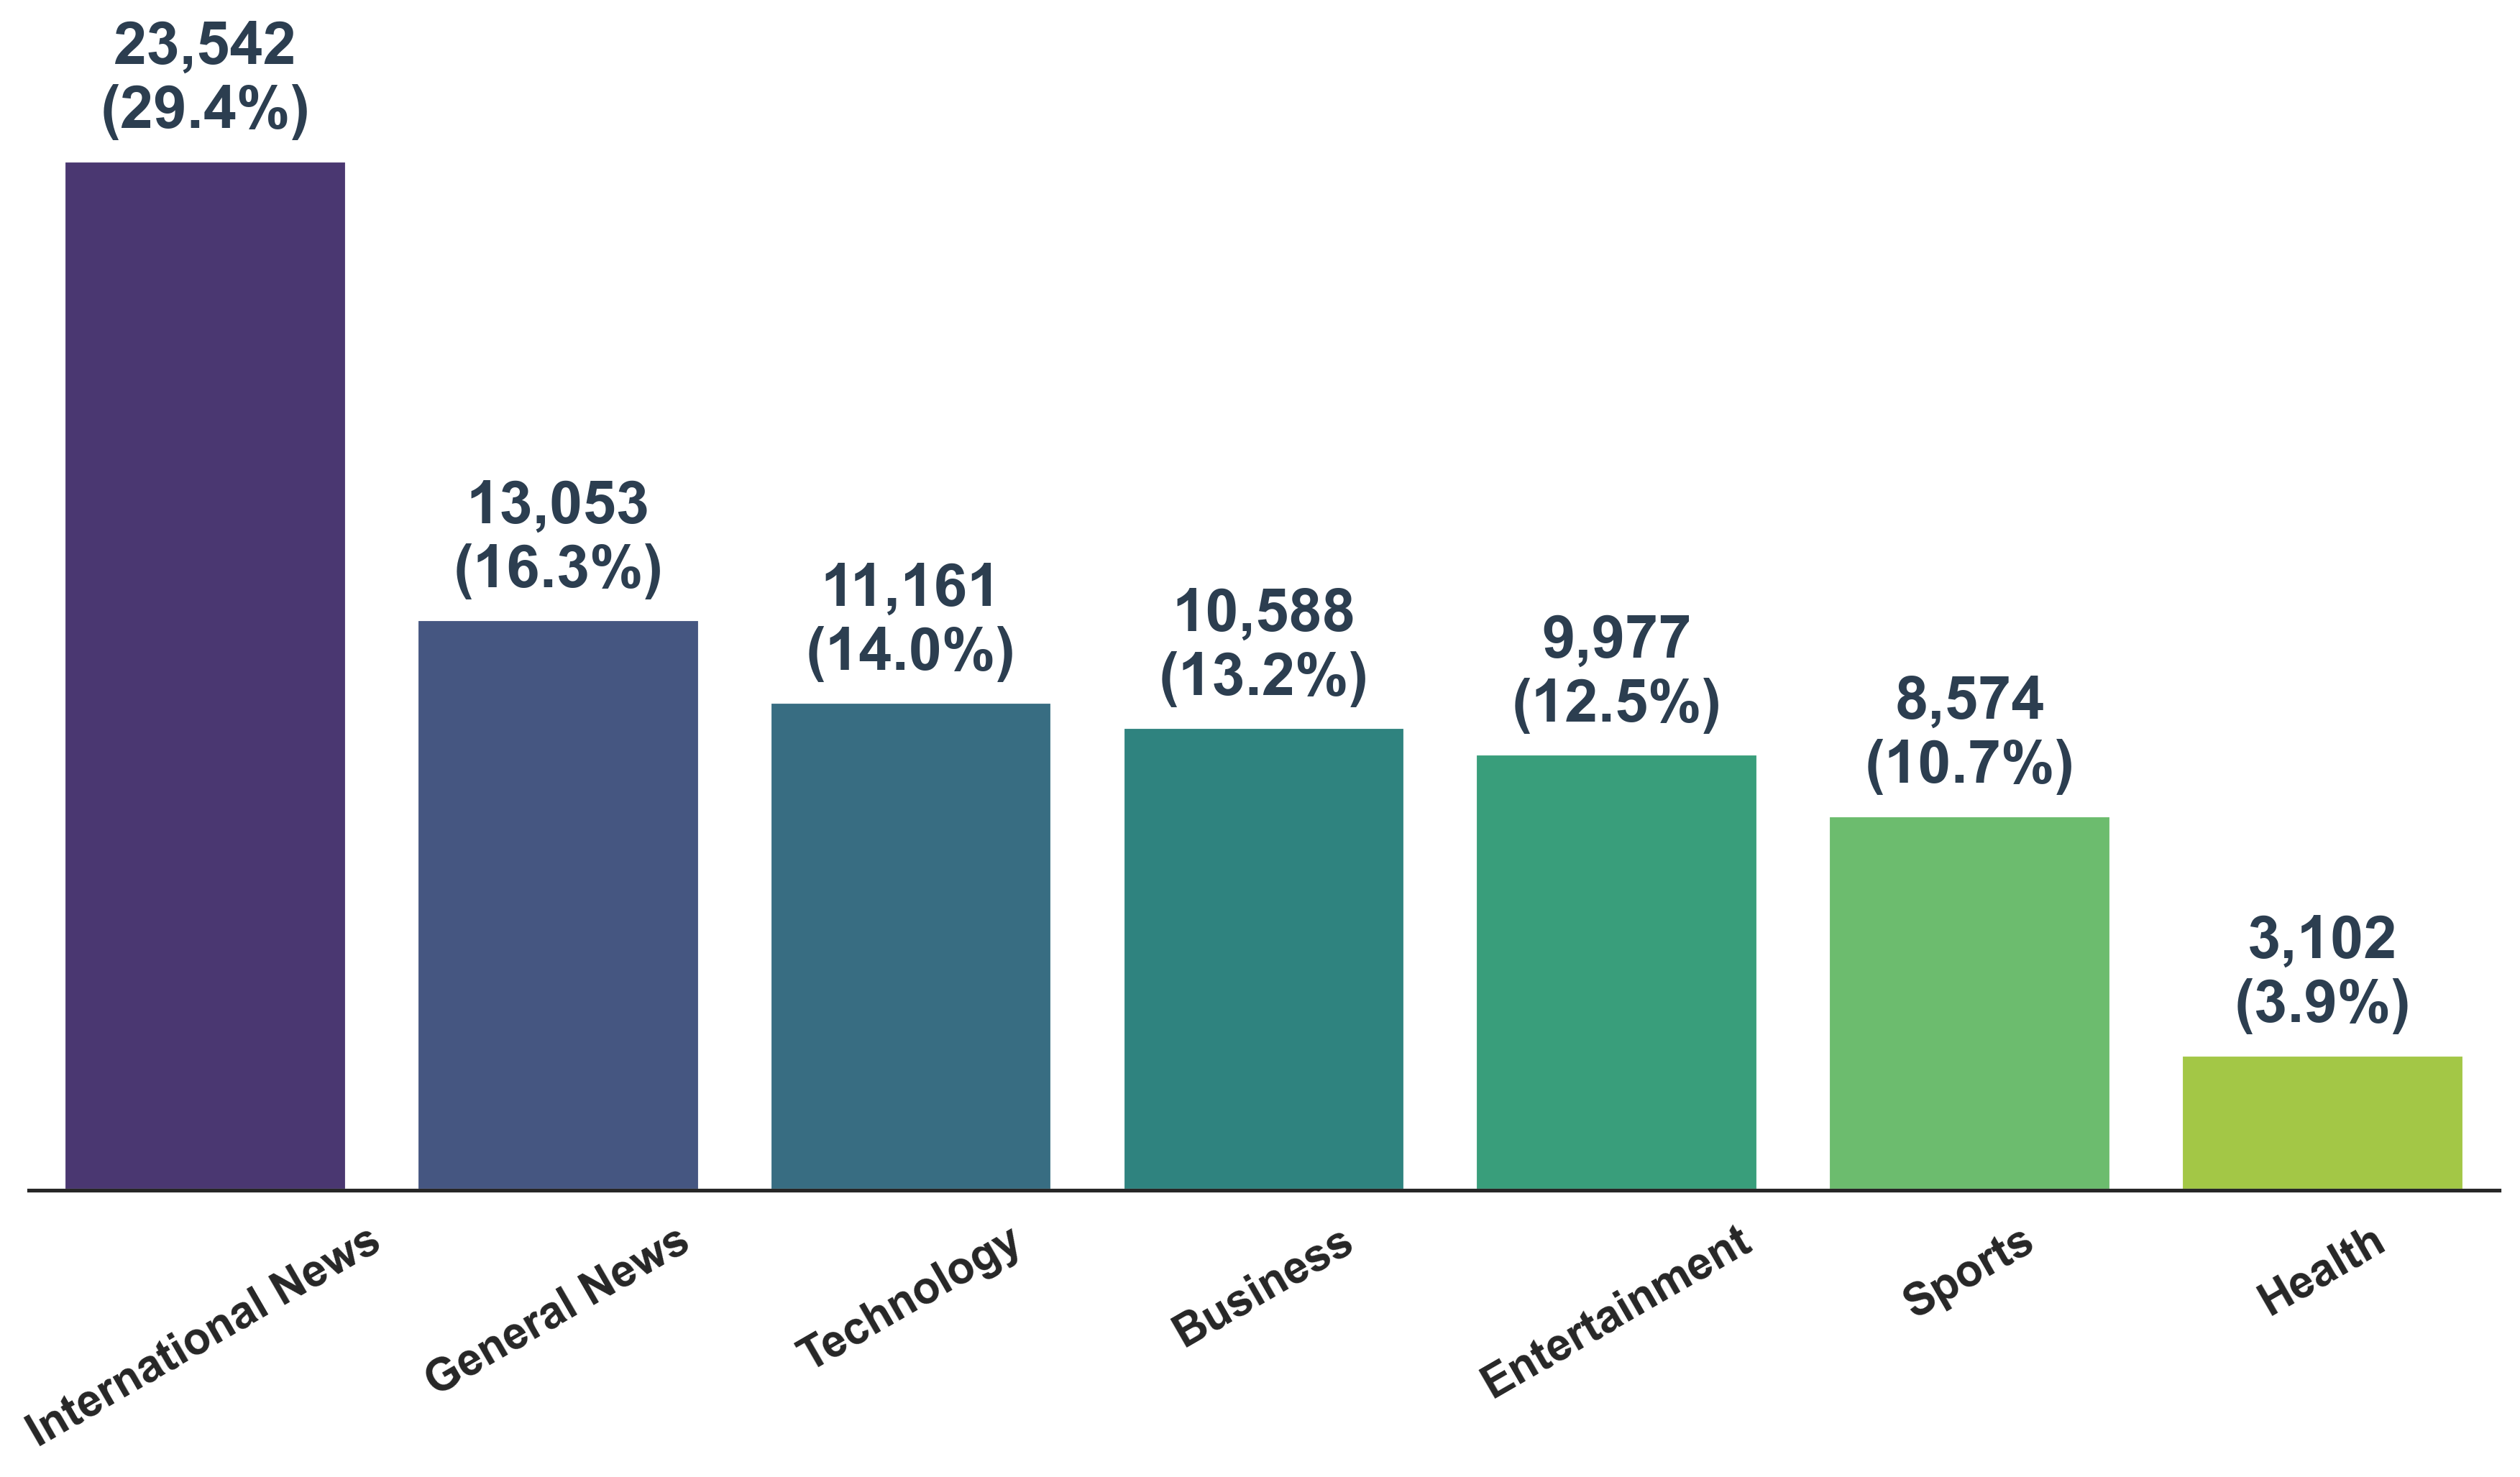

In [71]:






sns.set_theme(style="white")
plt.figure(figsize=(12, 7), dpi=300)


counts = dev_df['category'].value_counts()
pcts = (counts / counts.sum()) * 100

ax = sns.barplot(x=counts.index, y=counts.values, hue=counts.index, palette='viridis', legend=False)


for i, (count, perc) in enumerate(zip(counts, pcts)):
    ax.text(i, count + (max(counts) * 0.02), f'{count:,}\n({perc:.1f}%)', 
            ha='center', va='bottom', fontsize=20, fontweight='bold', color='#2c3e50')


ax.spines[['top', 'right', 'left']].set_visible(False)
ax.yaxis.set_visible(False)

#plt.title('Distribution of Categories in Development Set', fontsize=18, fontweight='bold', pad=30)
plt.xlabel('')
plt.xticks(fontsize=15, fontweight='bold', rotation=30)#

plt.tight_layout()

plt.savefig('report/category_distribution.svg', bbox_inches='tight')
plt.savefig('report/category_distribution.pdf', bbox_inches='tight')
plt.savefig('report/category_distribution.png', bbox_inches='tight', dpi=300)

plt.show()



### Page Rank distributions among categories

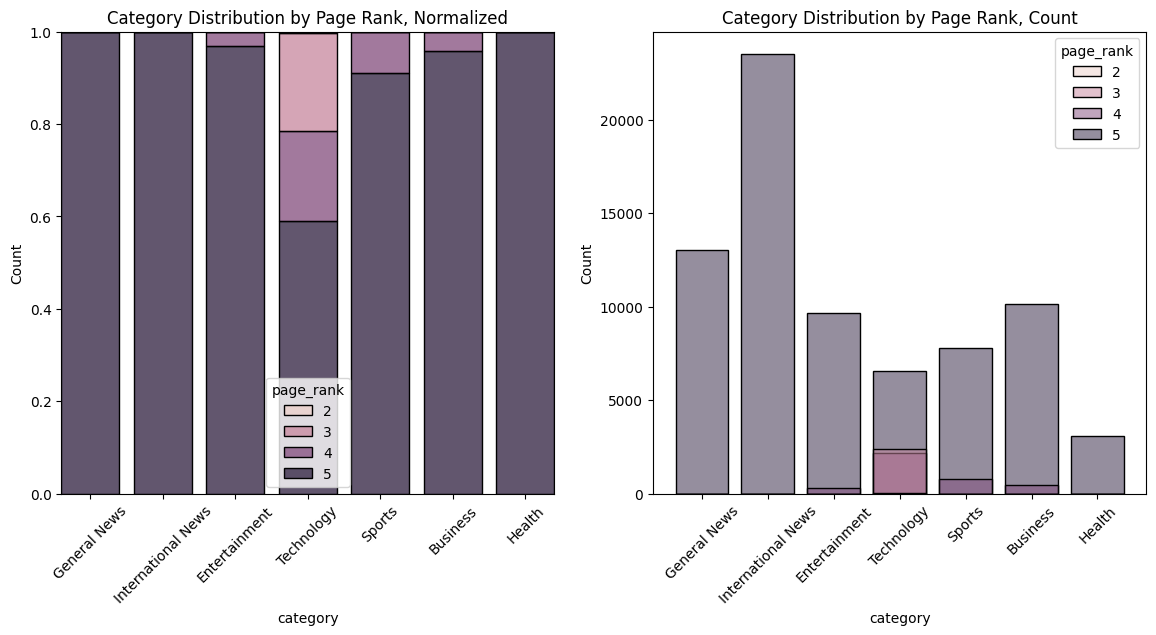

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))

sns.histplot(data=dev_df, x='category', hue='page_rank', shrink = 0.8, multiple='fill', ax=ax1)
ax1.set_title('Category Distribution by Page Rank, Normalized')
ax1.tick_params(axis='x', rotation=45)


sns.histplot(data=dev_df, x='category', hue='page_rank', shrink = 0.8, ax=ax2)
ax2.set_title('Category Distribution by Page Rank, Count')
ax2.tick_params(axis='x', rotation=45)




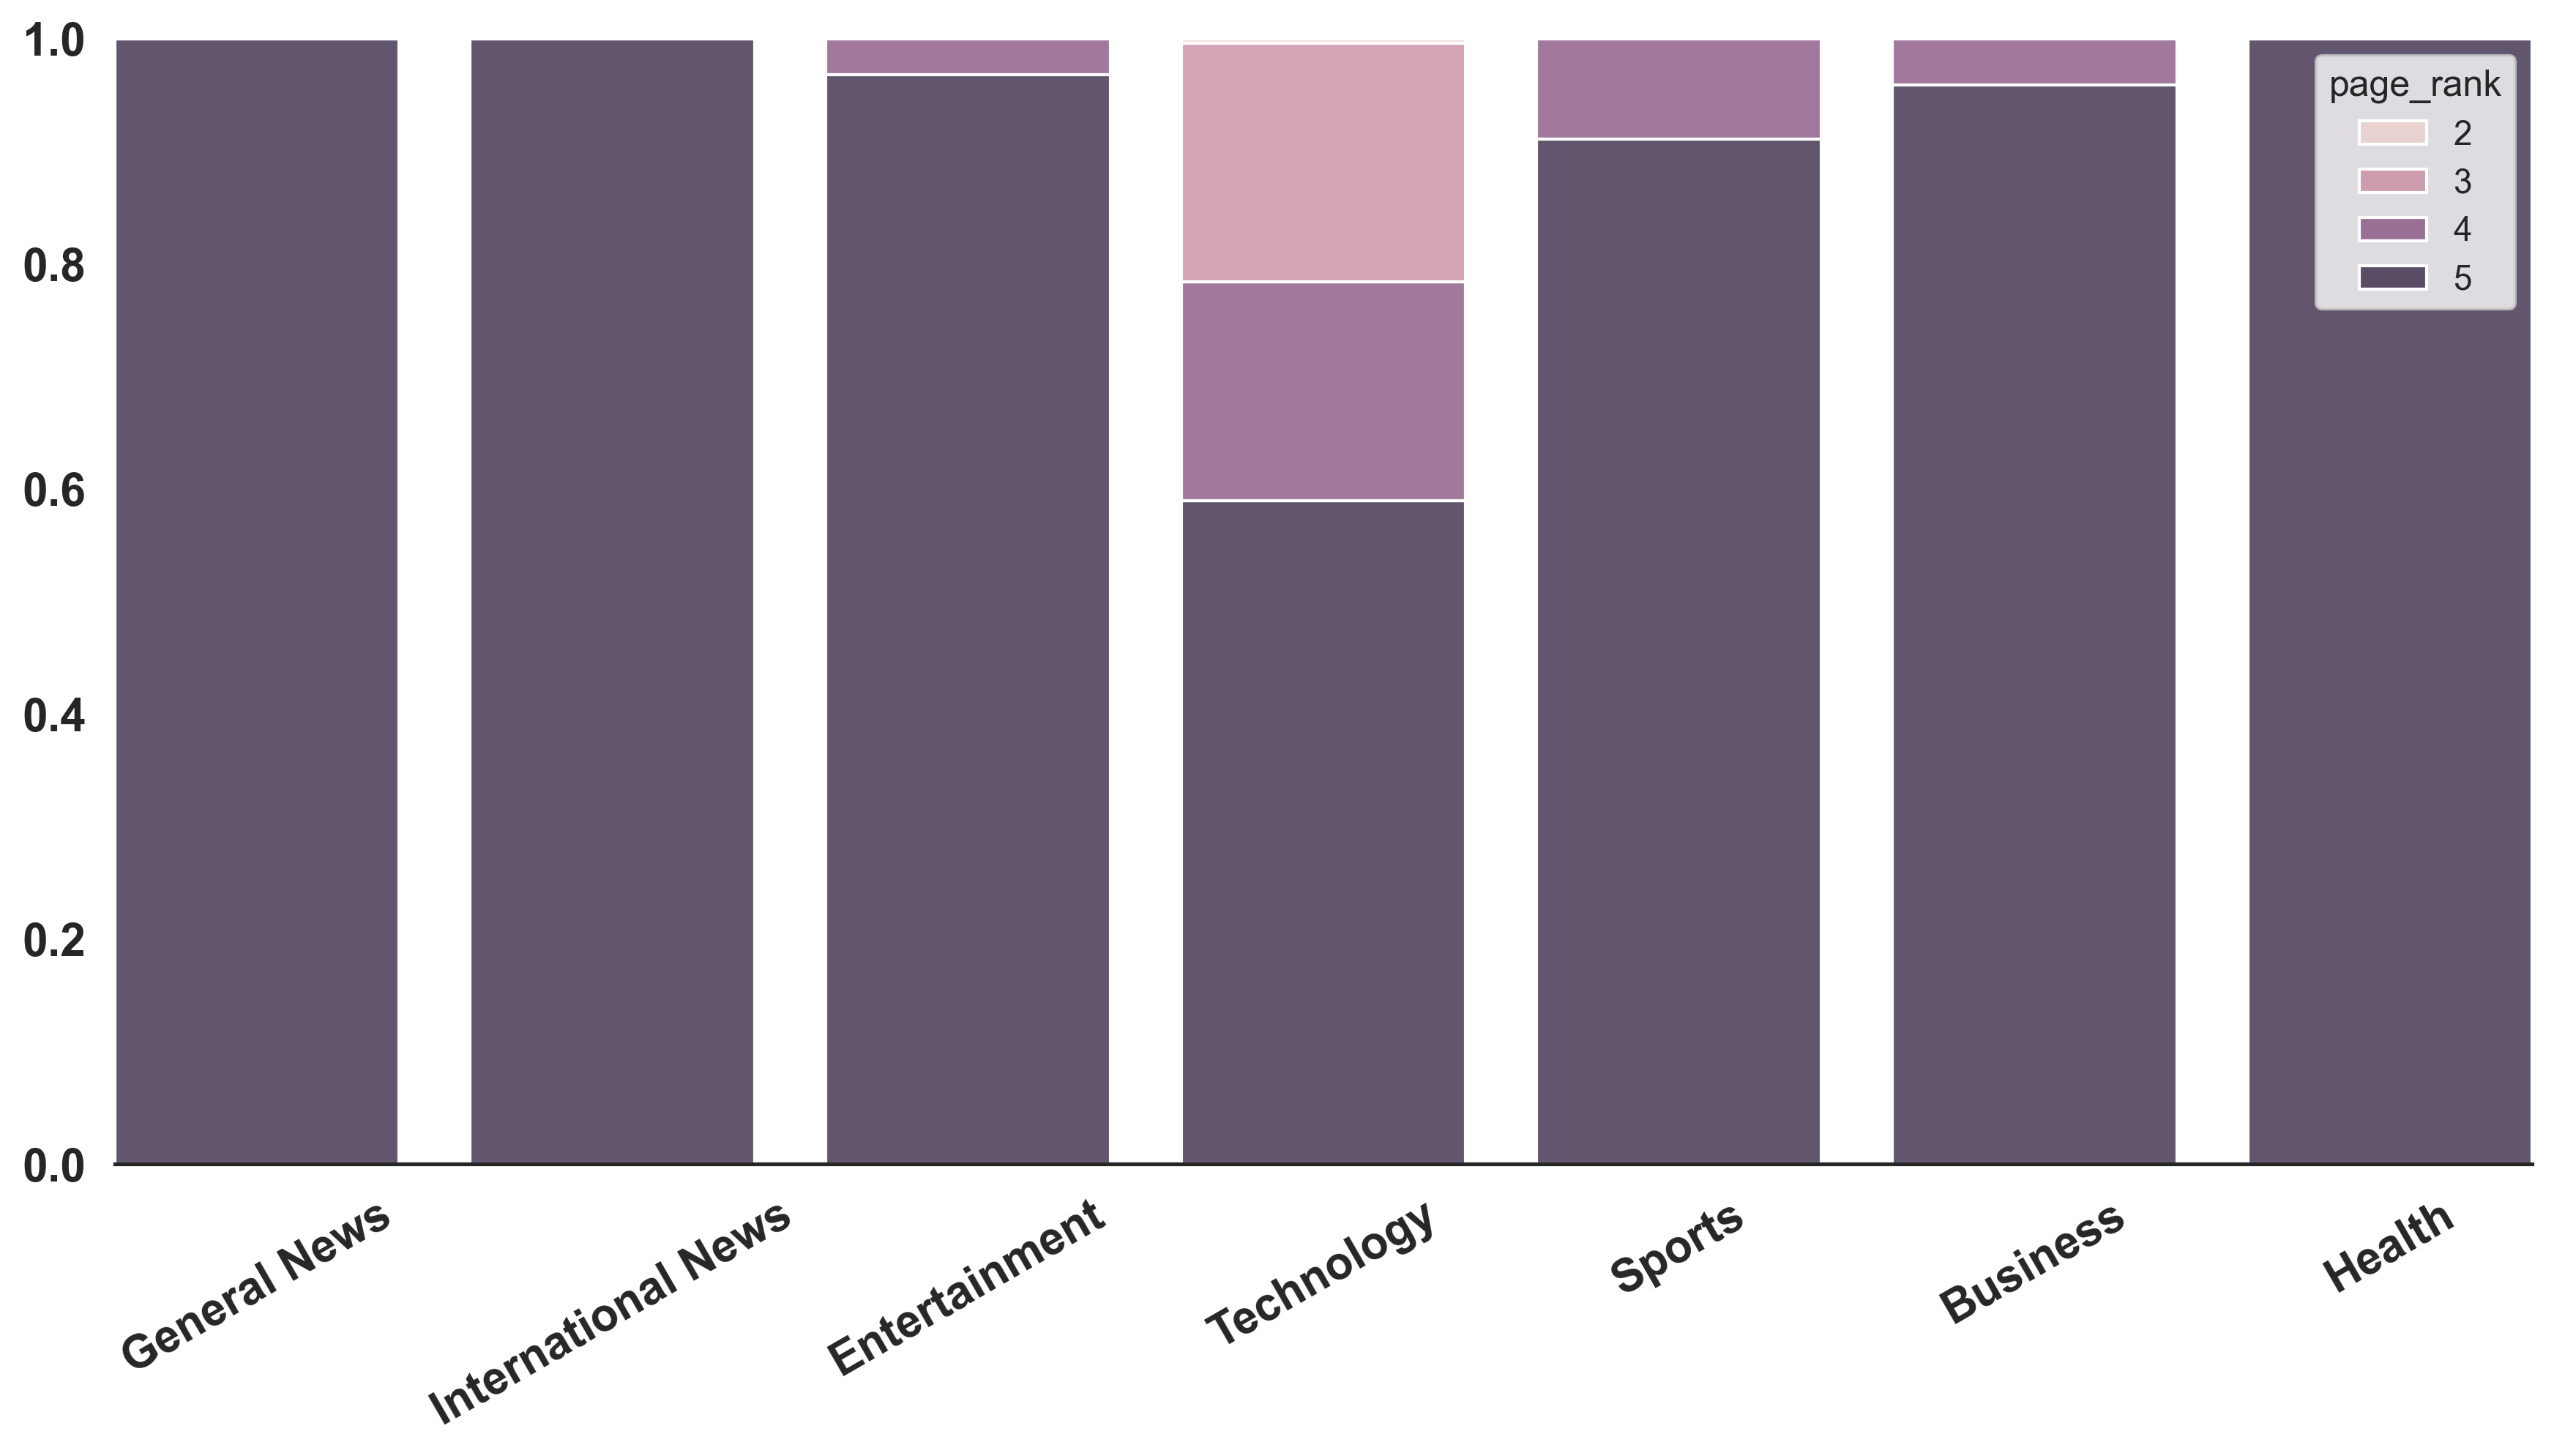

In [77]:
sns.set_theme(style="white")
plt.figure(figsize=(12, 7), dpi=300)


ax = sns.histplot(data=dev_df, x='category', hue='page_rank', shrink = 0.8, multiple='fill')
#ax.set_title('Category Distribution by Page Rank, Normalized', fontsize=18, fontweight='bold', pad=30)

#plt.xlabel('Category', fontsize=14, labelpad=15)
plt.xticks(fontsize=15, fontweight='bold', rotation=30)
plt.yticks(fontsize=15, fontweight='bold')


plt.tight_layout()

ax.spines[['top', 'right', 'left']].set_visible(False)
plt.xlabel('')
plt.ylabel('')


plt.savefig('report/page_rank_distribution.svg', bbox_inches='tight')
plt.savefig('report/page_rank_distribution.pdf', bbox_inches='tight')
plt.savefig('report/page_rank_distribution.png', bbox_inches='tight', dpi=300)


plt.show()

### Timestamp distribution

In [8]:
dev_df['timestamp_new'] = pd.to_datetime(dev_df['timestamp'], errors='coerce')

In [9]:
dev_df['timestamp_new'].isna().sum()

np.int64(27750)

In [10]:
dev_df['timestamp_new'].info()

<class 'pandas.Series'>
RangeIndex: 79997 entries, 0 to 79996
Series name: timestamp_new
Non-Null Count  Dtype         
--------------  -----         
52247 non-null  datetime64[us]
dtypes: datetime64[us](1)
memory usage: 625.1 KB


In [11]:
dev_df['timestamp_new'].value_counts()

timestamp_new
2007-02-12 12:39:51    2
2007-06-22 18:43:49    2
2007-07-24 01:27:26    2
2007-02-01 07:14:50    2
2004-08-19 05:40:57    2
                      ..
2005-02-11 04:34:15    1
2007-12-15 13:19:48    1
2007-06-25 07:08:21    1
2008-01-23 11:39:35    1
2007-10-24 17:15:44    1
Name: count, Length: 52182, dtype: int64

In [12]:
dev_df['year'] = dev_df['timestamp_new'].dt.year.astype('Int32')
dev_df['month'] = dev_df['timestamp_new'].dt.month.astype('Int32')
dev_df['day'] = dev_df['timestamp_new'].dt.day.astype('Int32')
dev_df['hour'] = dev_df['timestamp_new'].dt.hour.astype('Int32')
dev_df['weekday'] = dev_df['timestamp_new'].dt.weekday.astype('Int32')
dev_df['week'] = dev_df['timestamp_new'].dt.isocalendar().week.astype('Int32')

#### Distribution of NaT among the categories

Text(74.44444444444444, 0.5, 'Count')

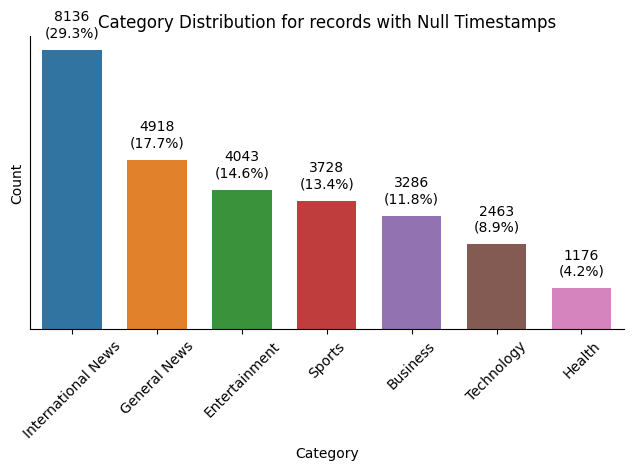

In [13]:

dev_df_null_timestamp = dev_df[dev_df['timestamp_new'].isna()]

category_counts = dev_df_null_timestamp['category'].value_counts()
percentages = (category_counts / category_counts.sum()) * 100
categories = category_counts.index




ax = sns.barplot(x=categories, y=category_counts.values,  hue = categories, width=0.7)
plt.xticks(rotation=45)

for p, count, perc in zip(ax.patches, category_counts, percentages):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 300,
            f'{count}\n({perc:.1f}%)',
            ha="center", va="bottom")
    
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_ticks([])

plt.tight_layout()
plt.title('Category Distribution for records with Null Timestamps')
plt.xlabel('Category')
plt.ylabel('Count')

#### Heatmaps of timestamp (year, month, ...) vs category

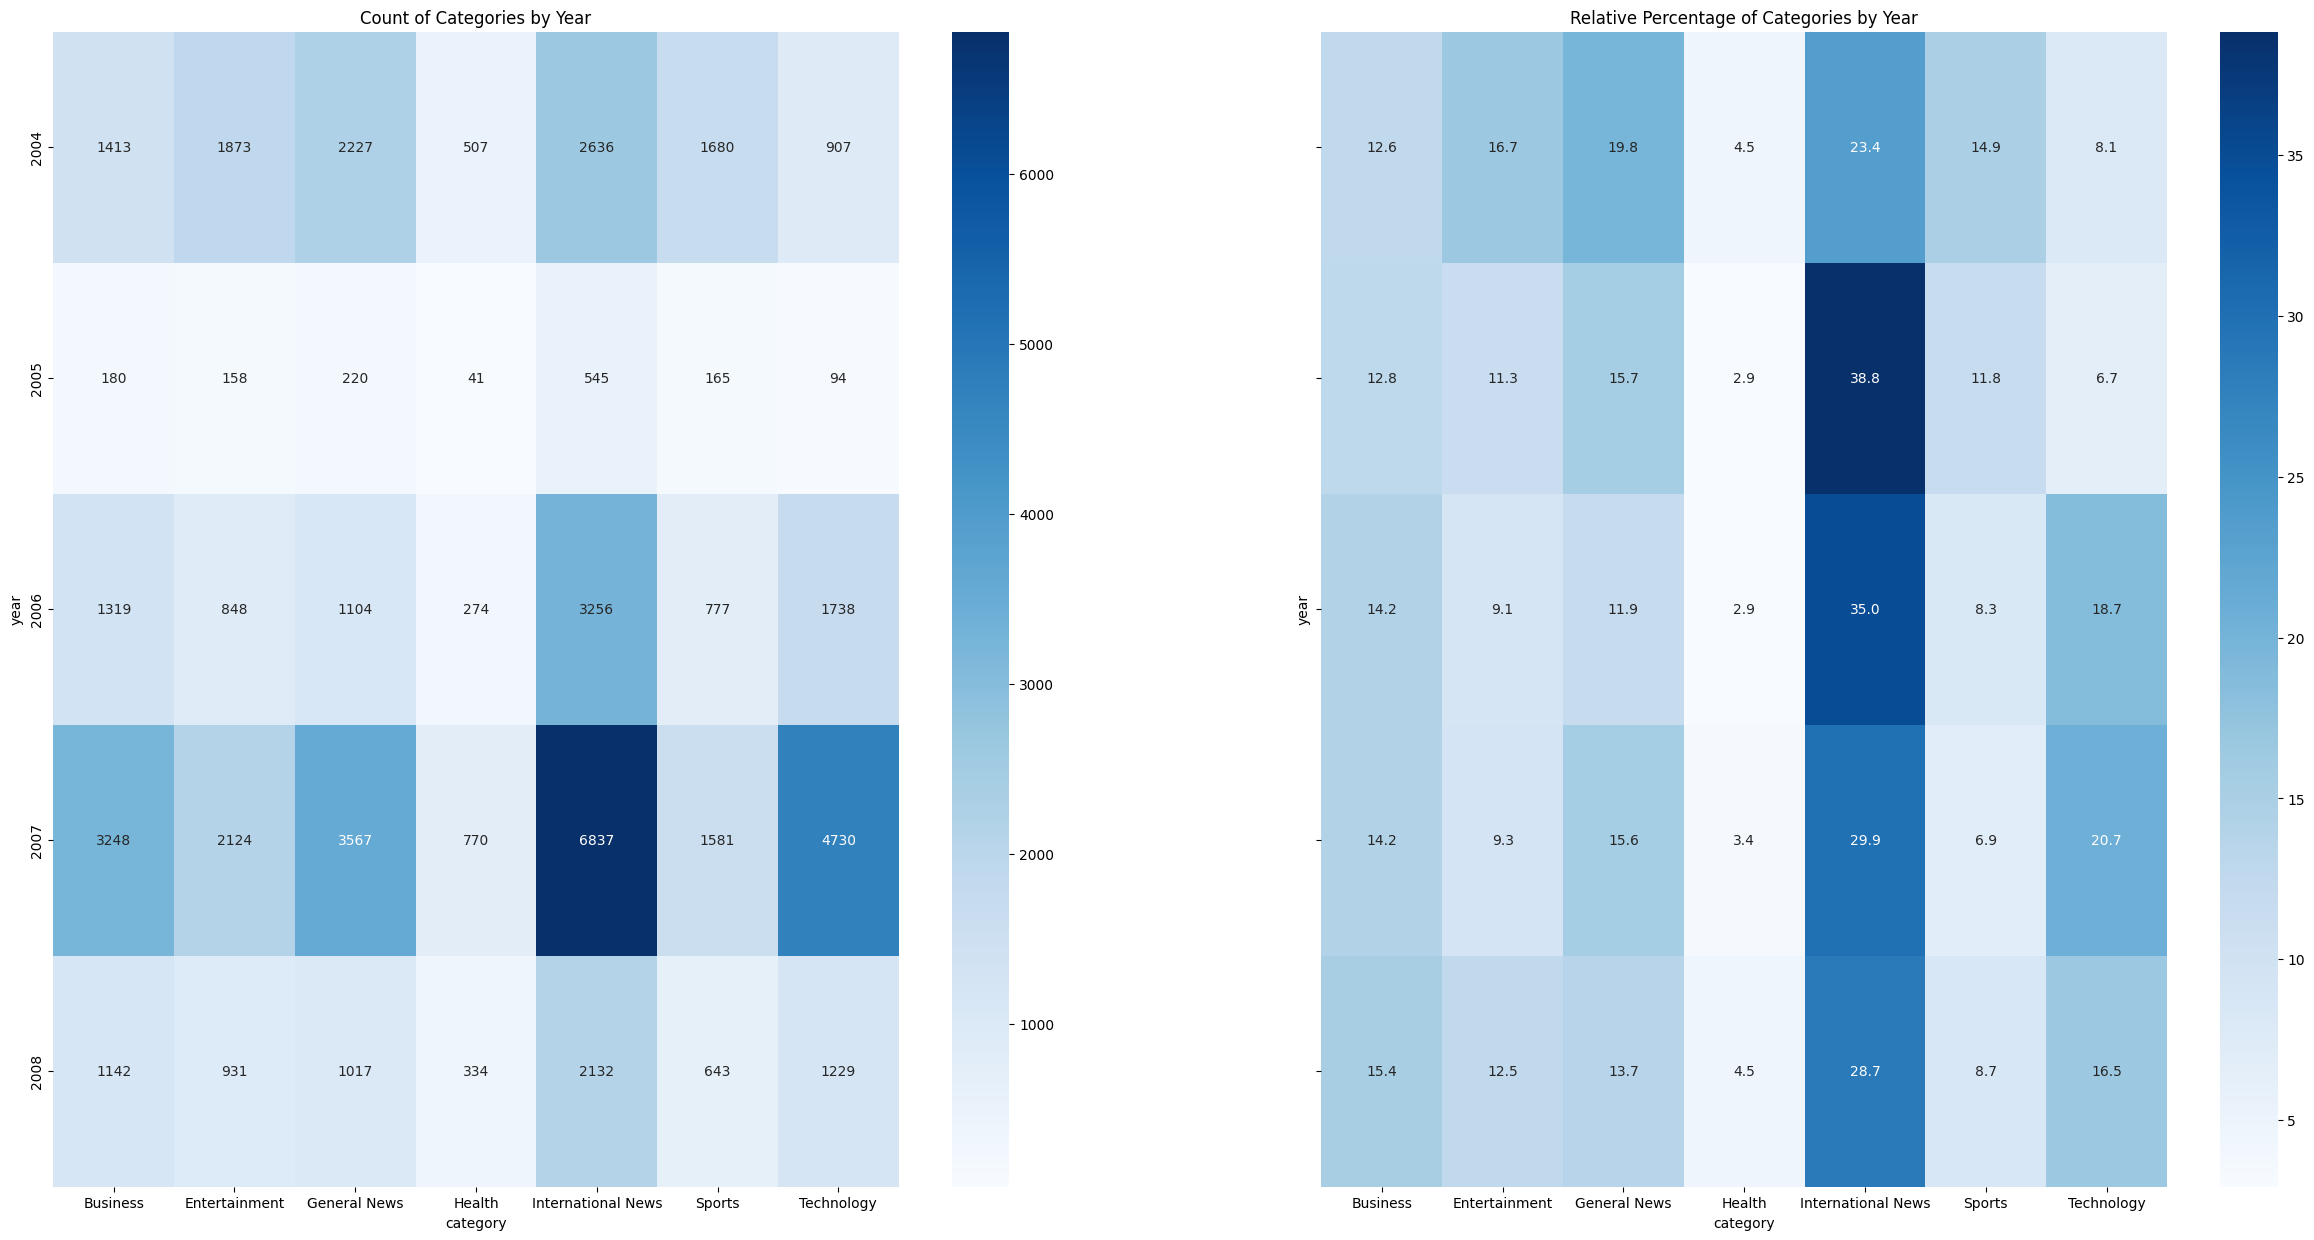

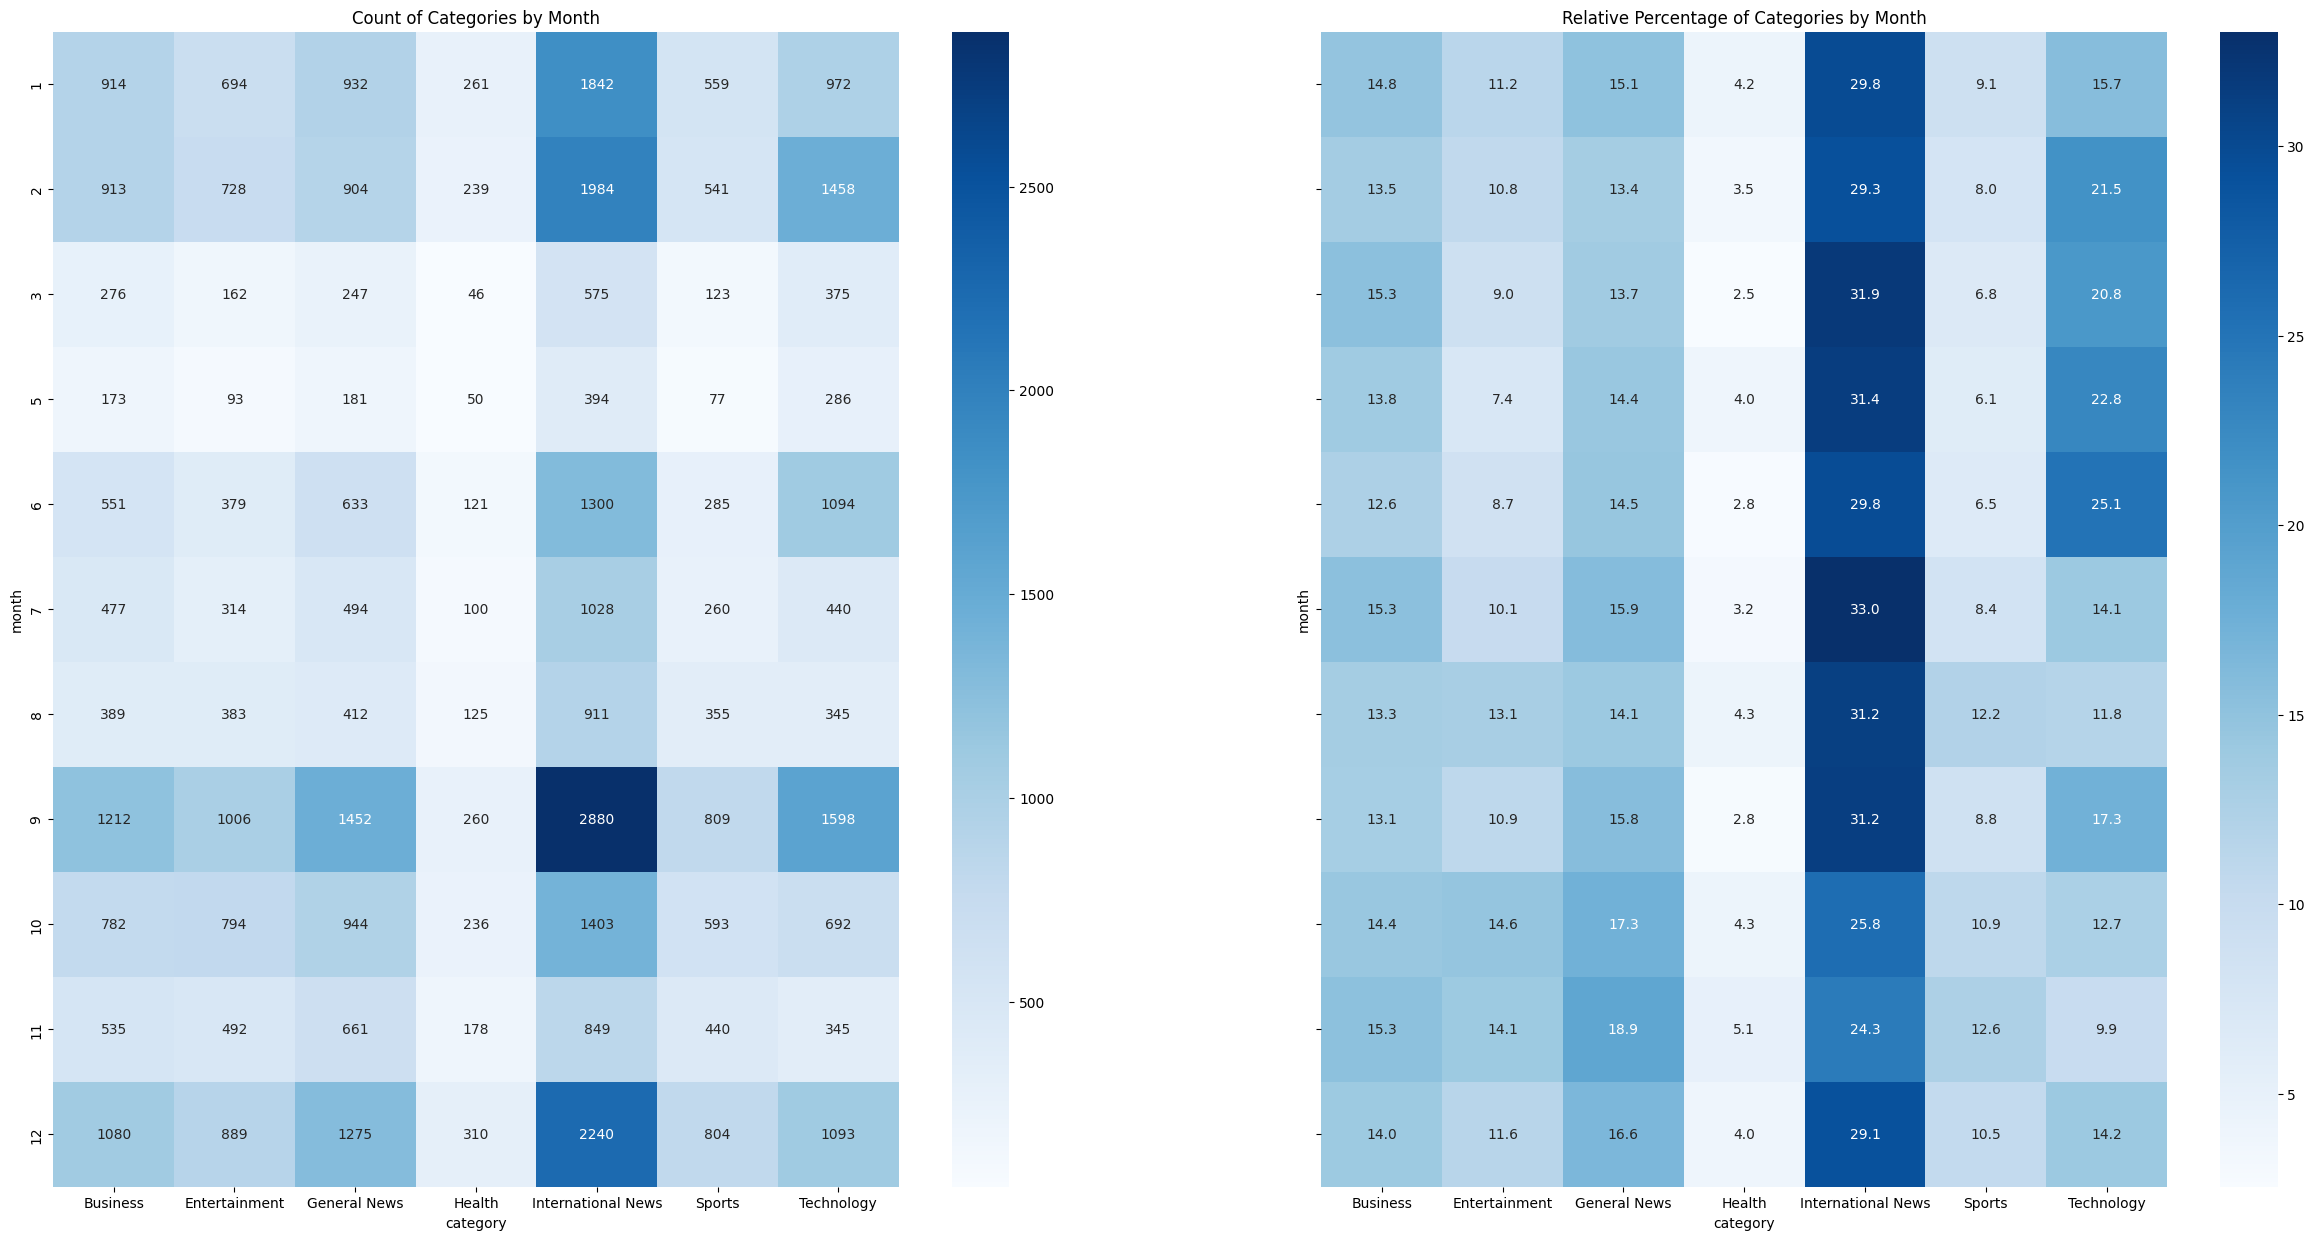

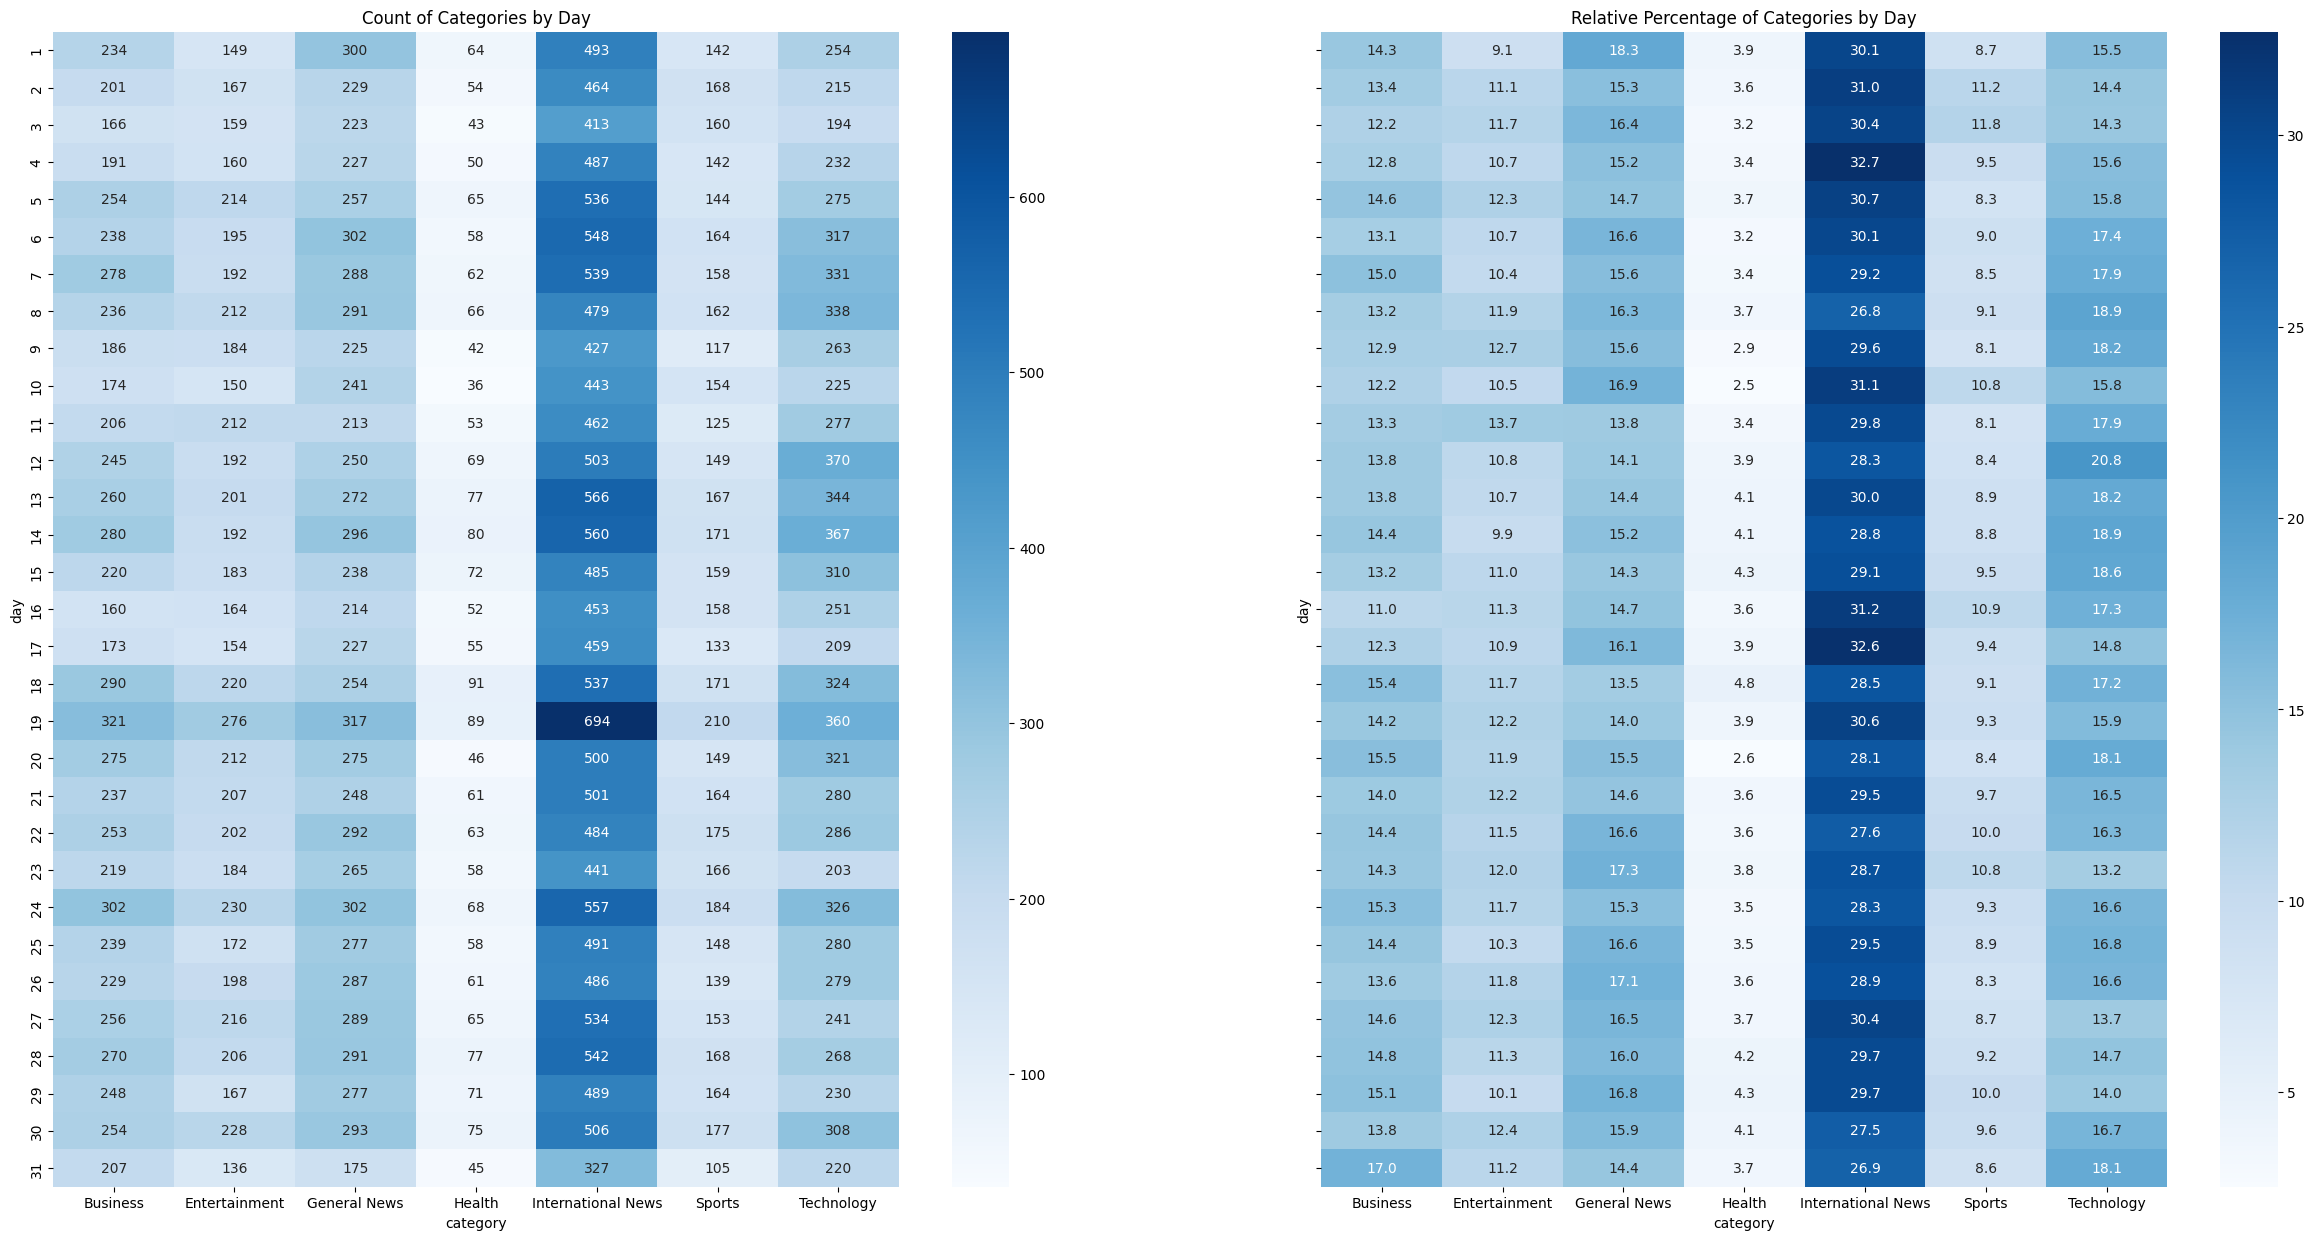

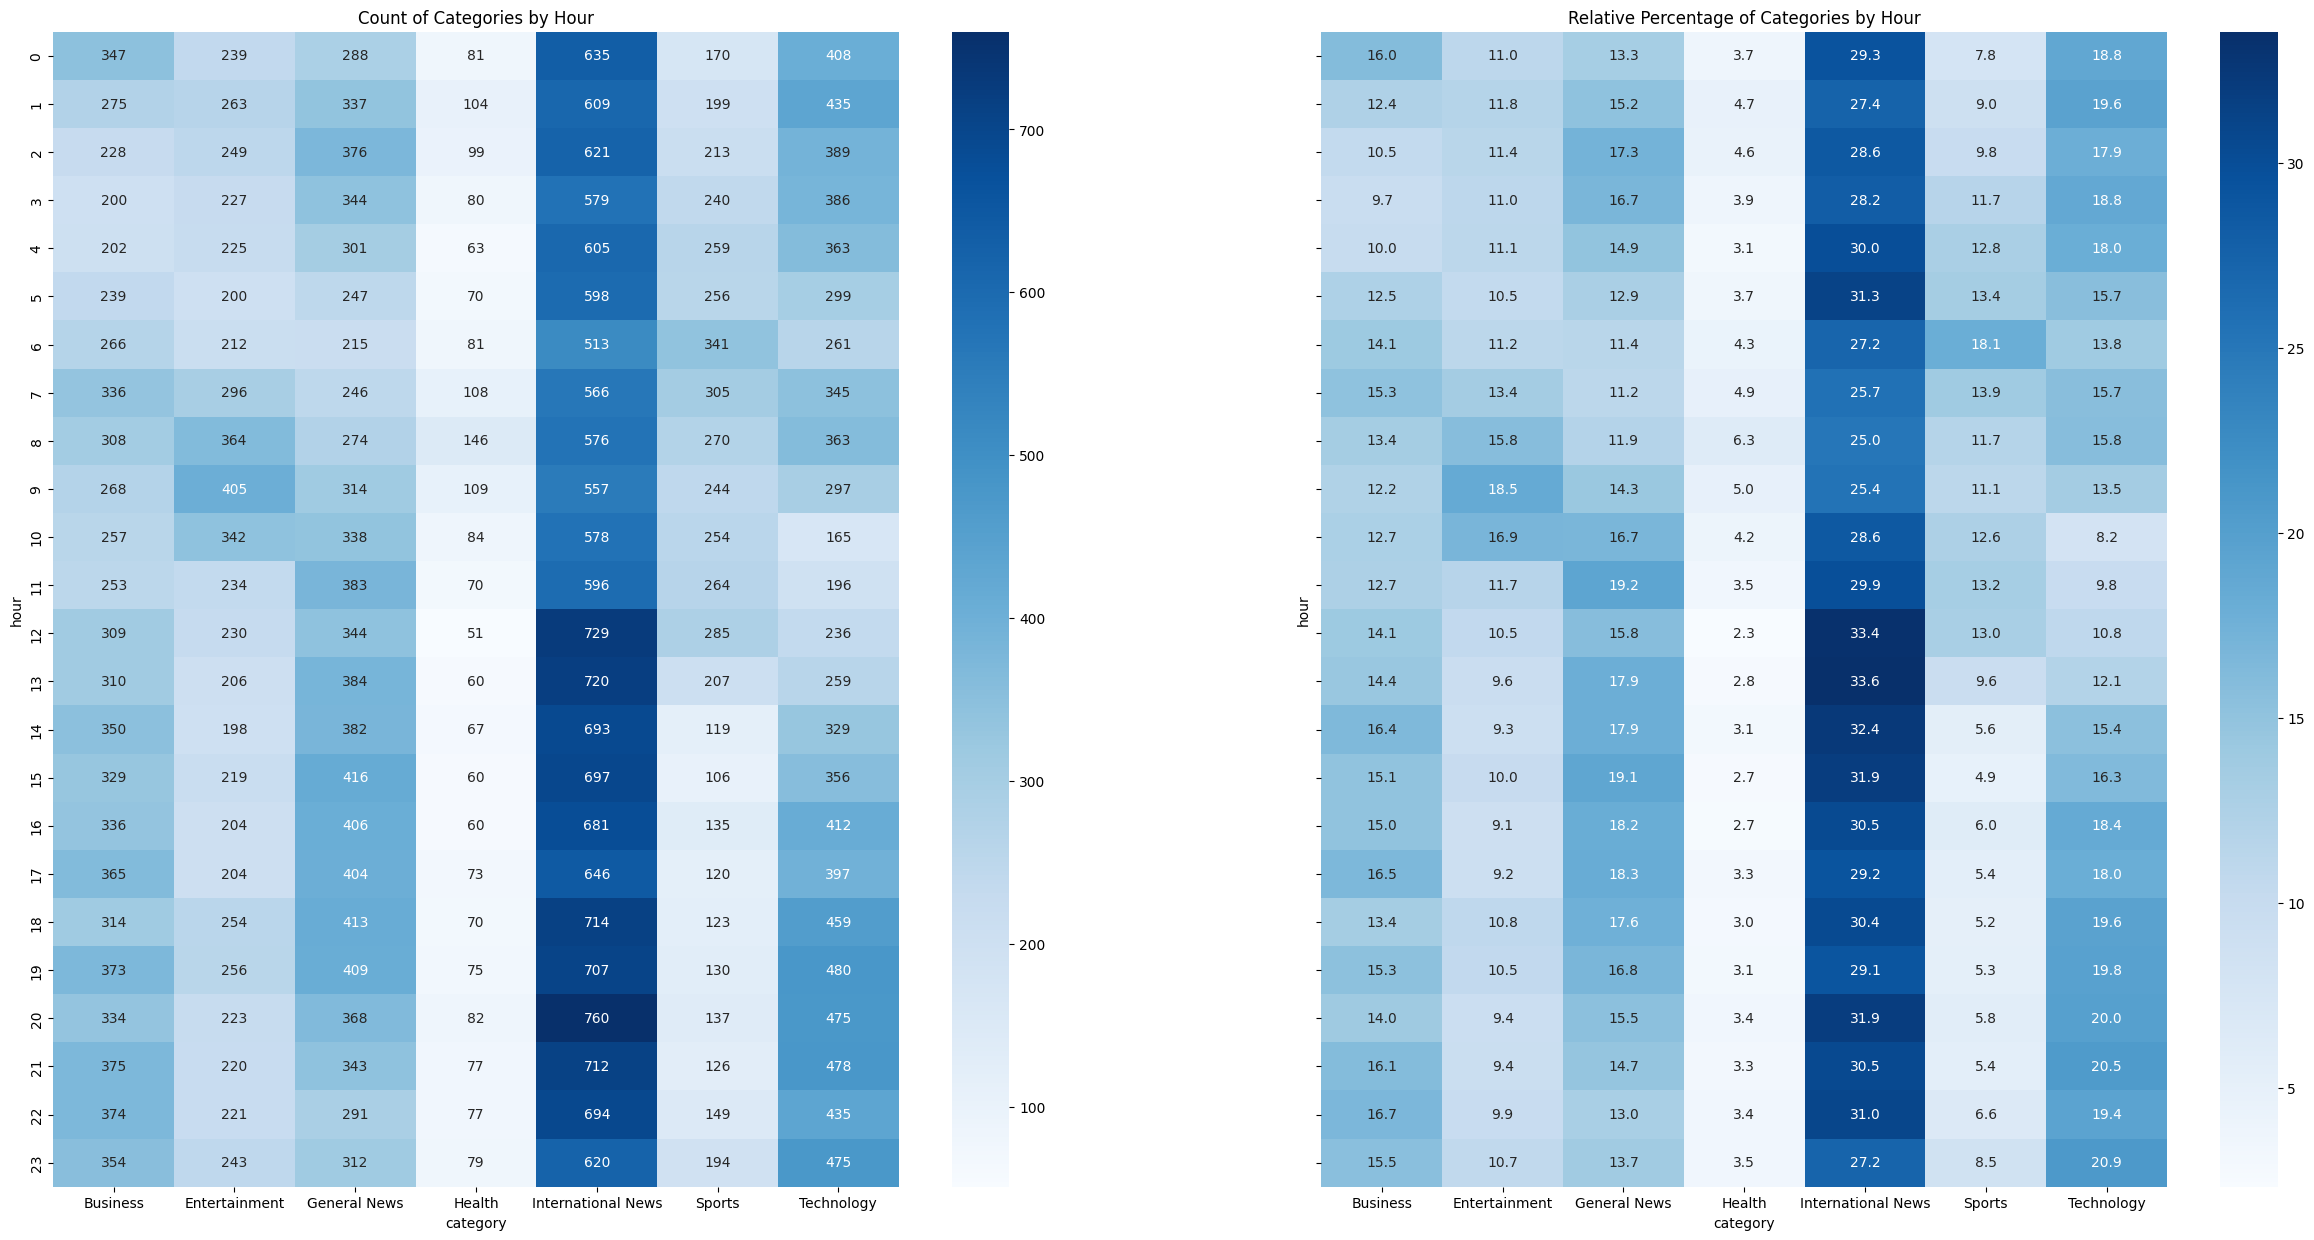

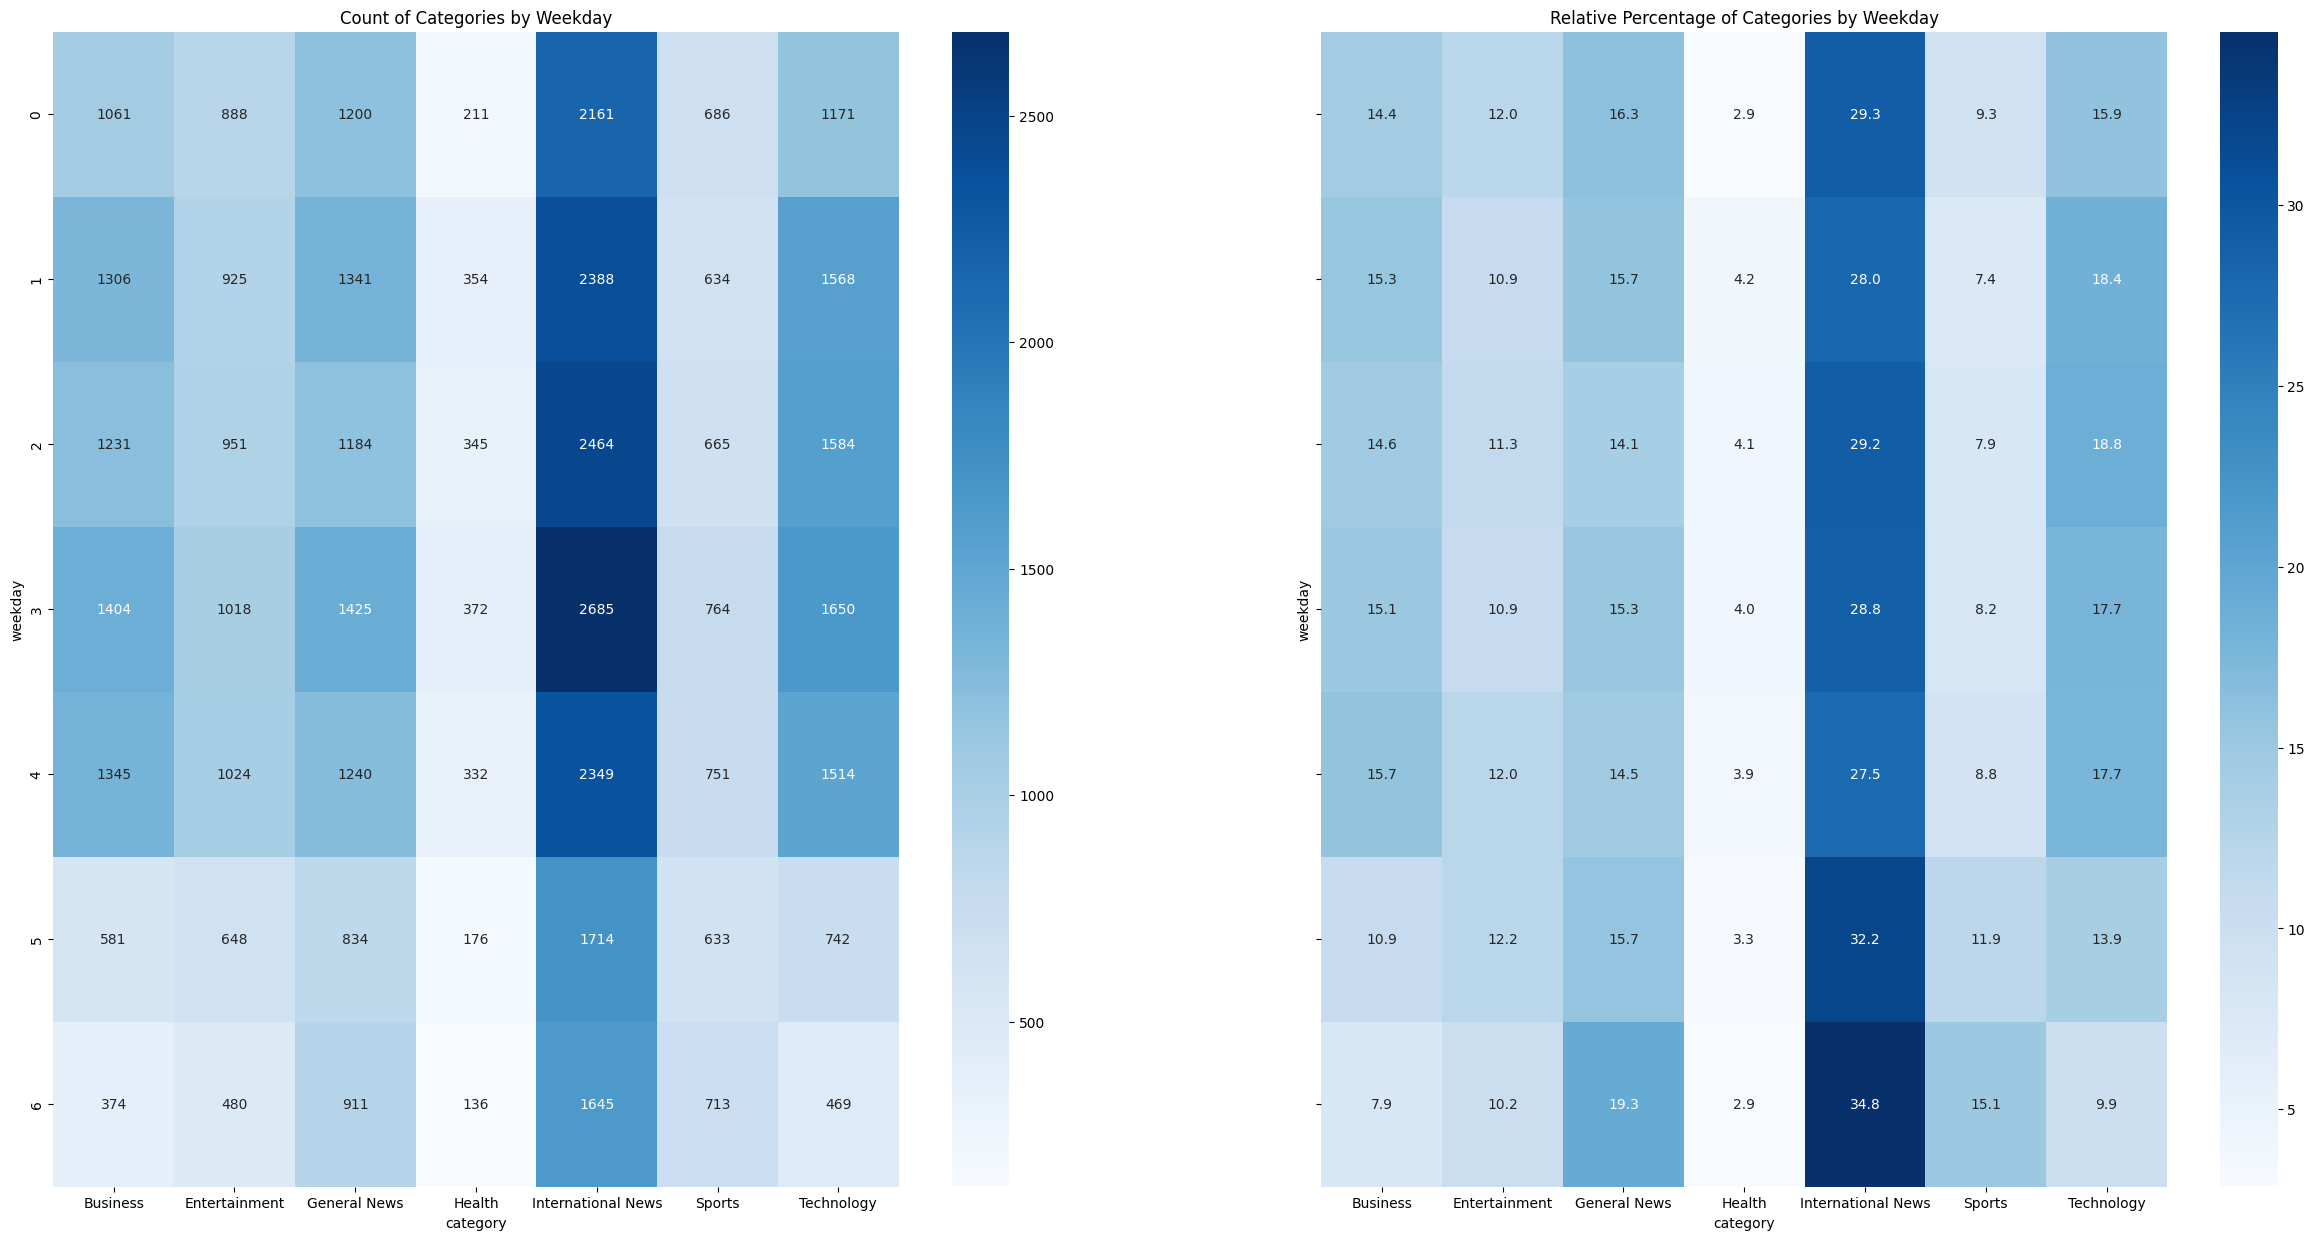

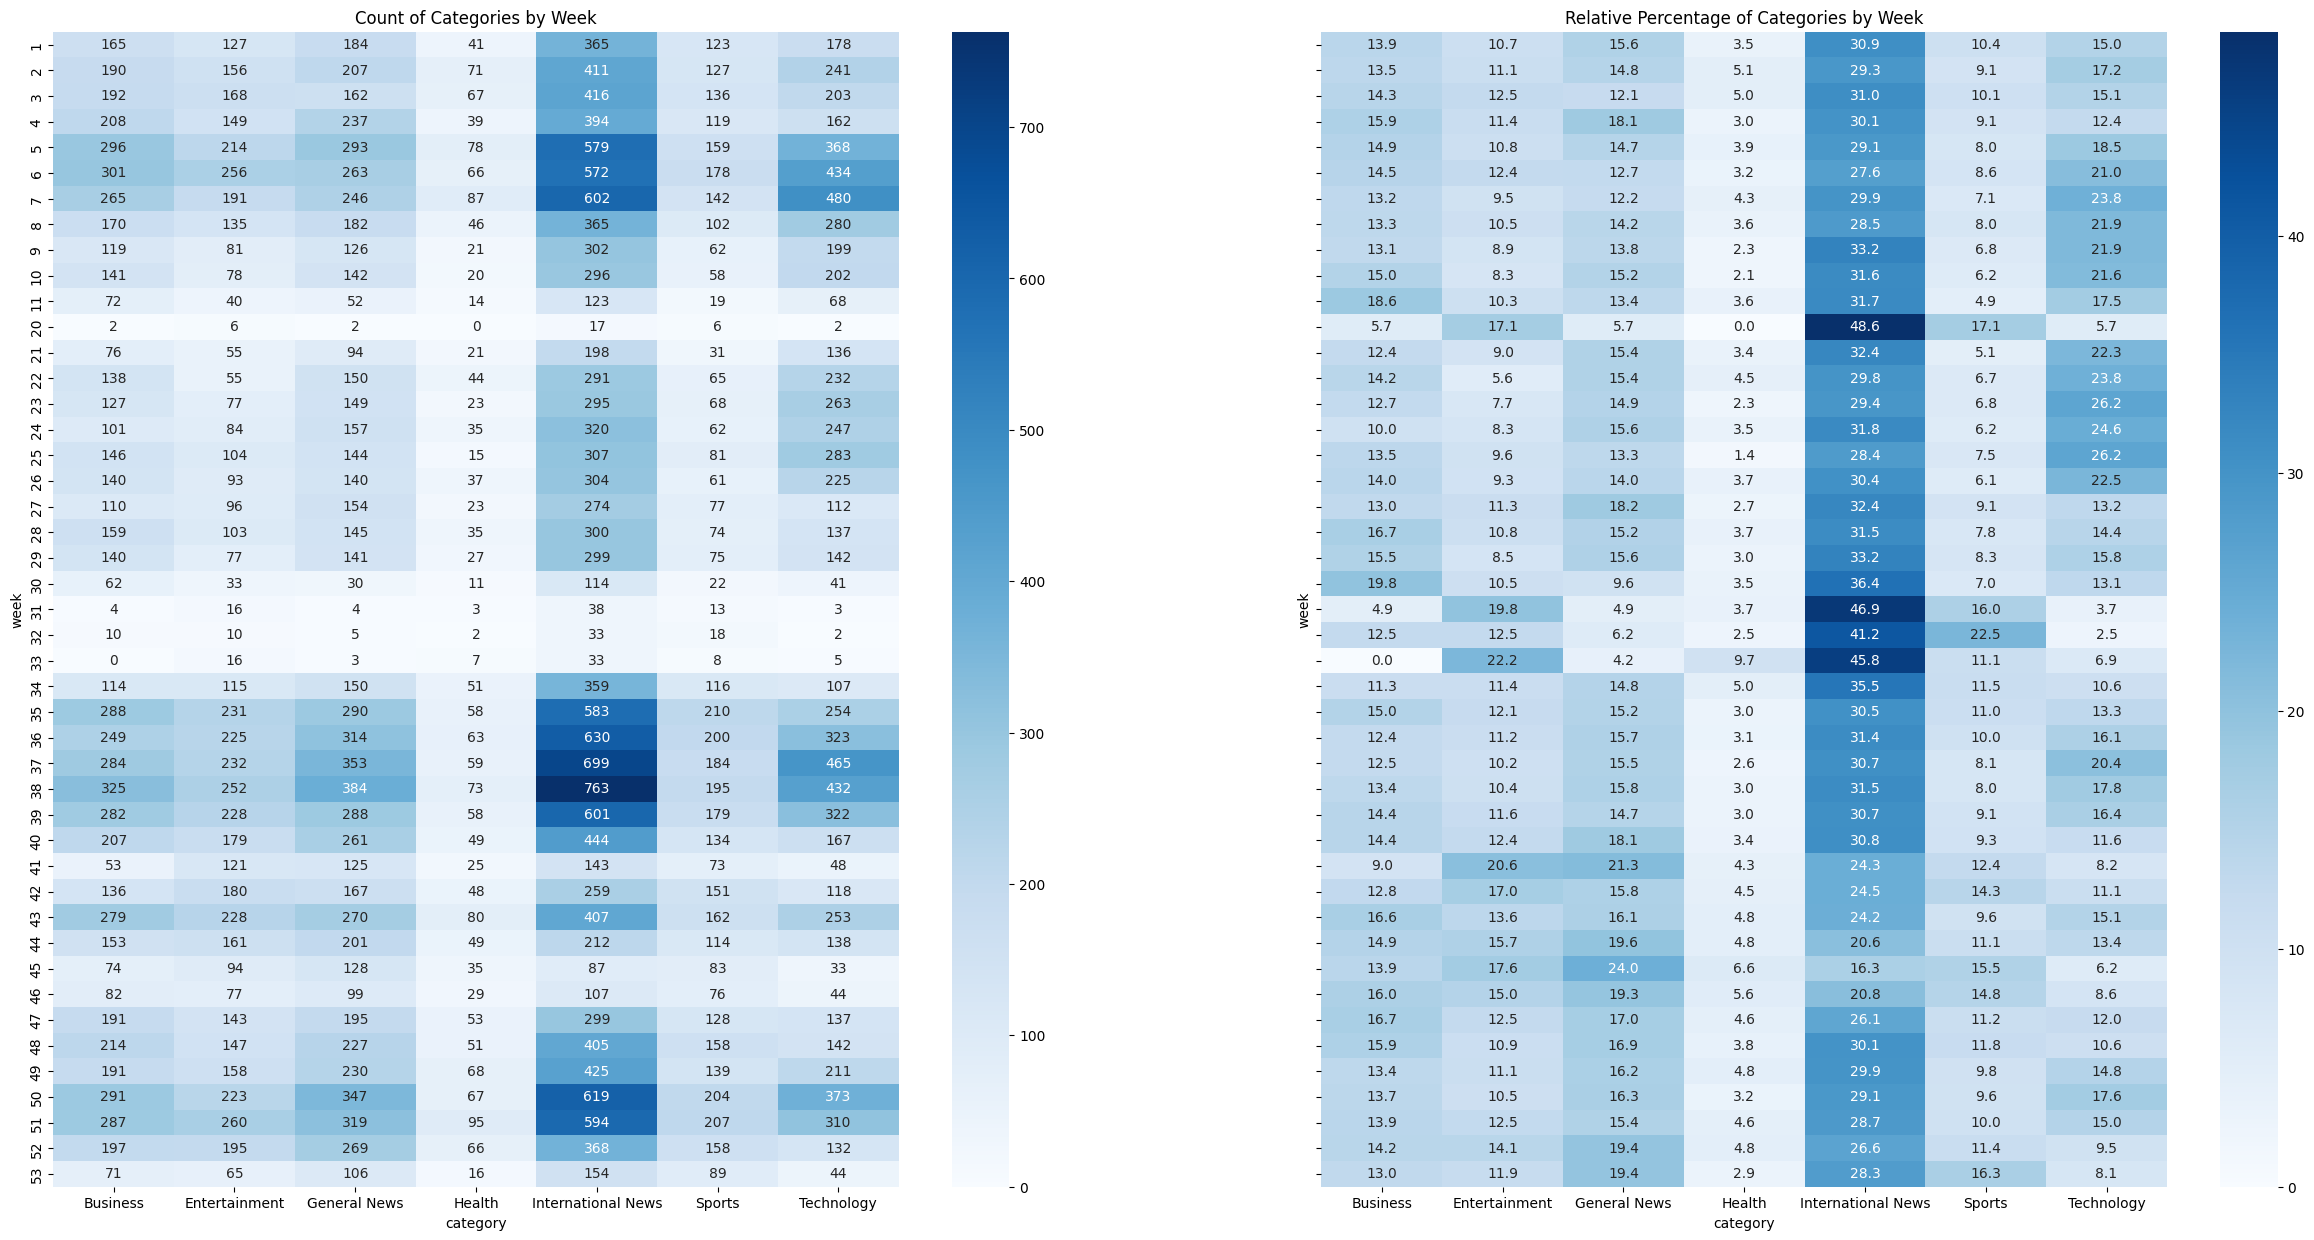

In [14]:
for col in ['year', 'month', 'day', 'hour', 'weekday', 'week']:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 15), sharey=True)
    
    matrix = dev_df.groupby([col, 'category']).size().unstack(fill_value=0)
    relative_matrix = (matrix.T / matrix.sum(axis=1)).T * 100
    
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', ax=ax1)
    sns.heatmap(relative_matrix, annot=True, fmt='.1f', cmap='Blues', ax=ax2)
    
    ax1.set_title(f'Count of Categories by {col.capitalize()}')
    ax2.set_title(f'Relative Percentage of Categories by {col.capitalize()}')
   


#### Hetmaps of the top 5 sources per category vs timestamp (year, month, ...)

Text(0.5, 1.0, 'Relative Percentage of Categories by Week for Top 5 Sources per category')

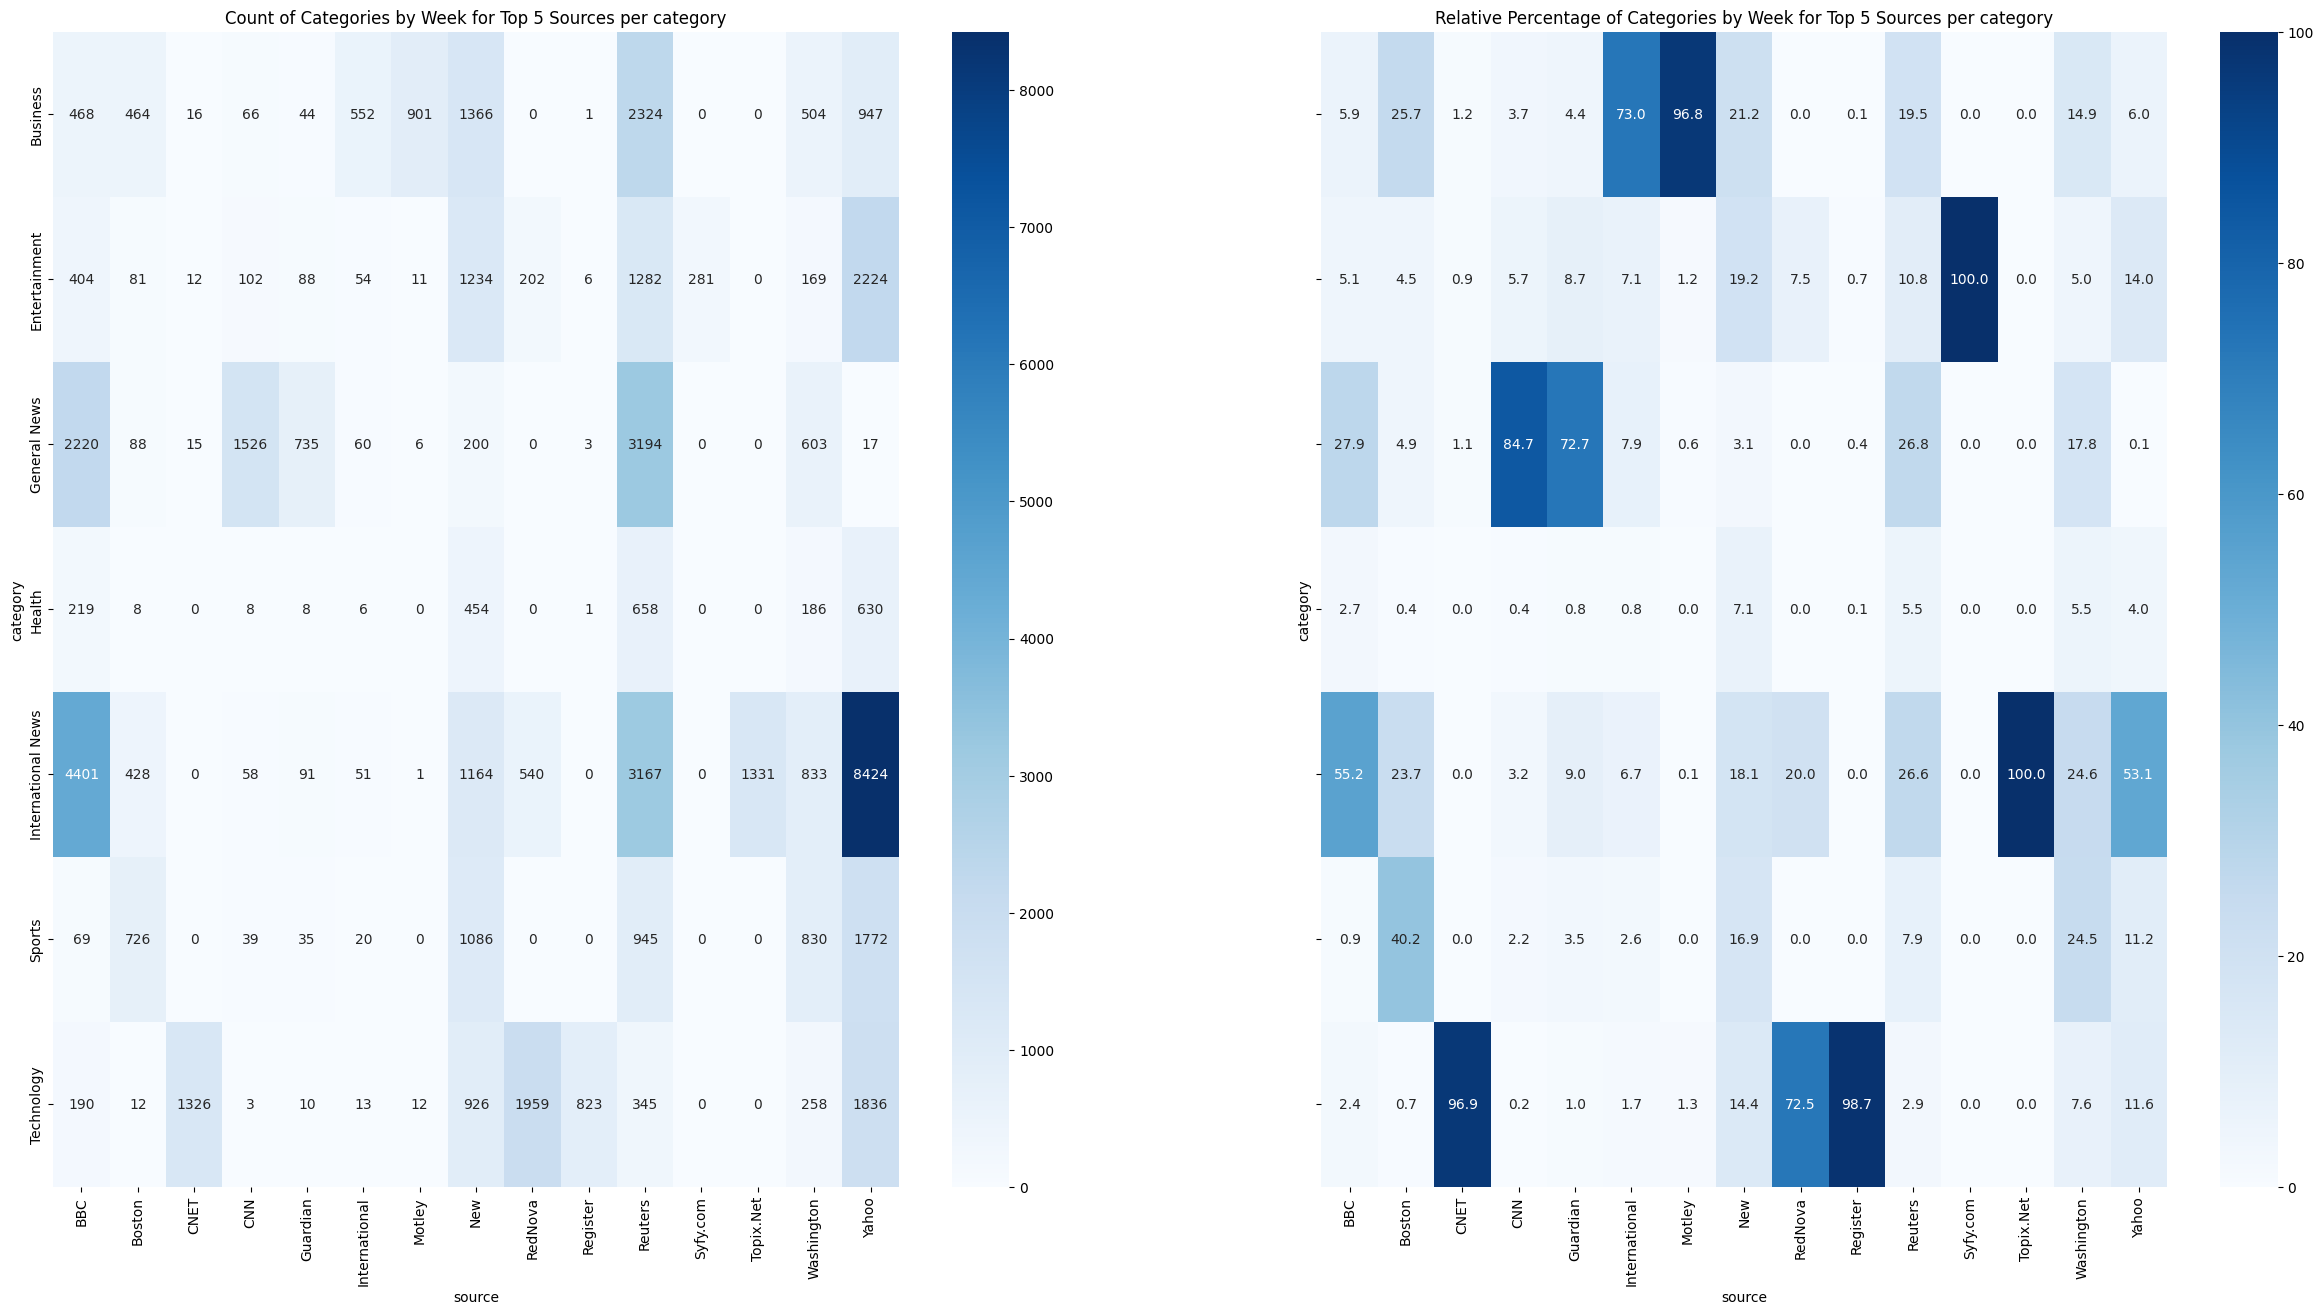

In [15]:
grouped = dev_df.groupby(by = ['category', 'source']).size()
top_5_sources = grouped.groupby(level=0, group_keys=False).nlargest(5)


top_5_sources = top_5_sources.reset_index(name='count')['source'].unique()

top_5_sources


dev_df_top_sources = dev_df[dev_df['source'].isin(top_5_sources)]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 15), sharey=True)
matrix = dev_df_top_sources.groupby(['category', 'source']).size().unstack(fill_value=0)
relative_matrix = (matrix / matrix.sum(axis=0)) * 100
    
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', ax=ax1)
sns.heatmap(relative_matrix, annot=True, fmt='.1f', cmap='Blues', ax=ax2)
    
ax1.set_title(f'Count of Categories by {col.capitalize()} for Top 5 Sources per category')
ax2.set_title(f'Relative Percentage of Categories by {col.capitalize()} for Top 5 Sources per category')



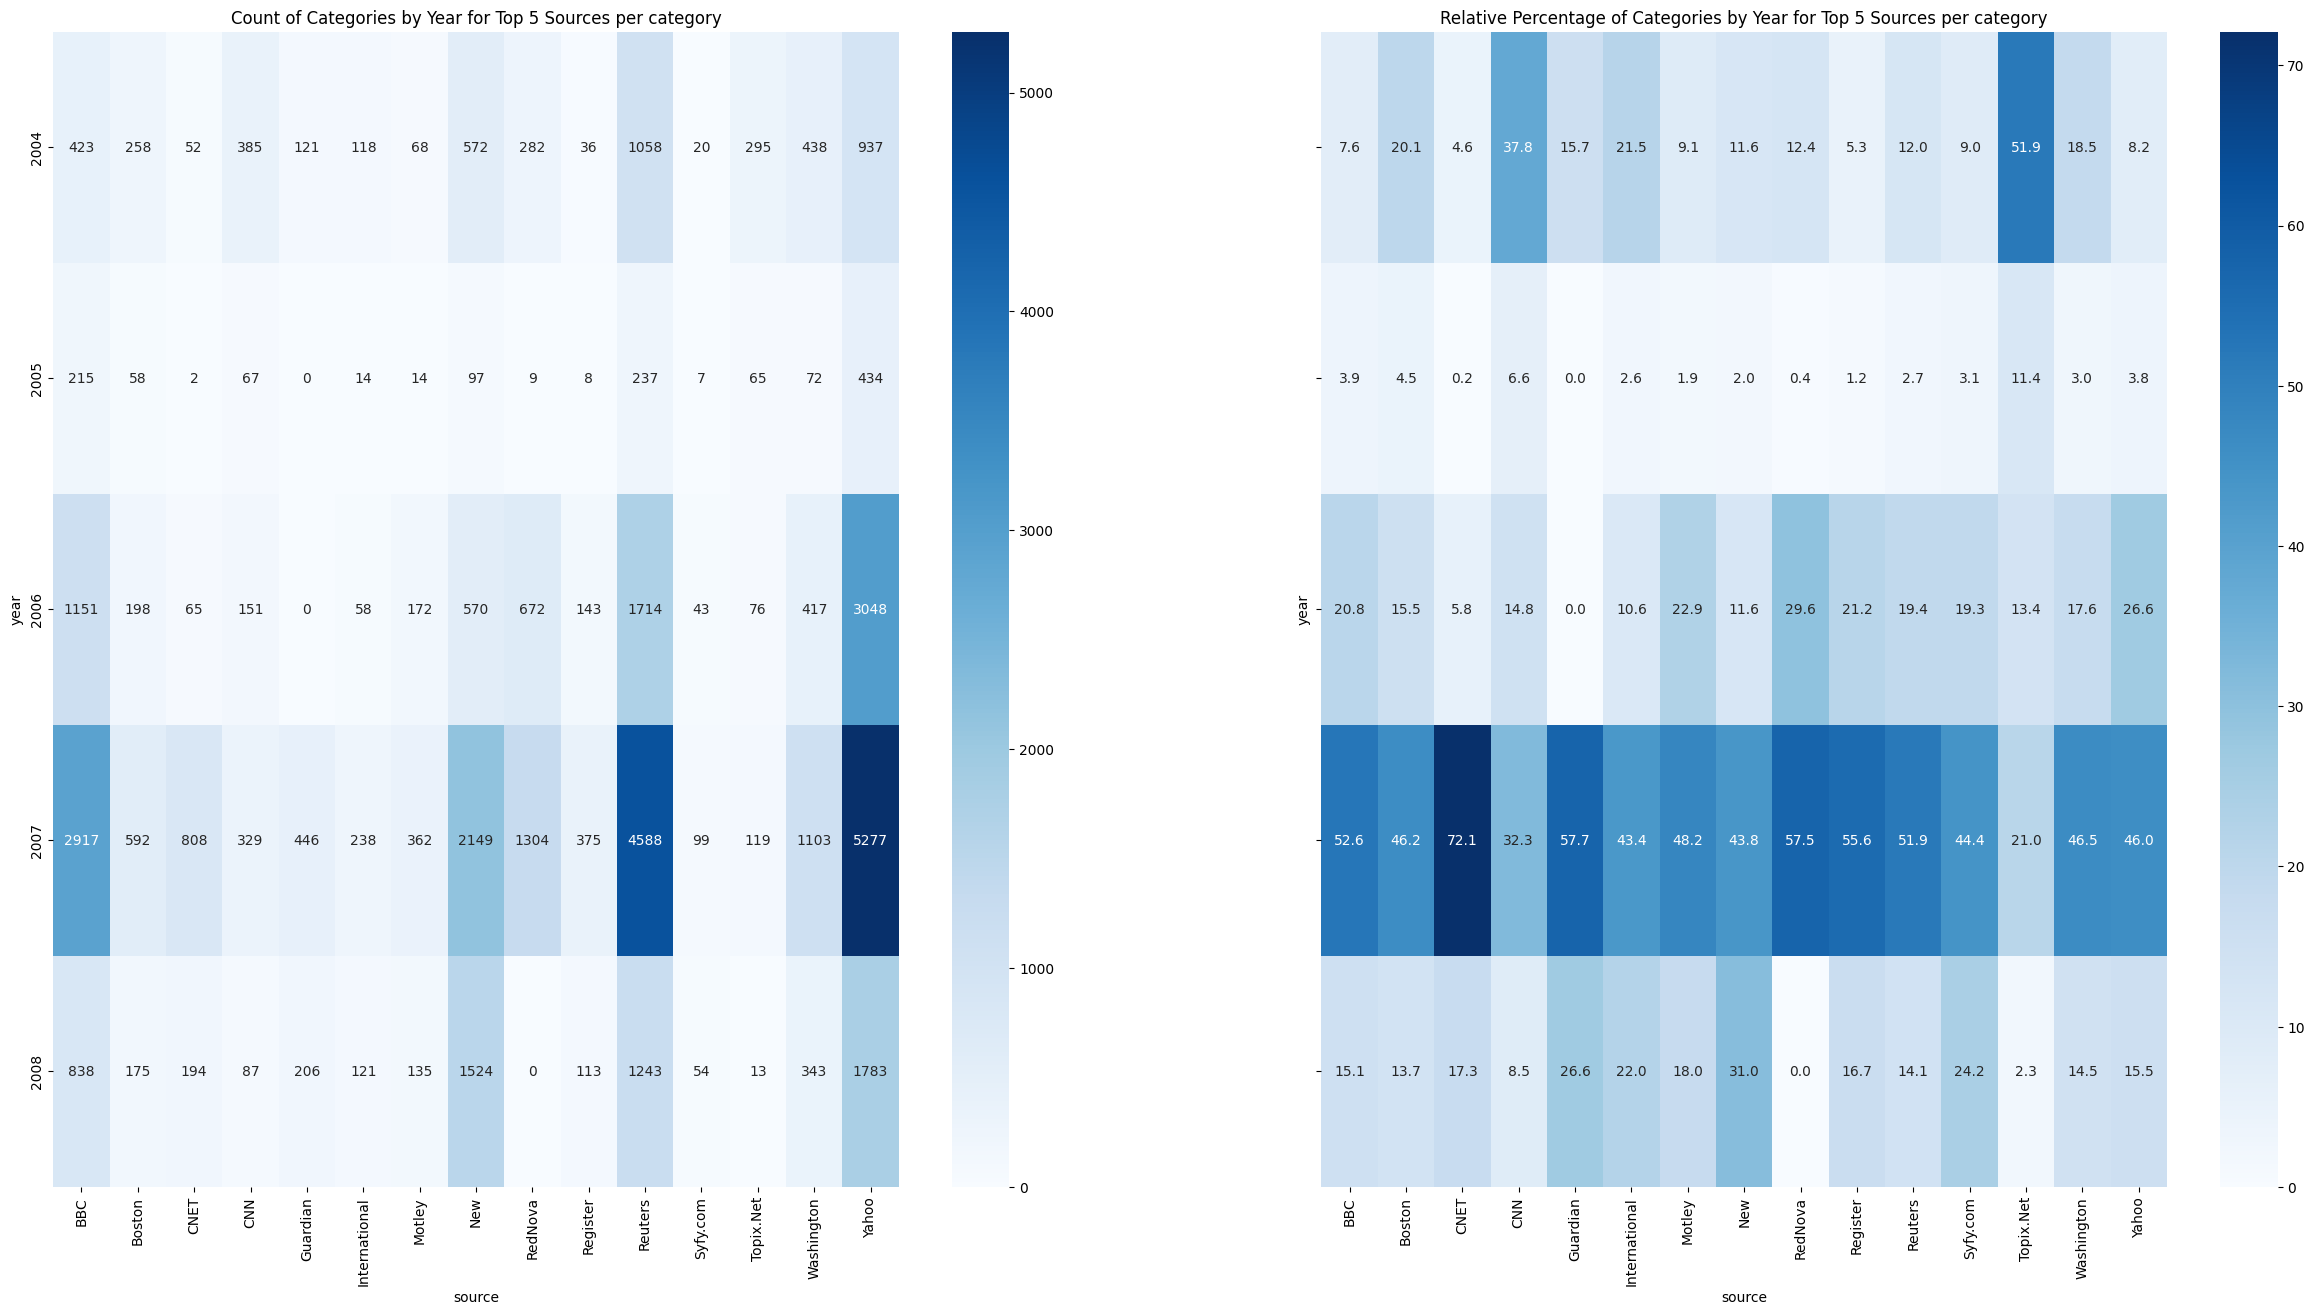

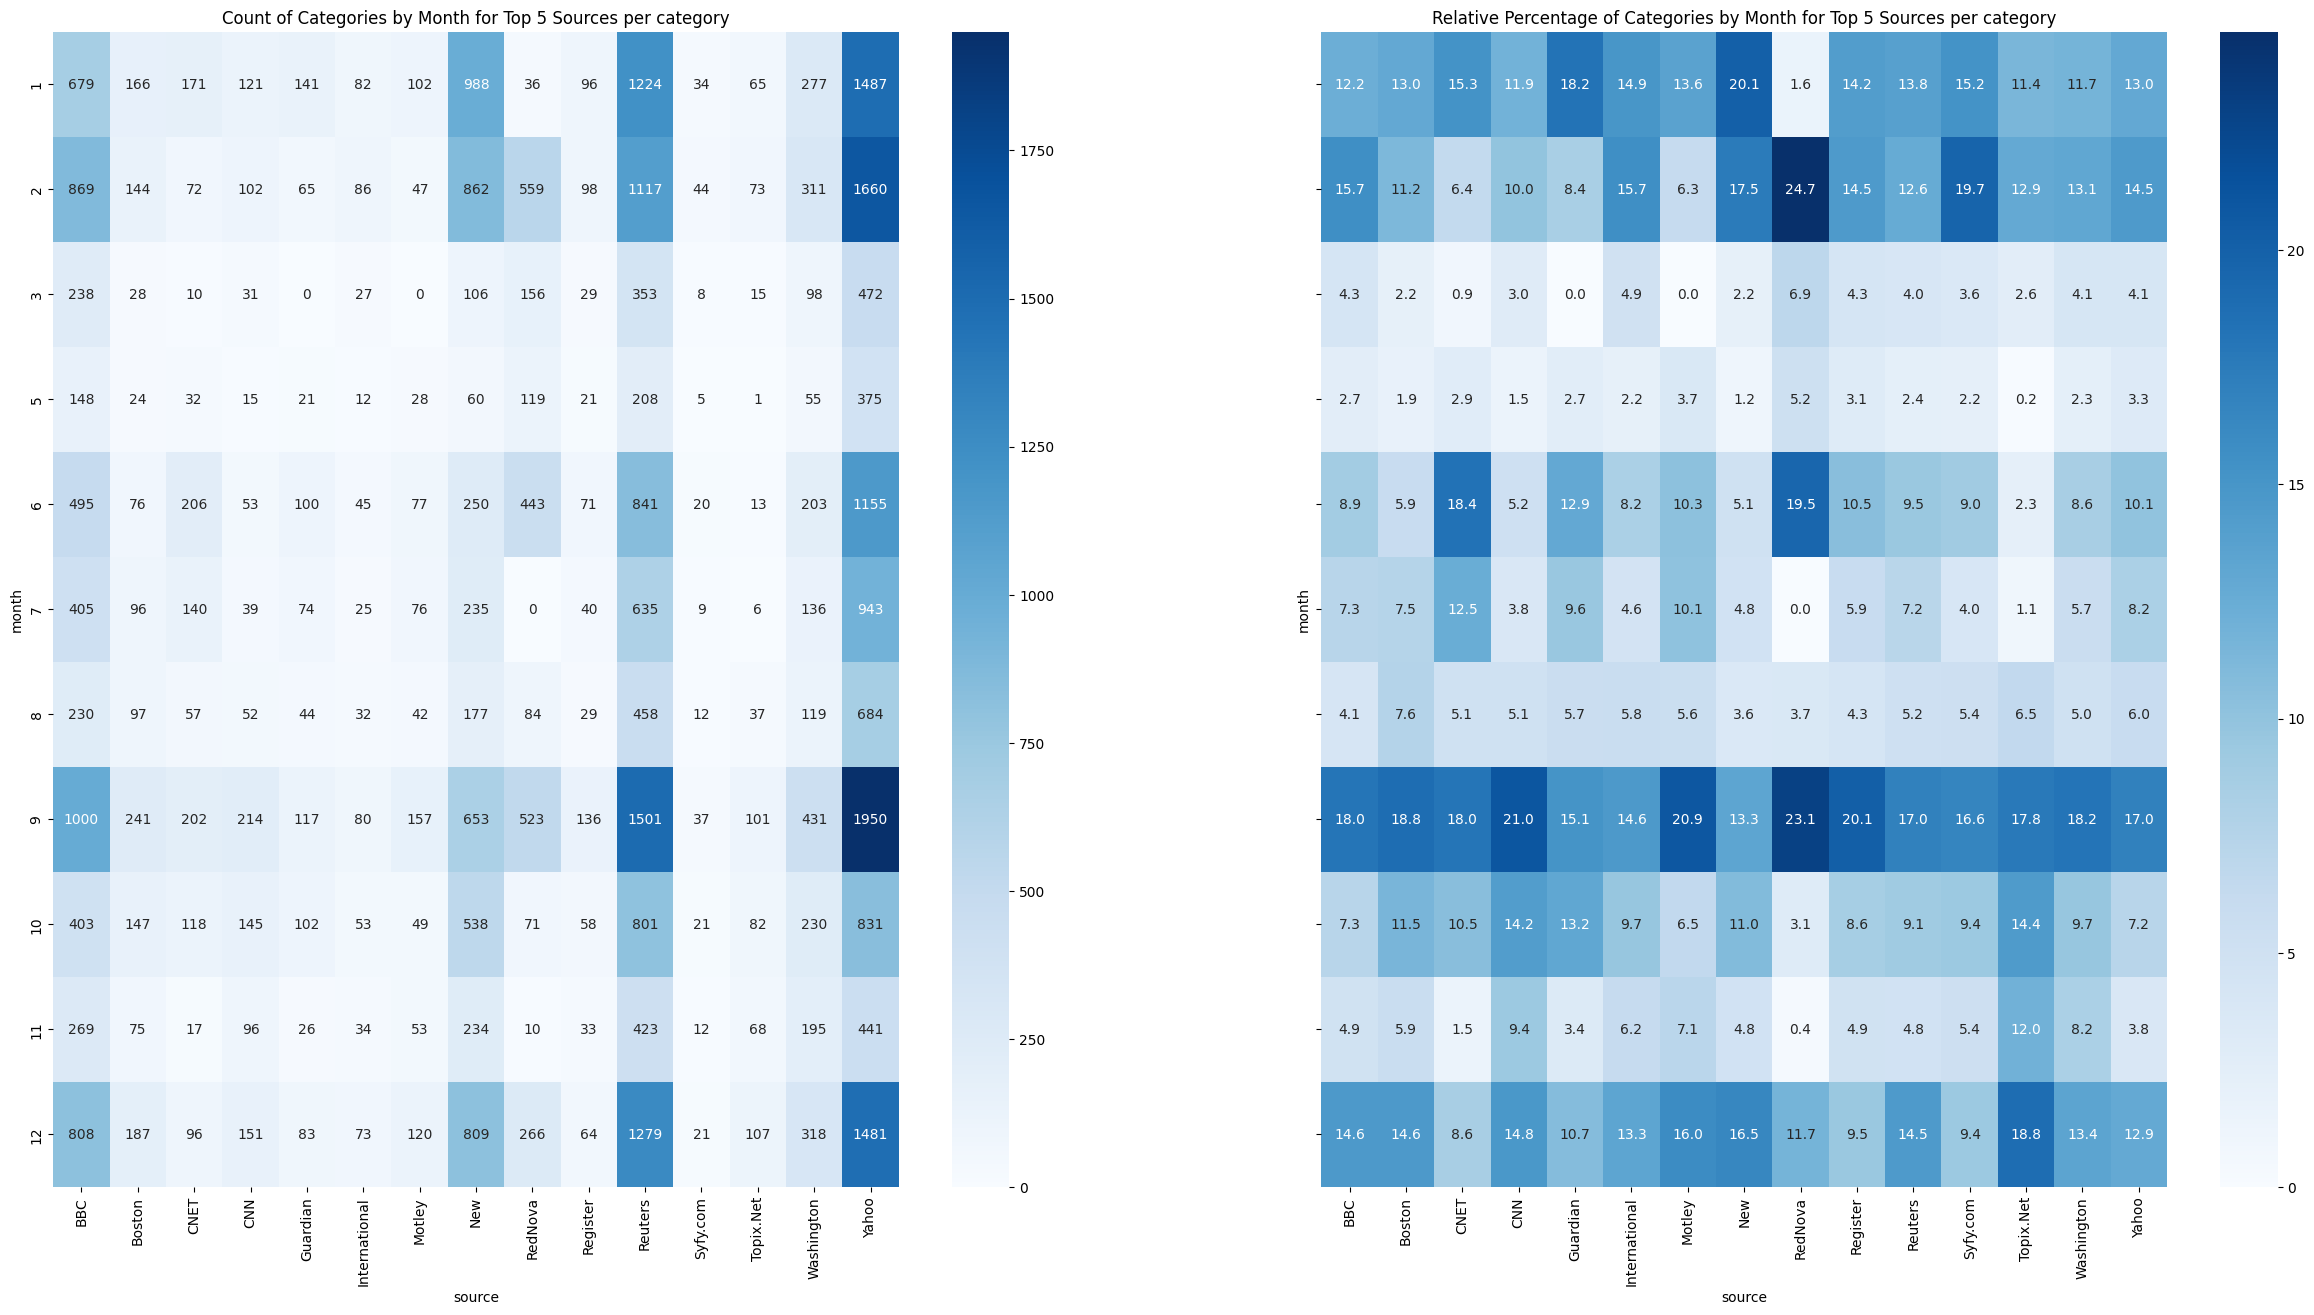

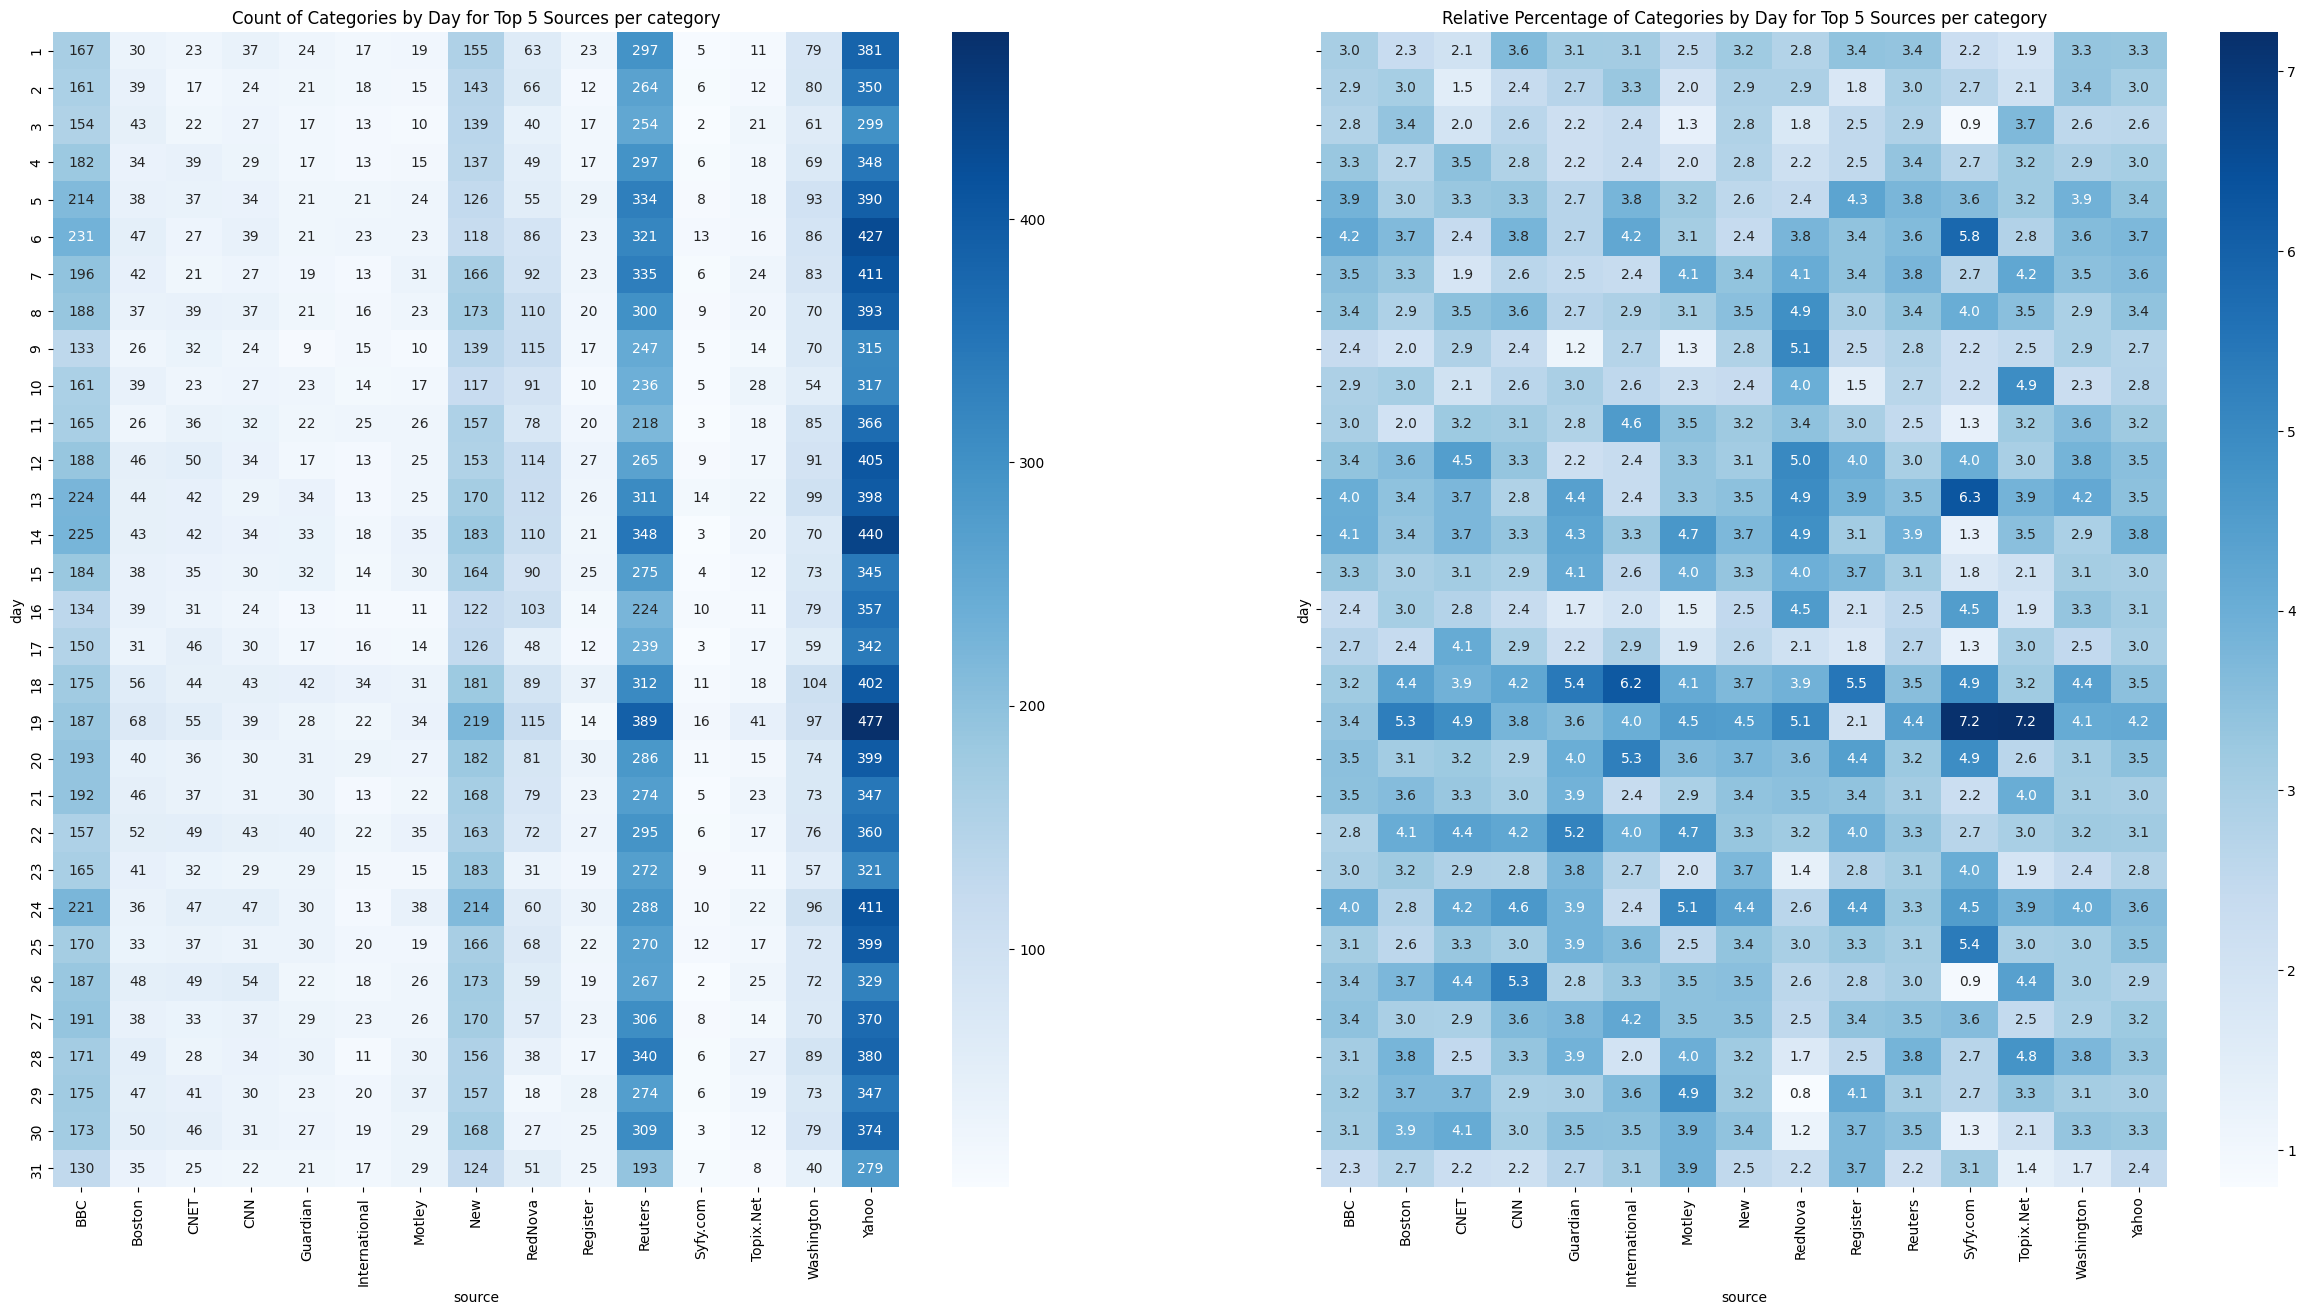

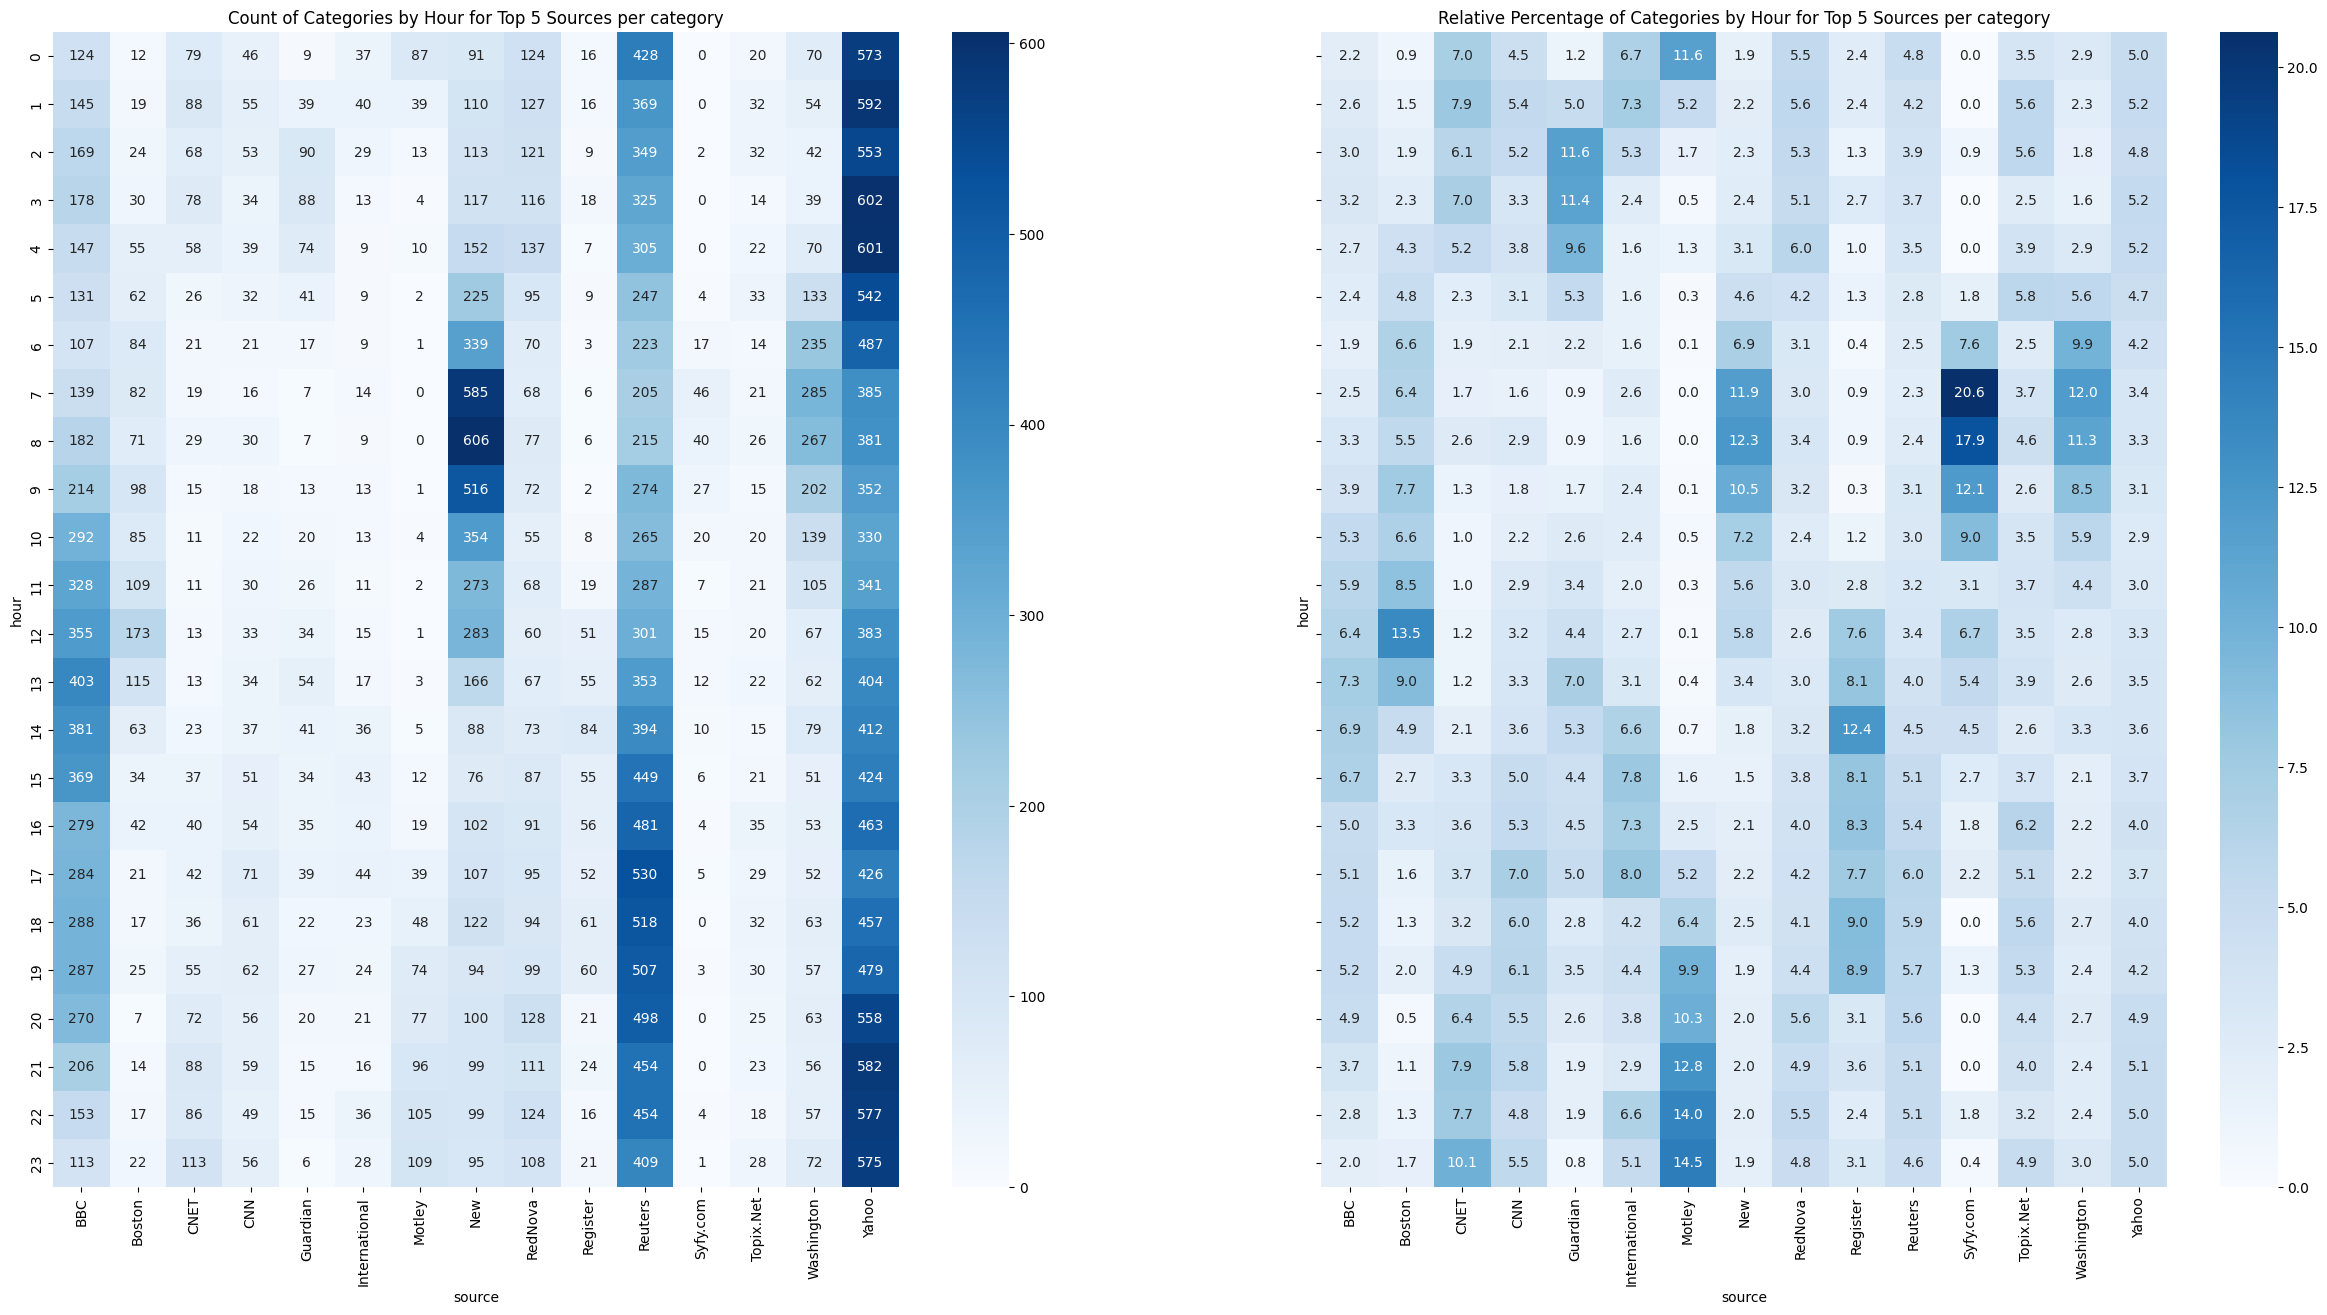

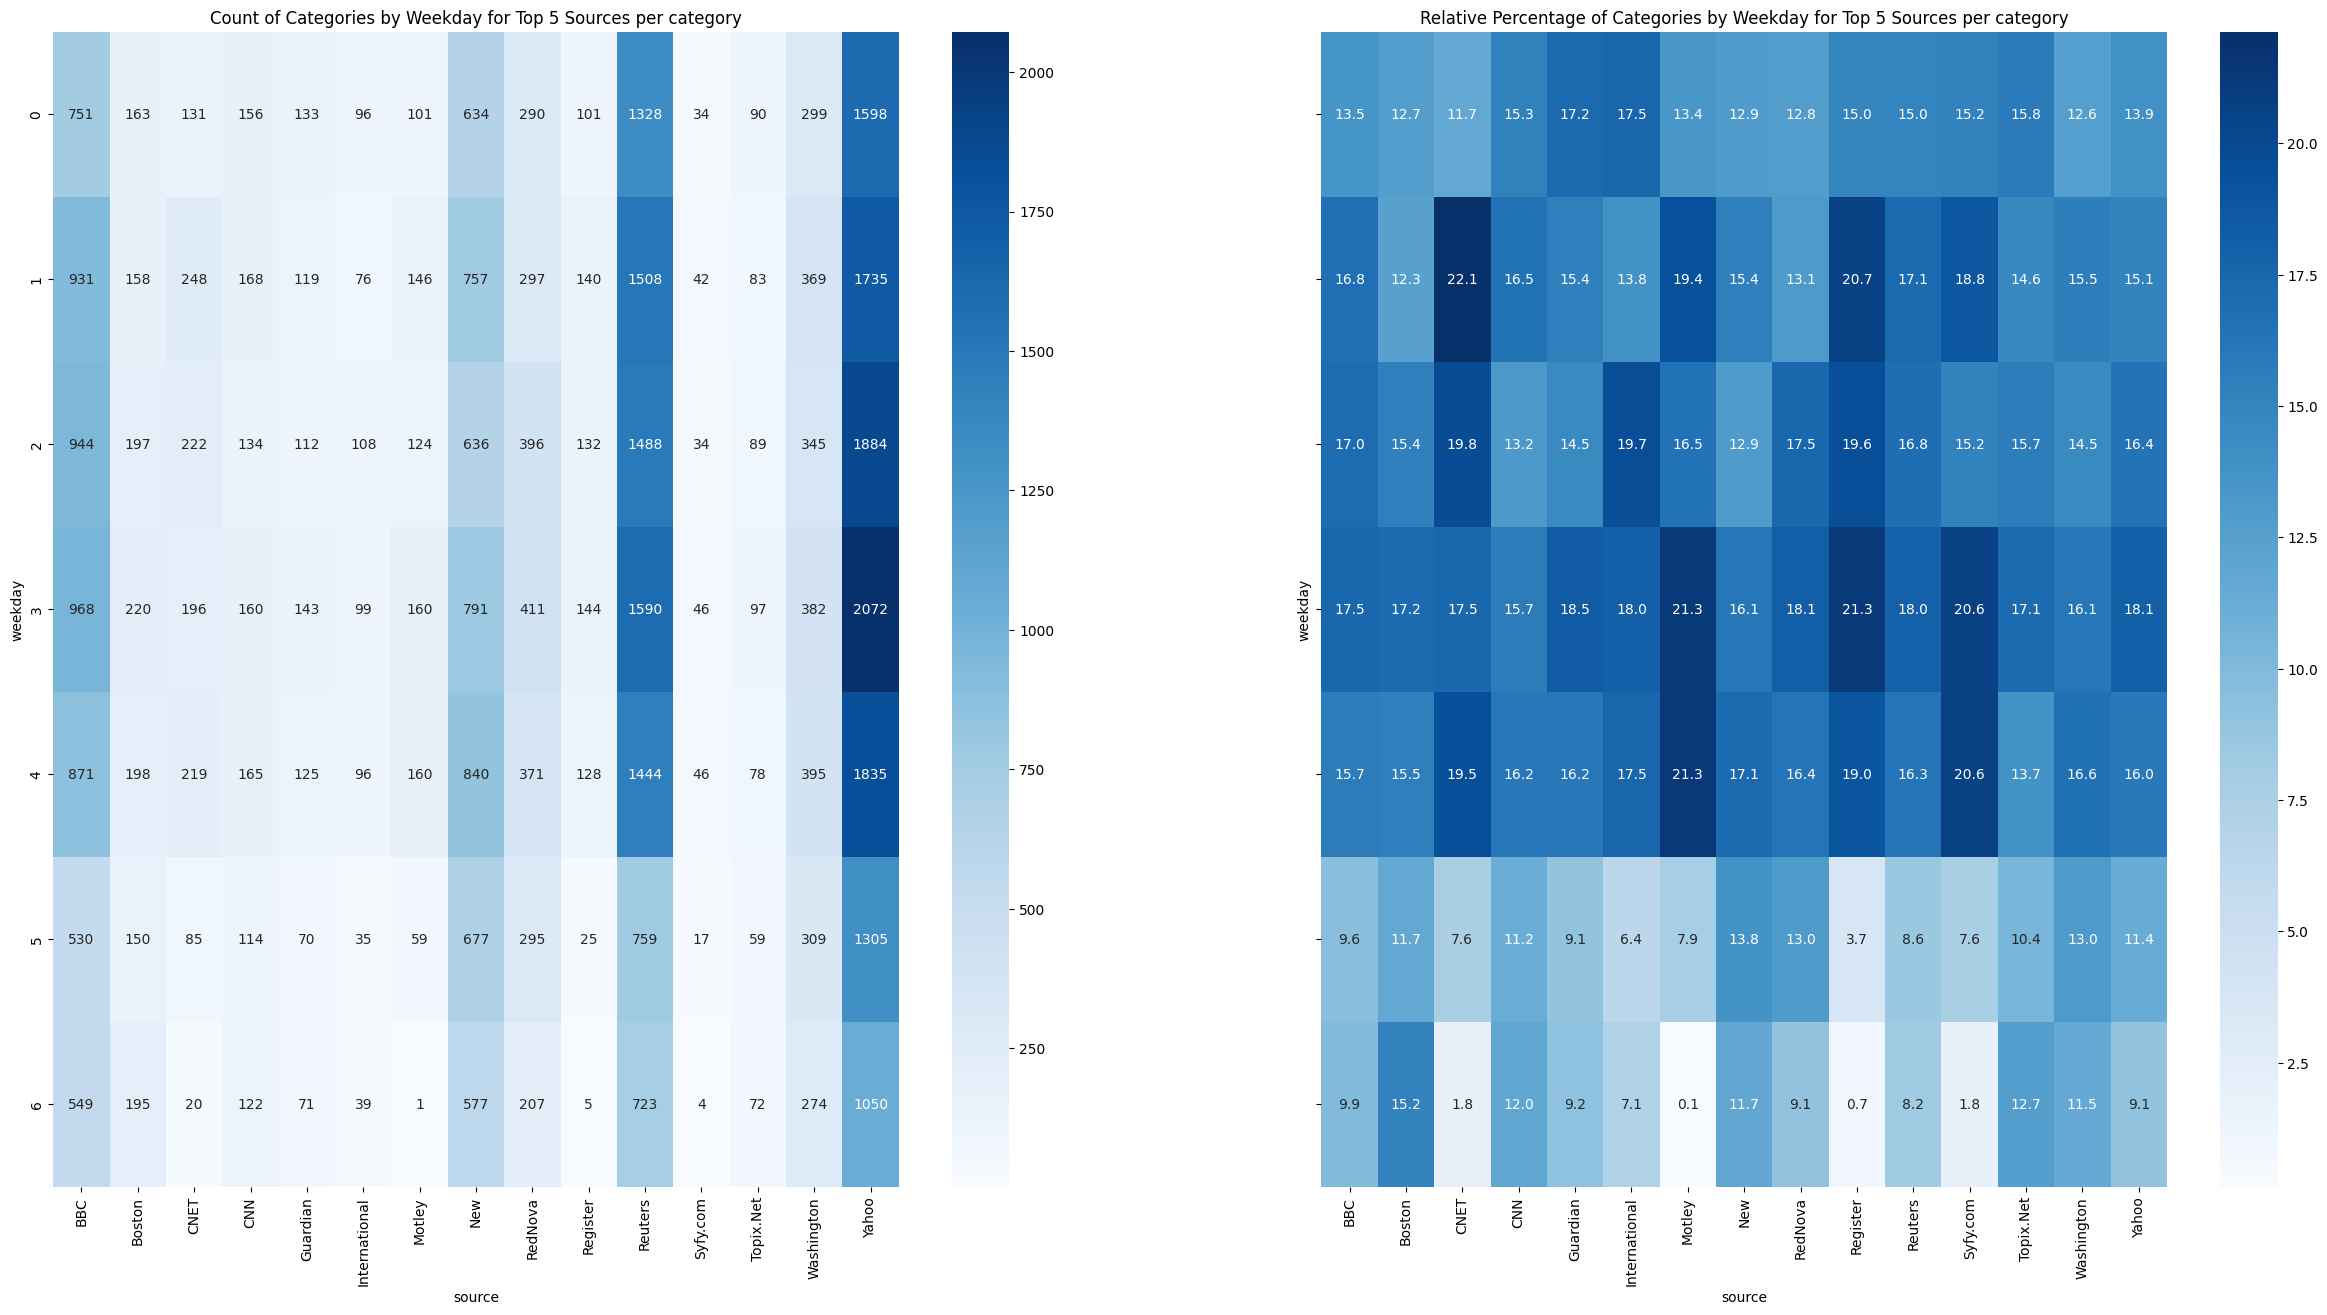

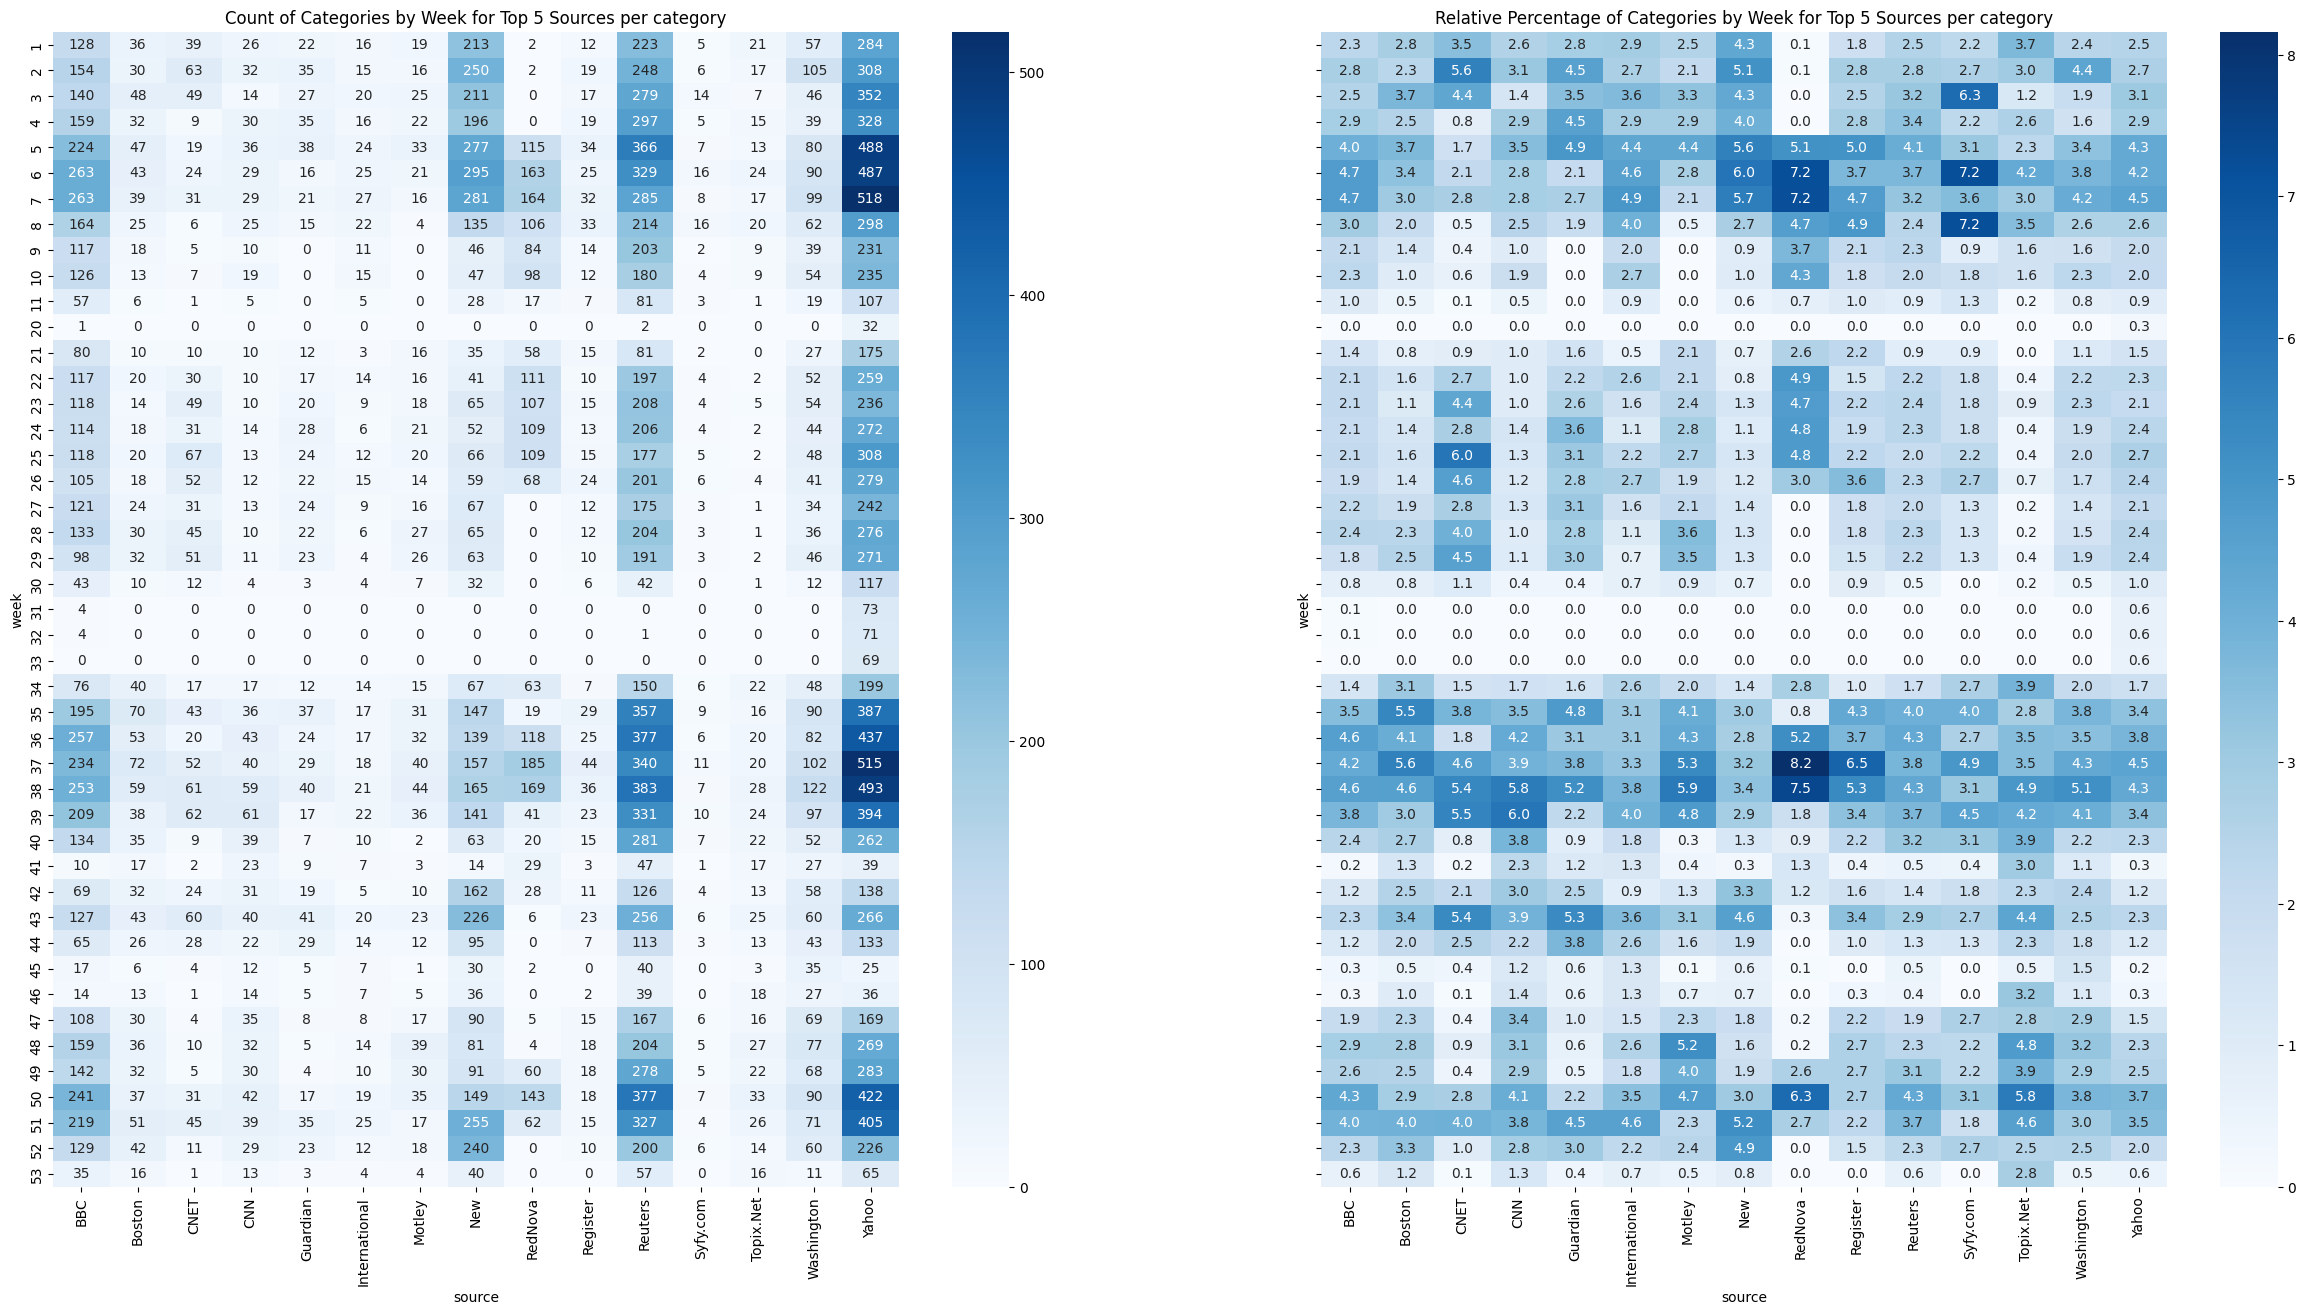

In [16]:
for col in ['year', 'month', 'day', 'hour', 'weekday', 'week']:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 15), sharey=True)
    
    matrix = dev_df_top_sources.groupby([col, 'source']).size().unstack(fill_value=0)
    relative_matrix = (matrix / matrix.sum(axis=0)) * 100
    
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', ax=ax1)
    sns.heatmap(relative_matrix, annot=True, fmt='.1f', cmap='Blues', ax=ax2)
    
    ax1.set_title(f'Count of Categories by {col.capitalize()} for Top 5 Sources per category')
    ax2.set_title(f'Relative Percentage of Categories by {col.capitalize()} for Top 5 Sources per category')

#### Top 5 sources by category

Text(0.5, 1.0, 'Relative Percentage of Categories by Week for Top 5 Sources per category')

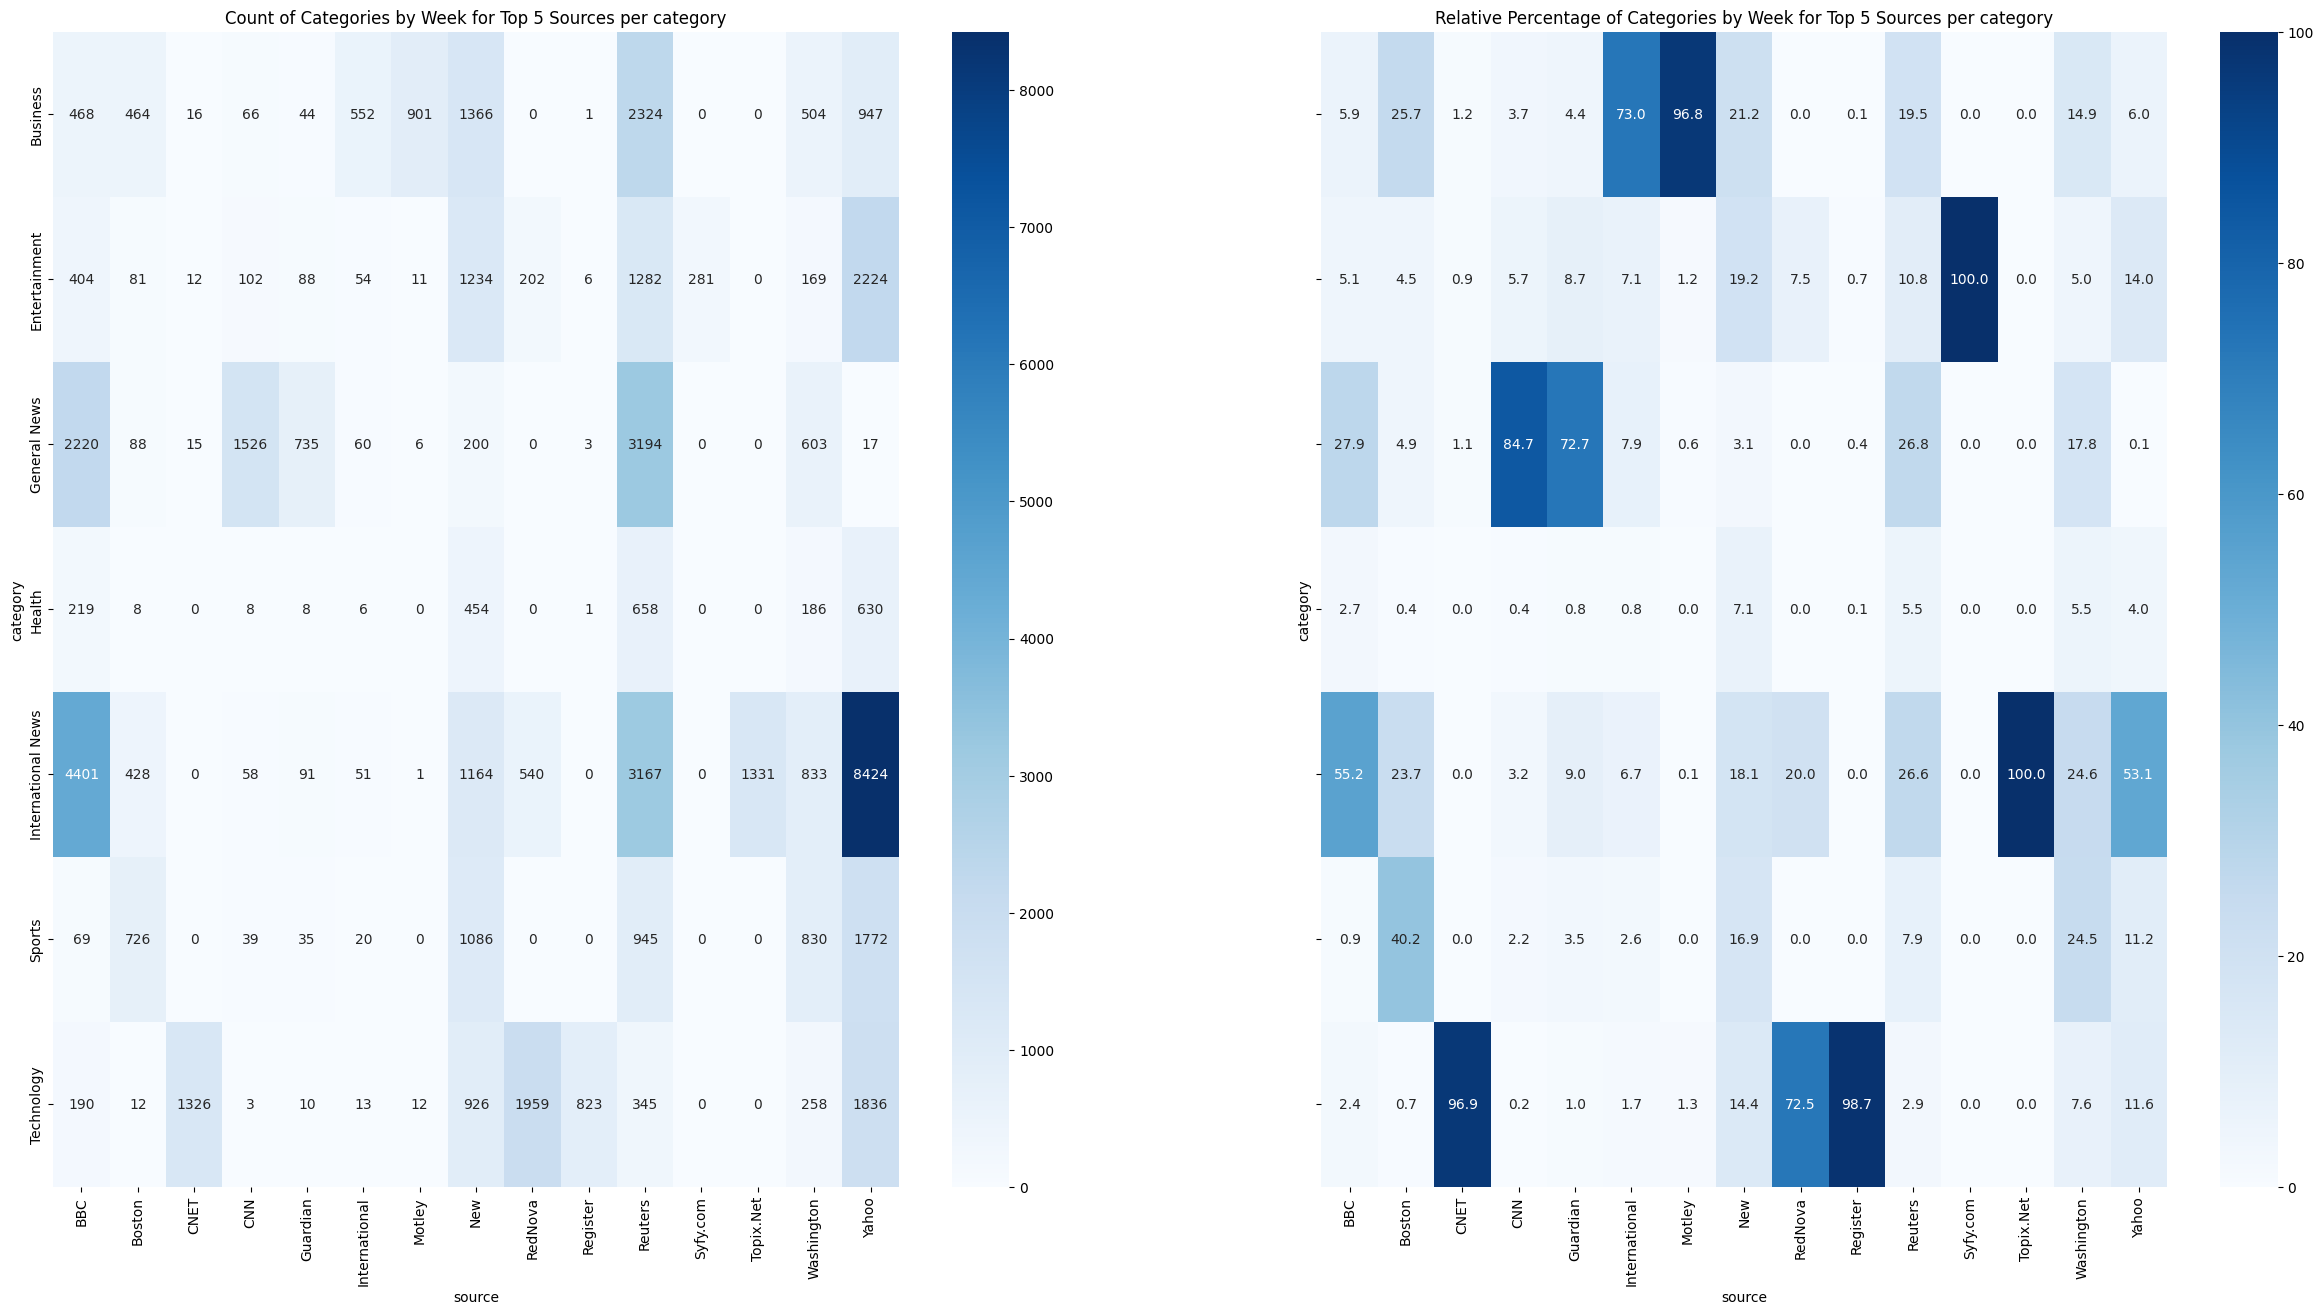

In [17]:
grouped = dev_df.groupby(by = ['category', 'source']).size()
top_5_sources = grouped.groupby(level=0, group_keys=False).nlargest(5)


top_5_sources = top_5_sources.reset_index(name='count')['source'].unique()

top_5_sources


dev_df_top_sources = dev_df[dev_df['source'].isin(top_5_sources)]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 15), sharey=True)
matrix = dev_df_top_sources.groupby(['category', 'source']).size().unstack(fill_value=0)
relative_matrix = (matrix / matrix.sum(axis=0)) * 100
    
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', ax=ax1)
sns.heatmap(relative_matrix, annot=True, fmt='.1f', cmap='Blues', ax=ax2)
    
ax1.set_title(f'Count of Categories by {col.capitalize()} for Top 5 Sources per category')
ax2.set_title(f'Relative Percentage of Categories by {col.capitalize()} for Top 5 Sources per category')

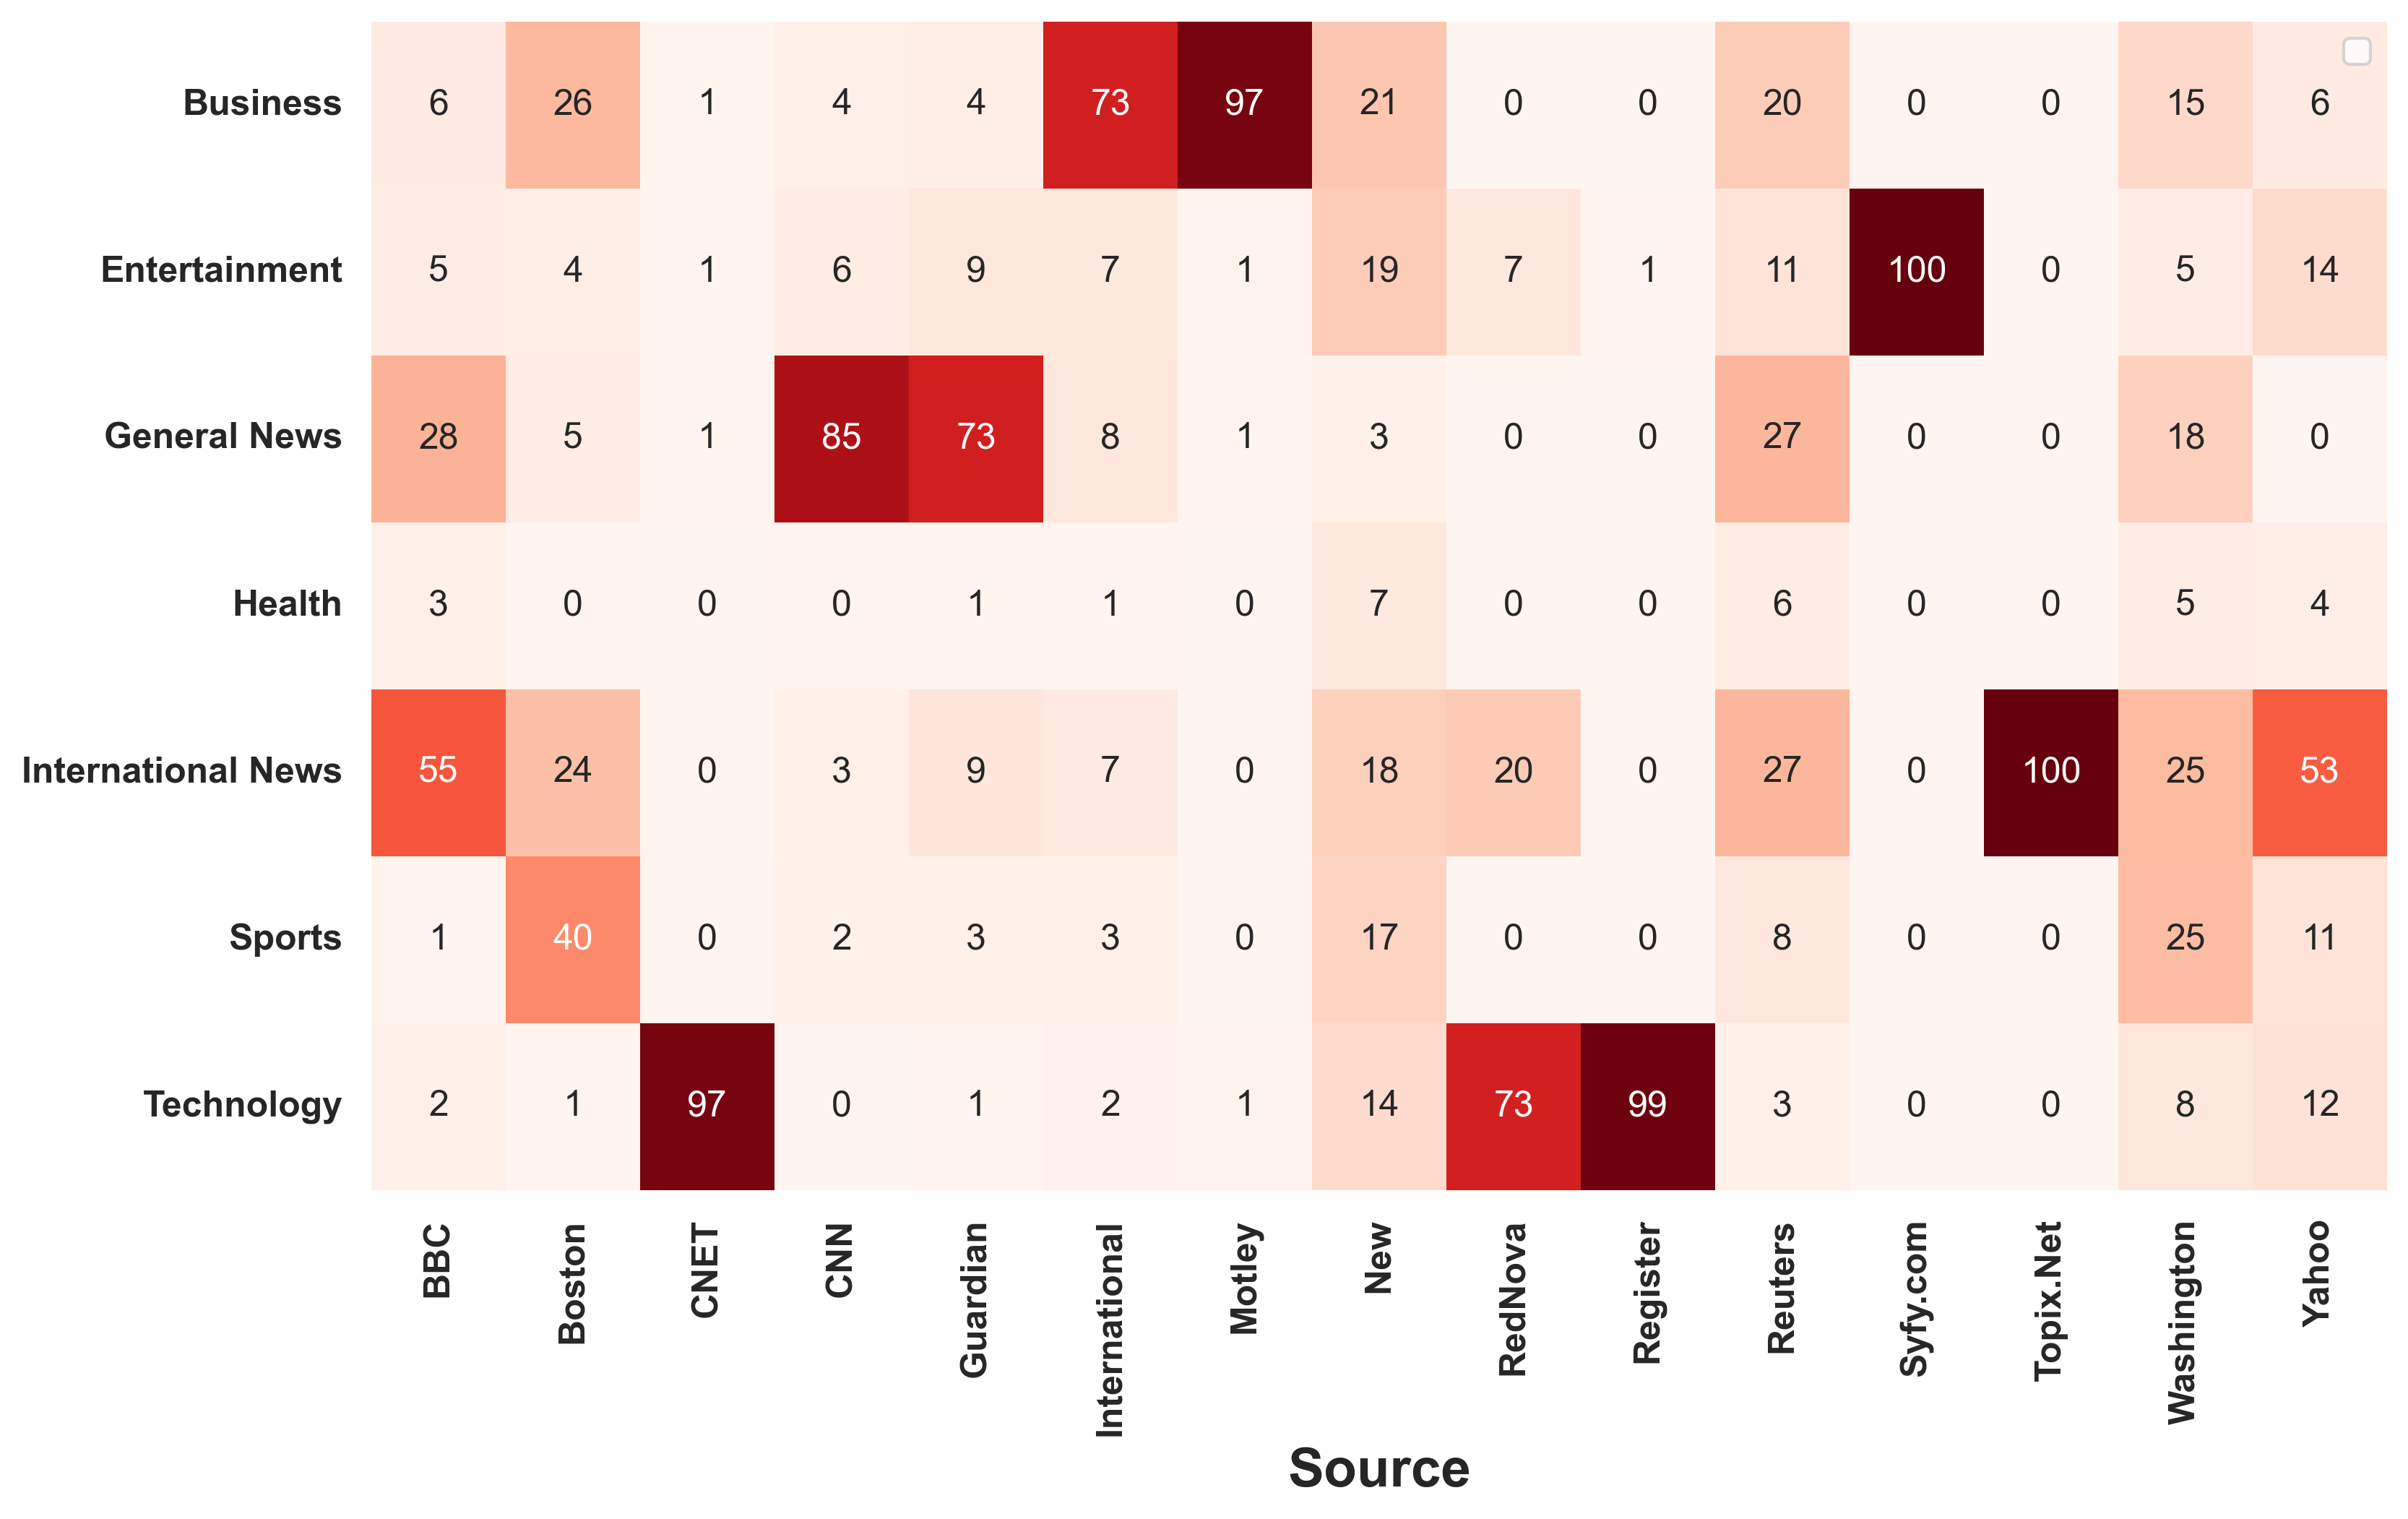

In [88]:
sns.set_theme(style="white")
plt.figure(figsize=(12, 7), dpi=300)

top_n = 5

grouped = dev_df.groupby(by = ['category', 'source']).size()
top_5_sources = grouped.groupby(level=0, group_keys=False).nlargest(top_n)
top_5_sources = top_5_sources.reset_index(name='count')['source'].unique()
dev_df_top_sources = dev_df[dev_df['source'].isin(top_5_sources)]
matrix = dev_df_top_sources.groupby(['category', 'source']).size().unstack(fill_value=0)
relative_matrix = (matrix / matrix.sum(axis=0)) * 100



ax = sns.heatmap(relative_matrix, annot=True, fmt='.0f', cmap='Reds', cbar=False )
#ax.set_title(f'Relative Percentage of Categories by Source for Top {top_n} Sources per Category', fontsize=18, fontweight='bold', pad=30)
plt.ylabel('')
plt.xlabel('Source', fontsize=18,  fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold', rotation=90)
plt.yticks(fontsize=12, fontweight='bold', rotation=0)

plt.legend()


ax.spines[['top', 'right', 'left']].set_visible(False)


plt.savefig('report/top_sources.svg', bbox_inches='tight')
plt.savefig('report/top_sources.pdf', bbox_inches='tight')
plt.savefig('report/top_sources.png', bbox_inches='tight', dpi=300)

plt.show()






<Axes: title={'center': 'Category Distribution for Source: Wired'}, xlabel='category'>

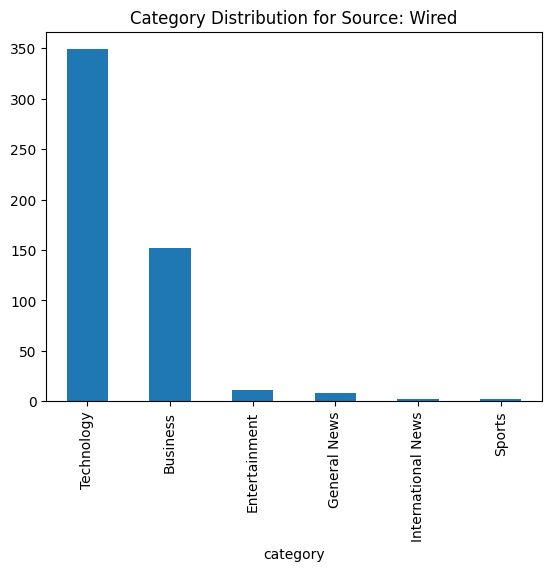

In [18]:
source = "Wired" 
#source = np.random.choice(dev_df['source'].unique(), size=1)[0]

dev_df[dev_df['source'] == source]['category'].value_counts().plot(kind='bar', title=f'Category Distribution for Source: {source}')

### Duplicates

#### Ok duplicates, i.e., same title, same source, same article, same label

In [19]:
small_dev_df = dev_df[['source','title','article','label']]
small_dev_df.duplicated().sum()

np.int64(1368)

In [20]:
grouped = small_dev_df.groupby(by = ['source','title','article', 'label'], as_index=False).size()
grouped[grouped['size'] >= 2].sort_values(by='size', ascending=False)

source                                              title  \
14202        CNN  ADV: Distance Learning Directory - Online Degrees   
14212        CNN       ADV: Health Insurance for the Self-Employed!   
14194        CNN        ADV: $150,000 Mortgage for Under $690/Month   
77198      Yahoo           Weather around the U.S.A. \\n    (AP)\\n   
14195        CNN        ADV: $175,000 Mortgage for Under $730/Month   
...          ...                                                ...   
30522        New       More Doctors in Texas After Malpractice Caps   
30528        New         More Questions for Producer of Flu Vaccine   
30529        New  More Testing of Seafood to Address Mercury Con...   
30546        New                    Mother Natureâs Restless Sons   
78622  swissinfo                     World unprepared for avian flu   

                                                 article  label  size  
14202  Bachelor, Master and Post-Grad degrees online ...      5    16  
14212  Affordable health, dental, and life insurance ...      5    15  
14194  Mortgage rates are at record lows. Save $1000s...      5    13  
77198                     AP - Weather around the U.S.A.      2    11  
14195  Mortgage rates are at record lows. Save $1000s...      5    10  
...                                                  ...    ...   ...  
30522  After Texas limited awards in medical malpract...      6     2  
30528  The F.D.A. is demanding that Chiron provide mo...      6     2  
30529  Some restaurants and retailers around the coun...      6     2  
30546  Sean Penn finds a kindred spirit in the hero o...      3     2  
78622  &quot;We believe with the current influenza va...      3     2  

[1131 rows x 5 columns]

In [21]:
dev_df[(dev_df['source'] == 'CNN') & (dev_df['title'] == 'ADV: Distance Learning Directory - Online Degrees') & (dev_df['article'] == "Bachelor, Master and Post-Grad degrees online from accredited colleges and universities. Business, Education, IT, Healthcare, more. Browse by degree or program. Request info and get started today.")].sort_values(by='label')

Id source                                              title  \
15603  15603    CNN  ADV: Distance Learning Directory - Online Degrees   
16212  16212    CNN  ADV: Distance Learning Directory - Online Degrees   
18737  18737    CNN  ADV: Distance Learning Directory - Online Degrees   
31551  31551    CNN  ADV: Distance Learning Directory - Online Degrees   
44852  44852    CNN  ADV: Distance Learning Directory - Online Degrees   
45703  45703    CNN  ADV: Distance Learning Directory - Online Degrees   
46395  46395    CNN  ADV: Distance Learning Directory - Online Degrees   
46440  46440    CNN  ADV: Distance Learning Directory - Online Degrees   
48399  48399    CNN  ADV: Distance Learning Directory - Online Degrees   
50293  50293    CNN  ADV: Distance Learning Directory - Online Degrees   
54076  54076    CNN  ADV: Distance Learning Directory - Online Degrees   
65801  65801    CNN  ADV: Distance Learning Directory - Online Degrees   
74520  74520    CNN  ADV: Distance Learning Directory - Online Degrees   
74950  74950    CNN  ADV: Distance Learning Directory - Online Degrees   
75313  75313    CNN  ADV: Distance Learning Directory - Online Degrees   
78232  78232    CNN  ADV: Distance Learning Directory - Online Degrees   

                                                 article  page_rank  \
15603  Bachelor, Master and Post-Grad degrees online ...          5   
16212  Bachelor, Master and Post-Grad degrees online ...          5   
18737  Bachelor, Master and Post-Grad degrees online ...          5   
31551  Bachelor, Master and Post-Grad degrees online ...          5   
44852  Bachelor, Master and Post-Grad degrees online ...          5   
45703  Bachelor, Master and Post-Grad degrees online ...          5   
46395  Bachelor, Master and Post-Grad degrees online ...          5   
46440  Bachelor, Master and Post-Grad degrees online ...          5   
48399  Bachelor, Master and Post-Grad degrees online ...          5   
50293  Bachelor, Master and Post-Grad degrees online ...          5   
54076  Bachelor, Master and Post-Grad degrees online ...          5   
65801  Bachelor, Master and Post-Grad degrees online ...          5   
74520  Bachelor, Master and Post-Grad degrees online ...          5   
74950  Bachelor, Master and Post-Grad degrees online ...          5   
75313  Bachelor, Master and Post-Grad degrees online ...          5   
78232  Bachelor, Master and Post-Grad degrees online ...          5   

                 timestamp  label      category       timestamp_new  year  \
15603  0000-00-00 00:00:00      5  General News                 NaT  <NA>   
16212  2004-10-02 18:22:59      5  General News 2004-10-02 18:22:59  2004   
18737  2004-08-21 05:23:30      5  General News 2004-08-21 05:23:30  2004   
31551  2004-10-25 10:02:00      5  General News 2004-10-25 10:02:00  2004   
44852  0000-00-00 00:00:00      5  General News                 NaT  <NA>   
45703  0000-00-00 00:00:00      5  General News                 NaT  <NA>   
46395  2004-10-03 05:27:22      5  General News 2004-10-03 05:27:22  2004   
46440  0000-00-00 00:00:00      5  General News                 NaT  <NA>   
48399  0000-00-00 00:00:00      5  General News                 NaT  <NA>   
50293  2004-11-20 19:59:57      5  General News 2004-11-20 19:59:57  2004   
54076  2004-11-18 01:21:03      5  General News 2004-11-18 01:21:03  2004   
65801  0000-00-00 00:00:00      5  General News                 NaT  <NA>   
74520  0000-00-00 00:00:00      5  General News                 NaT  <NA>   
74950  0000-00-00 00:00:00      5  General News                 NaT  <NA>   
75313  2004-11-11 20:43:51      5  General News 2004-11-11 20:43:51  2004   
78232  2004-09-26 01:03:08      5  General News 2004-09-26 01:03:08  2004   

       month   day  hour  weekday  week  
15603   <NA>  <NA>  <NA>     <NA>  <NA>  
16212     10     2    18        5    40  
18737      8    21     5        5    34  
31551     10    25    10        0    44  
44852   <NA>  <NA>  <NA

#### Non-oj duplicates, i.e., same title, same source, same article, different label

In [22]:
grouped = small_dev_df.groupby(by = ['source','title','article'], as_index=False)['label'].agg({'nunique'})
grouped[grouped['nunique'] >= 2].sort_values(by='nunique', ascending=False)

source                                              title  \
45614       Reuters      Paris Hilton starts serving jail term: lawyer   
30589           New            Radioâs Challenge: Counting the Young   
25510        Motley                               Is Apple Photogenic?   
41567       Reuters  Father of Indian Reforms, Former PM Rao Dies a...   
3479            BBC                   Czech anger at caged beds report   
...             ...                                                ...   
17509  DMeurope.com                   JFK assassination game draws ire   
17507  DMeurope.com  Global mobile handset sales up 35% in second q...   
17502            DM        Microsoft Delays New Windows Search Feature   
17481     Cybercast  Democratic National Committee &#39;Action Aler...   
77102     swissinfo                                  Myanmar PM ousted   

                                                 article  nunique  
45614  LOS ANGELES (Reuters) - Admitting she was frig...        3  
30589  The electronic audience measurement tool, the ...        3  
25510  With competitors avidly trying to nibble at th...        3  
41567  Former Indian Prime Minister PV Narasimha Rao,...        3  
3479   A Czech minister says a BBC report on caged be...        3  
...                                                  ...      ...  
17509  A video game released to coincide with the 41s...        2  
17507  Worldwide mobile phone sales surpassed 156.4m ...        2  
17502  Microsoft will release its long-awaited update...        2  
17481  Back in February, President Bush sat down in t...        2  
77102  Khin Nyunt&#39;s removal, yet to be confirmed ...        2  

[1472 rows x 4 columns]

In [23]:
dev_df[(dev_df['source'] == 'Reuters') & (dev_df['title'] == 'Paris Hilton starts serving jail term: lawyer')].sort_values(by='label')

Id   source                                          title  \
7089    7089  Reuters  Paris Hilton starts serving jail term: lawyer   
29992  29992  Reuters  Paris Hilton starts serving jail term: lawyer   
15754  15754  Reuters  Paris Hilton starts serving jail term: lawyer   
44170  44170  Reuters  Paris Hilton starts serving jail term: lawyer   

                                                 article  page_rank  \
7089   LOS ANGELES (Reuters) - Admitting she was frig...          5   
29992  LOS ANGELES (Reuters) - Admitting she was frig...          5   
15754  LOS ANGELES (Reuters) - Admitting she was frig...          5   
44170  LOS ANGELES (Reuters) - Admitting she was frig...          5   

                 timestamp  label            category       timestamp_new  \
7089   2007-06-04 12:46:32      0  International News 2007-06-04 12:46:32   
29992  2007-06-04 23:43:02      3       Entertainment 2007-06-04 23:43:02   
15754  2007-06-04 17:27:53      5        General News 2007-06-04 17:27:53   
44170  2007-06-04 17:39:37      5        General News 2007-06-04 17:39:37   

       year  month  day  hour  weekday  week  
7089   2007      6    4    12        0    23  
29992  2007      6    4    23        0    23  
15754  2007      6    4    17        0    23  
44170  2007      6    4    17        0    23

### Length distributions

In [38]:

from utils.feature_extrc import clean_text

dev_df['article_clean'] = dev_df['article'].apply(clean_text)
dev_df['article_length'] = dev_df['article_clean'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)


dev_df['title_clean'] = dev_df['title'].apply(clean_text)
dev_df['title_length'] = dev_df['title_clean'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

In [39]:
dev_df

Id            source  \
0          0     AllAfrica.com   
1          1            Xinhua   
2          2             Yahoo   
3          3               BBC   
4          4             Yahoo   
...      ...               ...   
79992  79992             Yahoo   
79993  79993  All-Baseball.com   
79994  79994             Yahoo   
79995  79995             Voice   
79996  79996             Yahoo   

                                                   title  \
0      OPEC Boosts Nigeria&#39;s Oil Revenue By .82m Bpd   
1      Yearender: Mideast peace roadmap reaches dead-...   
2      Battleground Dispatches for Oct. 5 \\n    (CQP...   
3                       Air best to resuscitate newborns   
4      High tech German train crash kills at least on...   
...                                                  ...   
79992  Italy's embattled Prodi faces vote of confiden...   
79993                        Ding Dong, the Deal is Dead   
79994  Two bombs discovered in Sardinia after Berlusc...   
79995  Red Cross Report Alleges US Detainee Abuse at ...   
79996  UN: Myanmar allows early visit by envoy \\n   ...   

                                                 article  page_rank  \
0      THE Organisation of Petroleum Exporting Countr...          5   
1      Looking back at the major events that took pla...          5   
2      CQPolitics.com - Here are today's Battleground...          5   
3      Air rather than oxygen should be used to resus...          5   
4      <p><a href="://us.rd.yahoo.com/dailynewshttp/r...          5   
...                                                  ...        ...   
79992  <p><a href="http://us.rd.yahoo.com/dailynews/r...          5   
79993  As yesterday began, there was widespread antic...          5   
79994  AFP - Police discovered two bombs near the Sar...          5   
79995  A report by the International Committee of the...          5   
79996  <p><a href="http://us.rd.yahoo.com/dailynews/r...          5   

                 timestamp  label            category  \
0      2004-09-16 22:39:53      5        General News   
1      2004-12-17 19:01:14      0  International News   
2      2006-10-05 18:42:29      0  International News   
3      0000-00-00 00:00:00      0  International News   
4      2006-09-22 17:28:57      0  International News   
...                    ...    ...                 ...   
79992  2008-01-23 11:39:35      0  International News   
79993  0000-00-00 00:00:00      4              Sports   
79994  0000-00-00 00:00:00      0  International News   
79995  0000-00-00 00:00:00      3       Entertainment   
79996  2007-10-24 17:15:44      0  International News   

                                           article_clean  article_length  \
0       organisation of petroleum exporting countries...              29   
1      looking back at  major events that took place ...              24   
2      cqpolitics com here are today s battleground d...              28   
3      air rather than oxygen should be used to resus...              17   
4      reuters a high tech german train carrying peop...              33   
...                                                  ...             ...   
79992  afp embattled italian prime minister romano pr...              27   
79993  as yesterday began there was widespread antici...              30   
79994  afp police discovered two bombs near  sardinia...              27   
79995  a report by  international committee of  red c...              27   
79996  ap myanmar s junta has agreed to allow a u n e...              37   

                                             title_clean  title_length  
0             opec boosts nigeria s oil revenue by m bpd             9  
1      yearender mideast peace roadmap reaches dead e...             8  
2            battleground dispatches  oct cqpolitics com             5  
3                       air best to resuscitate newborns             5  
4      high tech german train crash kills at least on...        

In [40]:
bins = [0, 10, 100, 180, np.inf]
label = ['Very Short', 'Short', 'Medium', 'Long']
dev_df['article_length_category'] = pd.cut(dev_df['article_length'], bins=bins, labels=label)

In [41]:
dev_df['title_length_category'] = pd.cut(dev_df['title_length'], bins=[0,5,10,15,np.inf], labels=label)

Text(0.5, 1.0, 'Relative Percentage of Categories by article lenght')

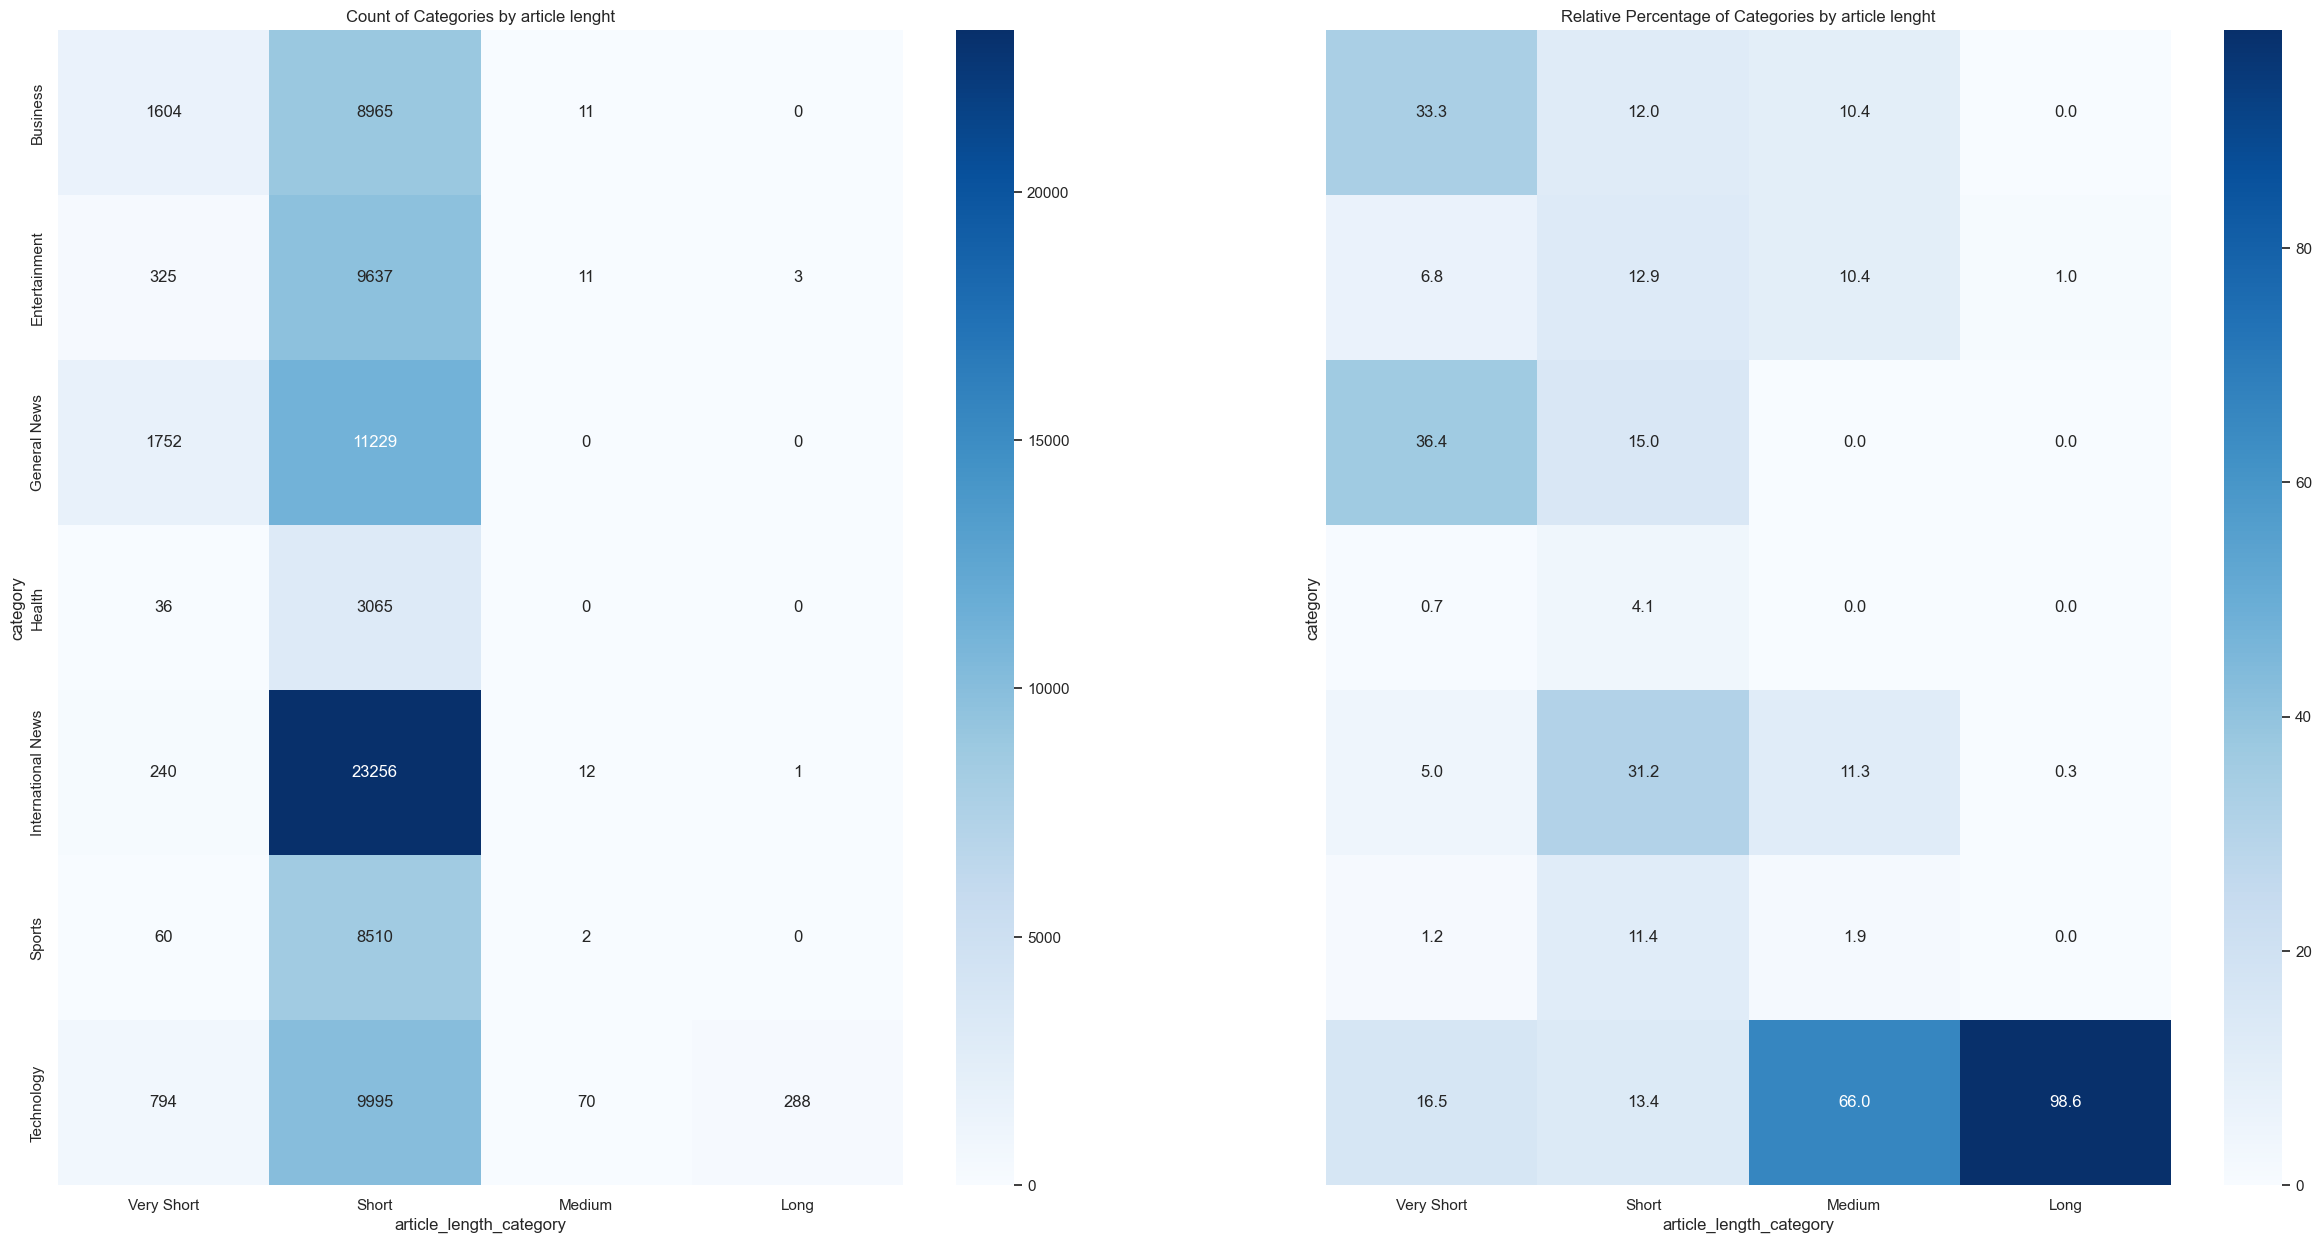

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 15), sharey=True)
matrix = dev_df.groupby(['category', 'article_length_category']).size().unstack(fill_value=0)
relative_matrix = (matrix / matrix.sum(axis=0)) * 100
    
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', ax=ax1)
sns.heatmap(relative_matrix, annot=True, fmt='.1f', cmap='Blues', ax=ax2)
    
ax1.set_title(f'Count of Categories by article lenght')
ax2.set_title(f'Relative Percentage of Categories by article lenght')

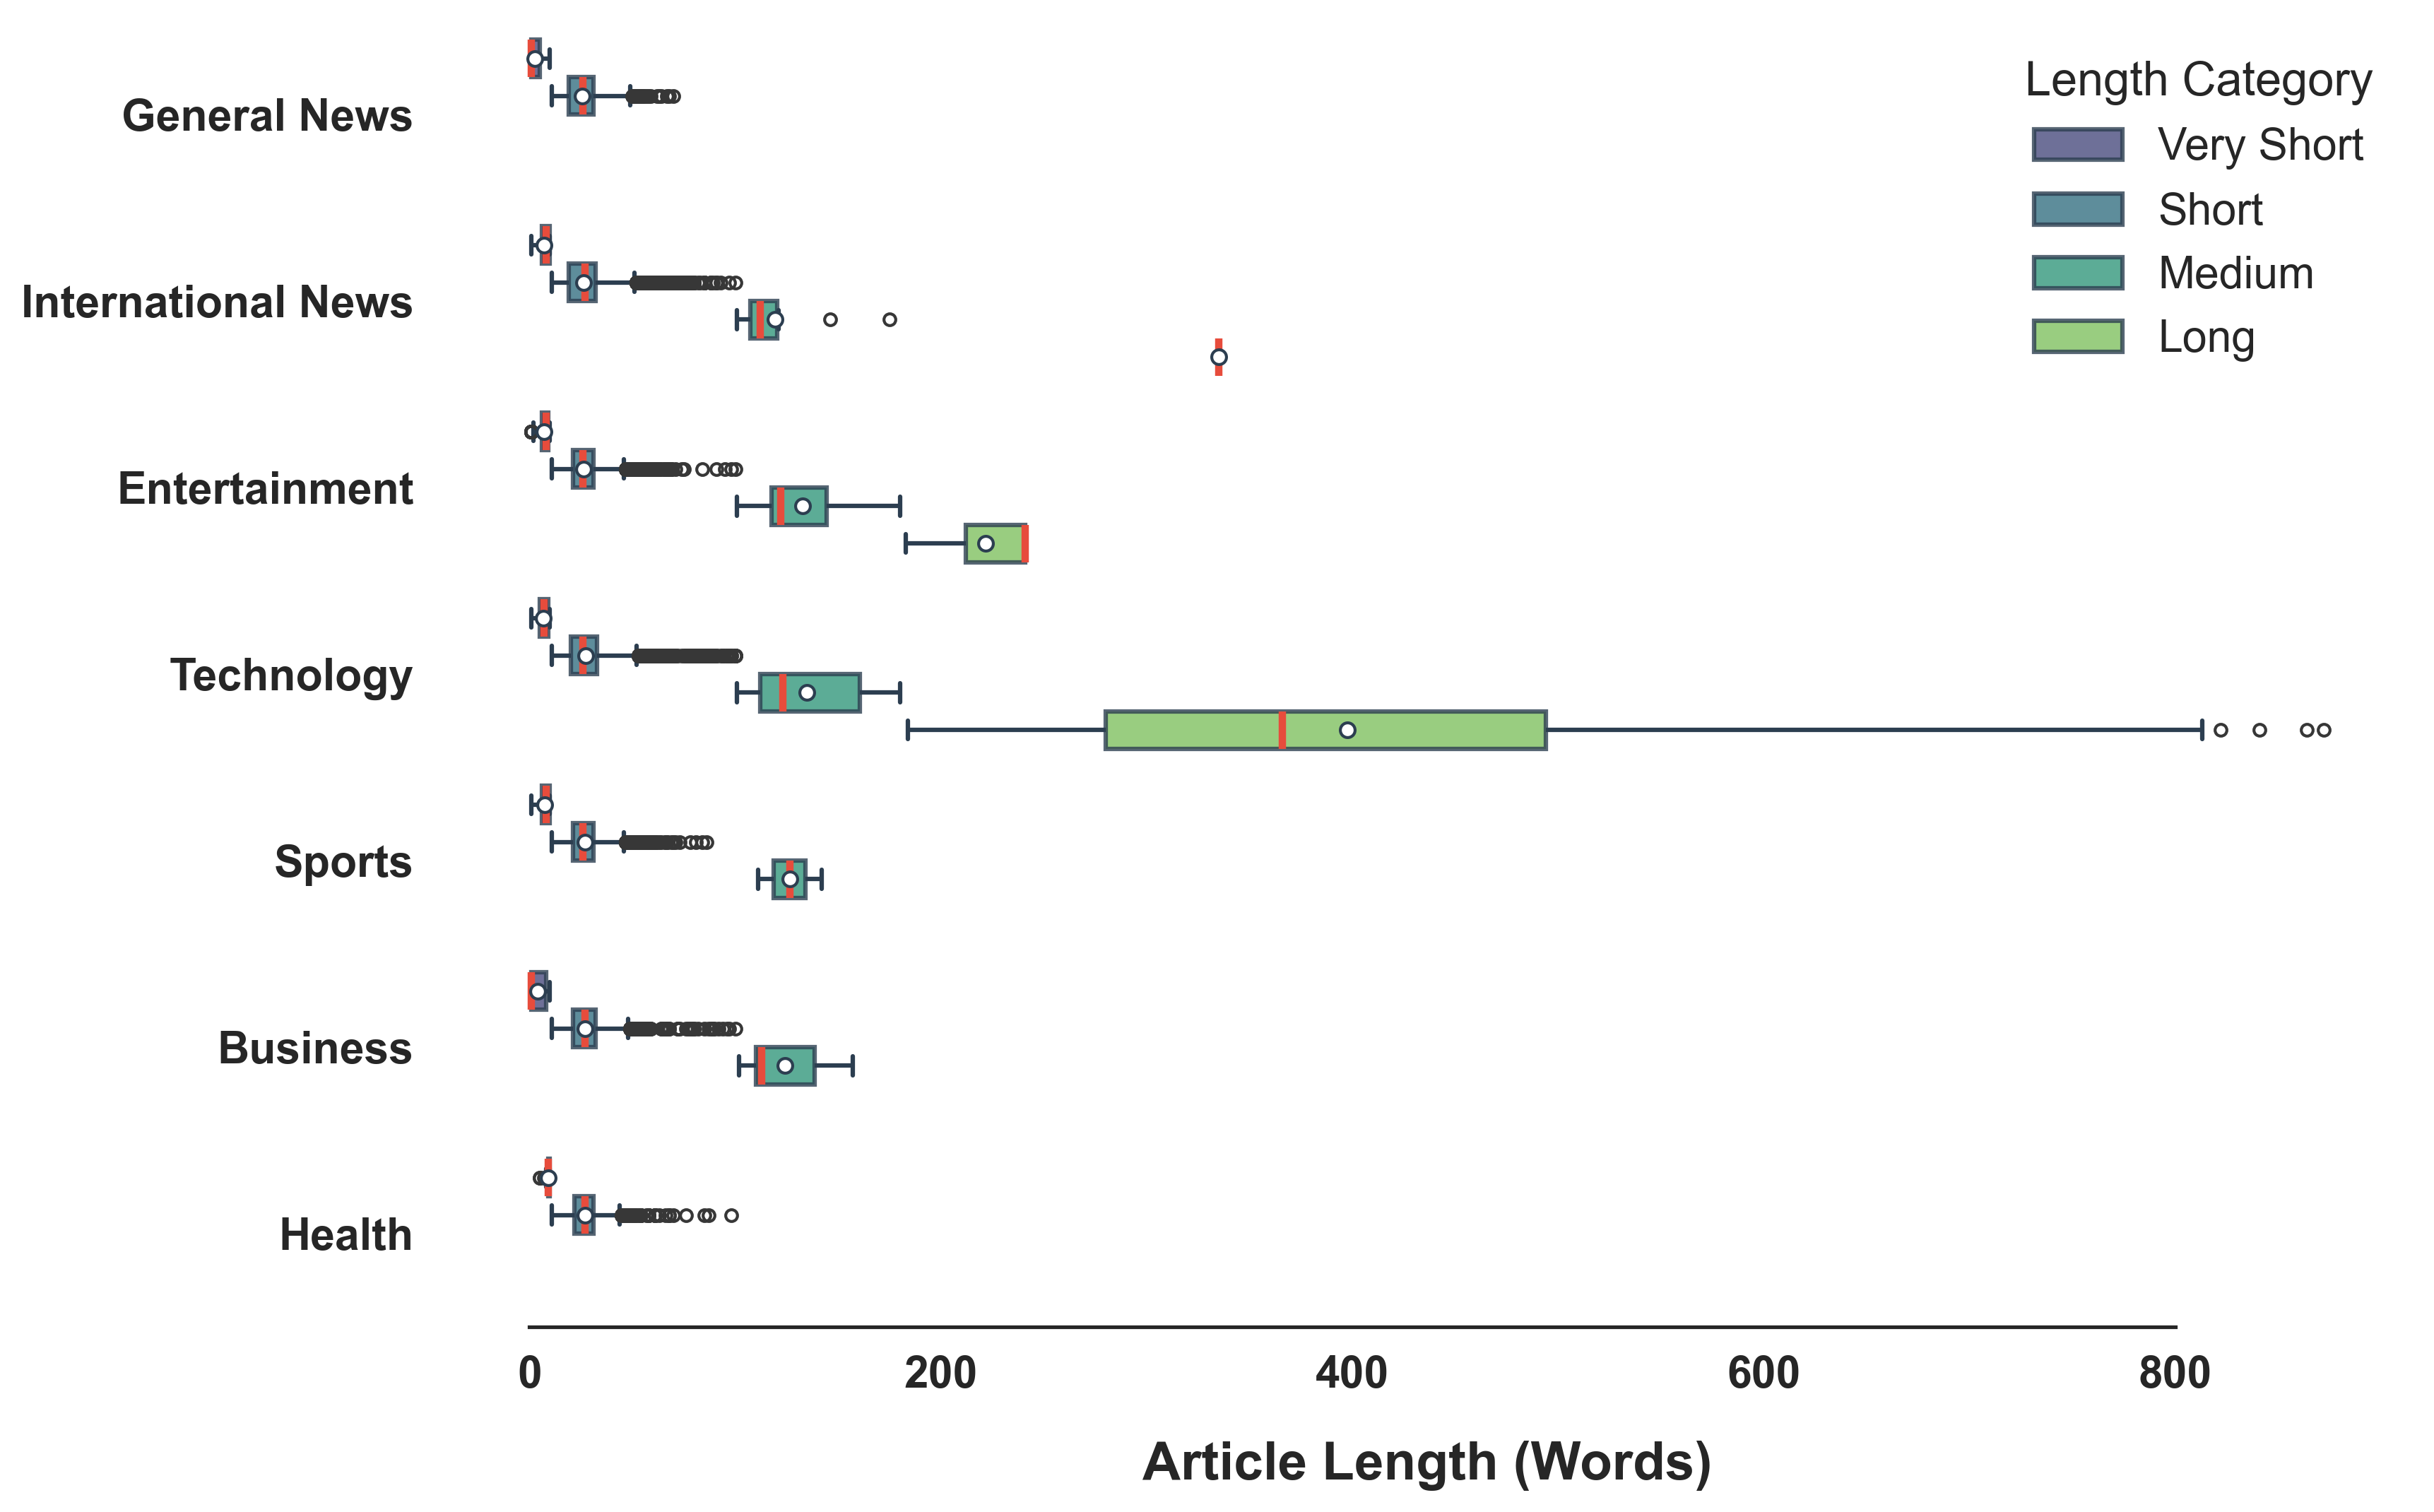

In [106]:
sns.set_theme(style="white")
fig, ax = plt.subplots(figsize=(12, 8), dpi=300)
palette = sns.color_palette("viridis", n_colors=4)

sns.boxplot(
    data=dev_df[dev_df['article_length'] <= 900],
    x='article_length',
    y='category',
    hue='article_length_category',
    palette=palette,
    ax=ax,
    linewidth=1.5,                  
    fliersize=4,                    
    boxprops={'alpha': 0.8, 'edgecolor': '#2c3e50'}, 
    whiskerprops={'color': '#2c3e50'},
    capprops={'color': '#2c3e50'},
    medianprops={'color': '#e74c3c', 'linewidth': 2.5}, 
    showmeans=True,                 
    meanprops={"marker": "o", "markerfacecolor": "white", "markeredgecolor": "#2c3e50", "markersize": 5}
)
sns.despine(trim=True, left=True) 


#ax.set_title('Article Length Distribution by Category and Type', fontsize=18, fontweight='bold', pad=25,)
ax.set_xlabel('Article Length (Words)', fontsize=18, labelpad=15, fontweight='bold')
ax.set_ylabel('')

ax.tick_params(axis='both', which='major', labelsize=15)
plt.xticks(fontsize=15, fontweight='bold')
plt.yticks(fontsize=15, fontweight='bold')


plt.legend(title='Length Category', title_fontsize=16, fontsize=15,
            loc='upper right', frameon=False)


plt.savefig('report/article_len.svg', bbox_inches='tight')
plt.savefig('report/article_len.pdf', bbox_inches='tight')
plt.savefig('report/article_len.png', bbox_inches='tight', dpi=300)


<Axes: xlabel='title_length', ylabel='category'>

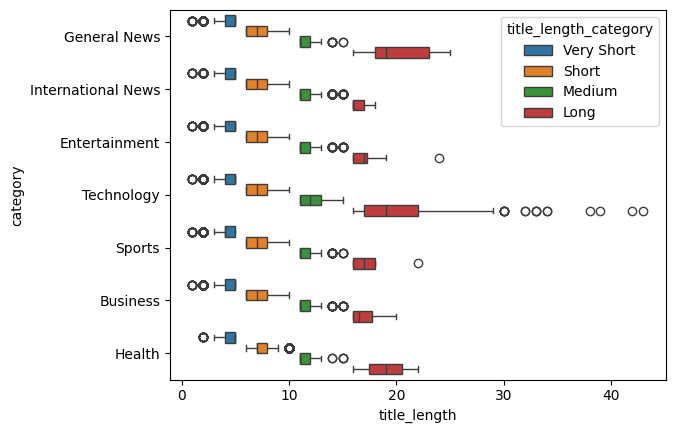

In [32]:
sns.boxplot(data = dev_df, x='title_length', y='category', hue='title_length_category')

Text(0.5, 1.0, 'Relative Percentage of Categories by title lenght')

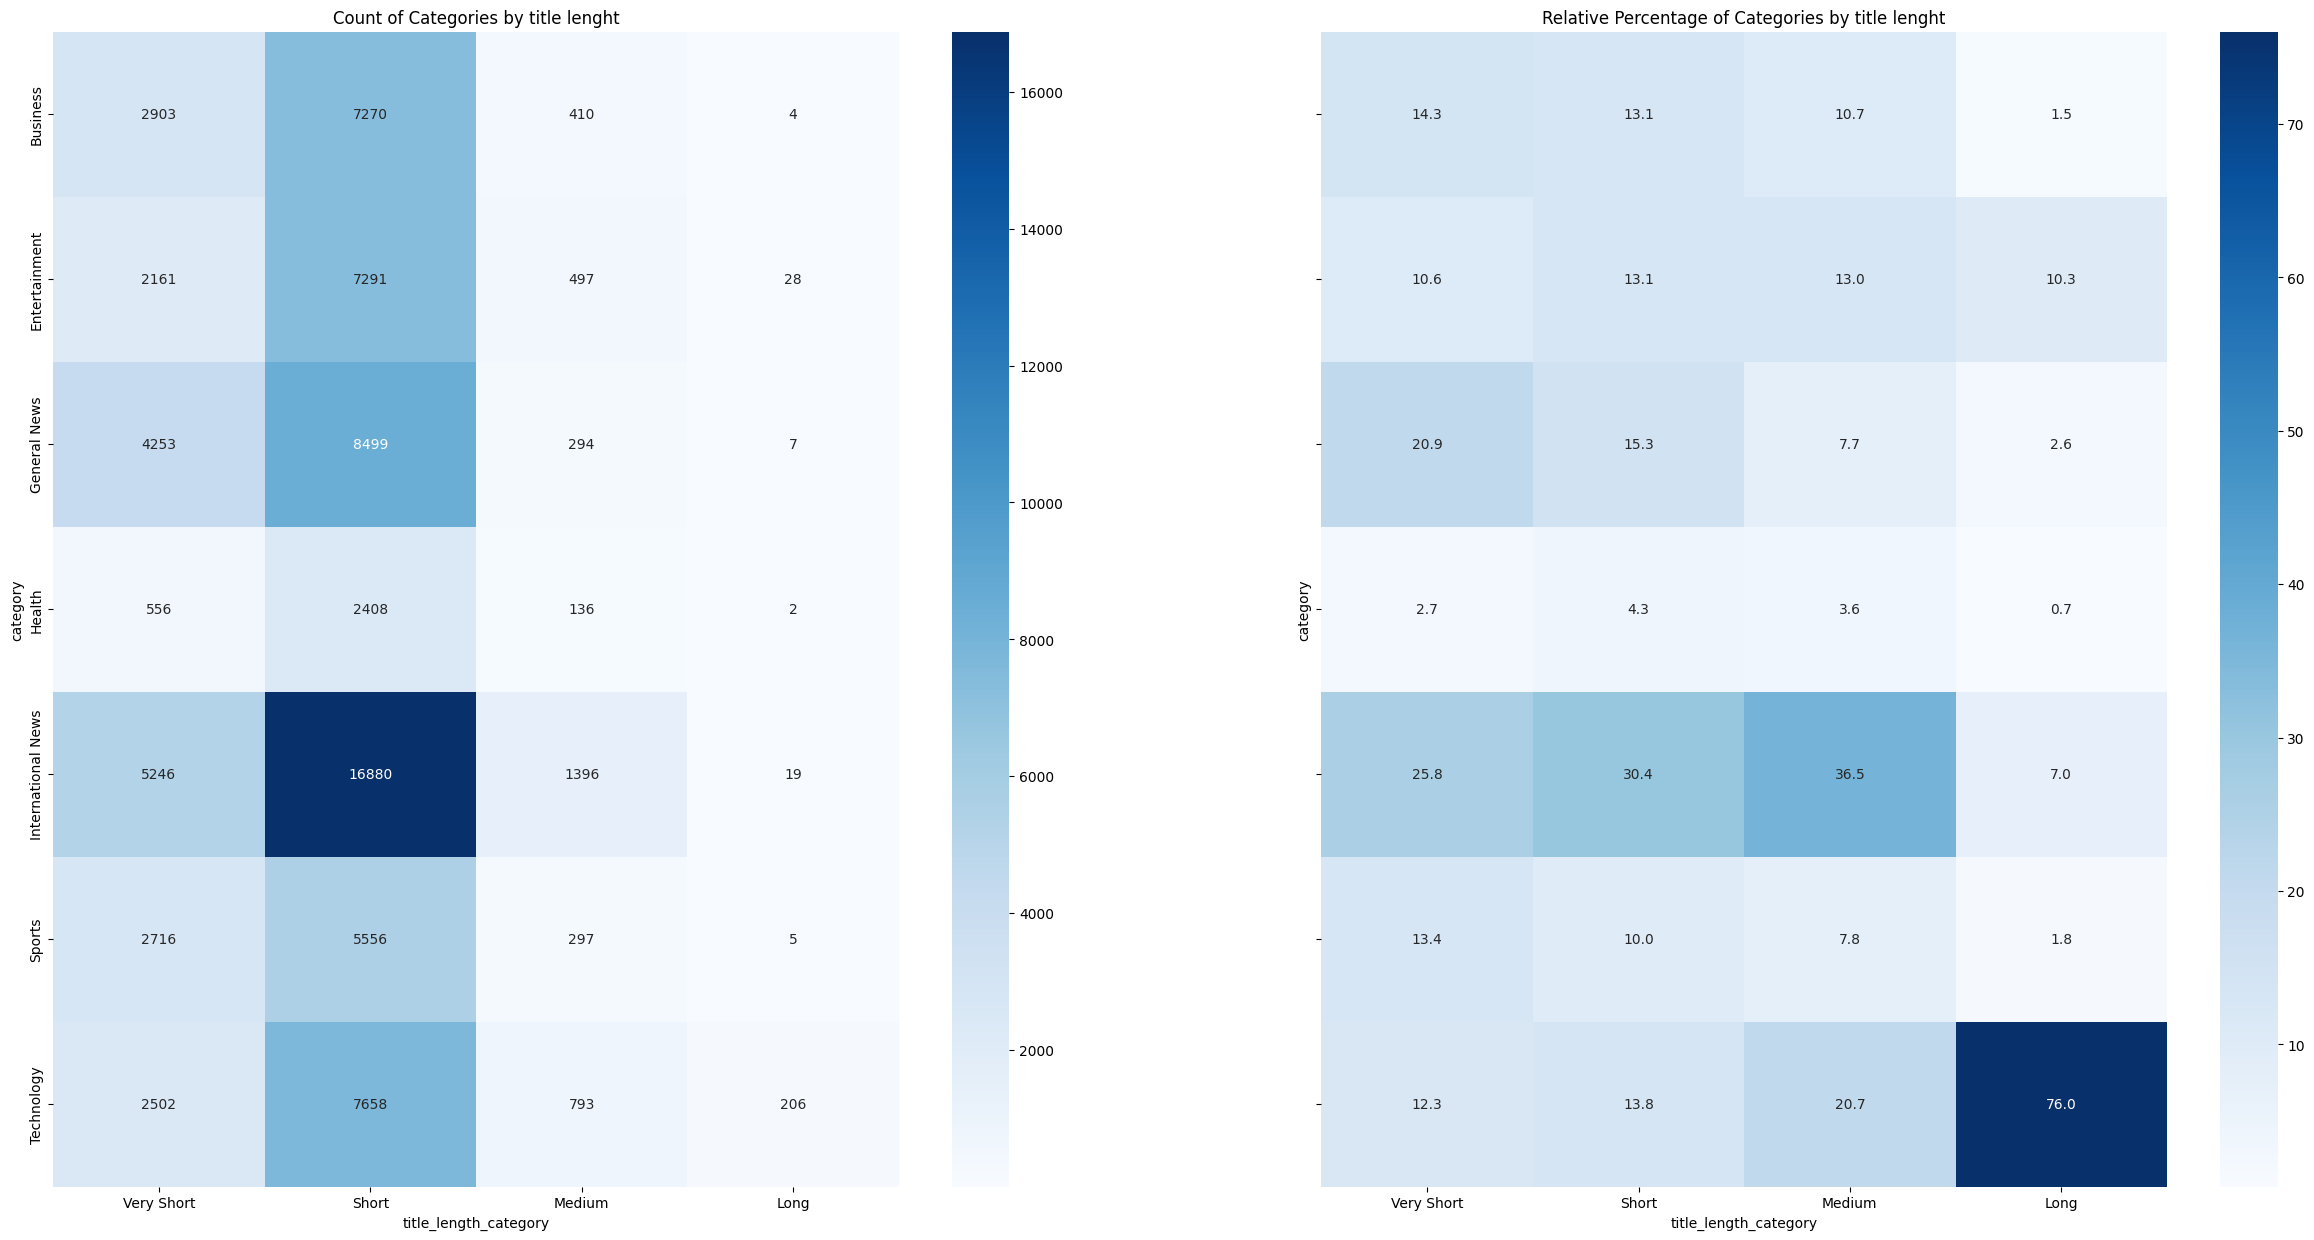

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 15), sharey=True)
matrix = dev_df.groupby(['category', 'title_length_category']).size().unstack(fill_value=0)
relative_matrix = (matrix / matrix.sum(axis=0)) * 100
    
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', ax=ax1)
sns.heatmap(relative_matrix, annot=True, fmt='.1f', cmap='Blues', ax=ax2)
    
ax1.set_title(f'Count of Categories by title lenght')
ax2.set_title(f'Relative Percentage of Categories by title lenght')

In [34]:
dev_df['title_over_article'] = dev_df['title_length'] / dev_df['article_length'].replace(0, np.nan)

<Axes: xlabel='title_over_article', ylabel='category'>

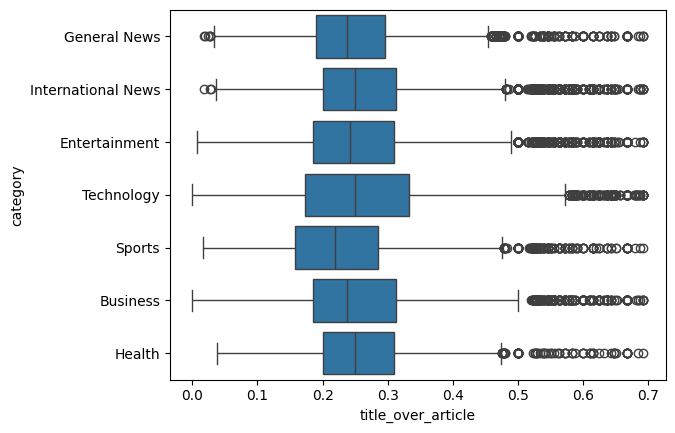

In [42]:
sns.boxplot(data = dev_df[dev_df['title_over_article'] <= dev_df['title_over_article'].quantile(0.95)], x='title_over_article', y='category')

In [43]:
dev_df[dev_df['title_over_article'] > 15]

Id         source                                              title  \
384    384  International  With South Korean concession on beef, it and U...   
5634  5634  International  Chinese lawmakers are likely to approve bills ...   

     article  page_rank            timestamp  label  category  \
384       \N          5  2007-03-08 16:17:41      1  Business   
5634      \N          5  2007-03-01 15:59:23      1  Business   

           timestamp_new  year  ...  hour  weekday  week  article_clean  \
384  2007-03-08 16:17:41  2007  ...    16        3    10              n   
5634 2007-03-01 15:59:23  2007  ...    15        3     9              n   

      article_length                                        title_clean  \
384                1  with south korean concession on beef it and u ...   
5634               1  chinese lawmakers are likely to approve bills ...   

      title_length article_length_category  title_length_category  \
384             17              Very Short                   Long   
5634            20              Very Short                   Long   

     title_over_article  
384                17.0  
5634               20.0  

[2 rows x 22 columns]

In [31]:
import sys
sys.exit(0)

SystemExit: 0

## Text discovery

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import re


def clean_text(text: str) -> str:
    
    if pd.isna(text) or text is None:
        return ""
    

    text = str(text)
    

    text = text.lower()
    
    
    text = re.sub(r'https?://\S+|www\.\S+', ' ', text)
    
 
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)
    
  
    text = re.sub(r'\s+', ' ', text).strip()
    

    text = re.sub(r'\b\w{1}\b', '', text)
    

    text = re.sub(r'\b(href|src|img|height|width|alt|align|left)\b', '', text)
    
    return text



for i in range(len(LABEL_NAMES)):
    category = LABEL_NAMES[i]
    dev_df_clean_category = dev_df_clean[dev_df_clean['category'] == category]
    text = " ".join(dev_df_clean_category['clean_article'].tolist())
    print(f"Generating word cloud for category: {category}")

    wc = WordCloud(
        width=1200,
        height=800,
        background_color="white",
        stopwords=STOPWORDS,
        collocations=False,  
        max_words=200,
        
    ).generate(text)

    plt.figure(figsize=(12, 8))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

### Title suffixes
I noticed that some title contain suffixews between brackets at the end of the text, e.g. "(AP)", "(Reuters)",  etc. It would be interesting to see the distribution of these suffixes. And if some of them could be predictive of the label.

NameError: name 'col' is not defined

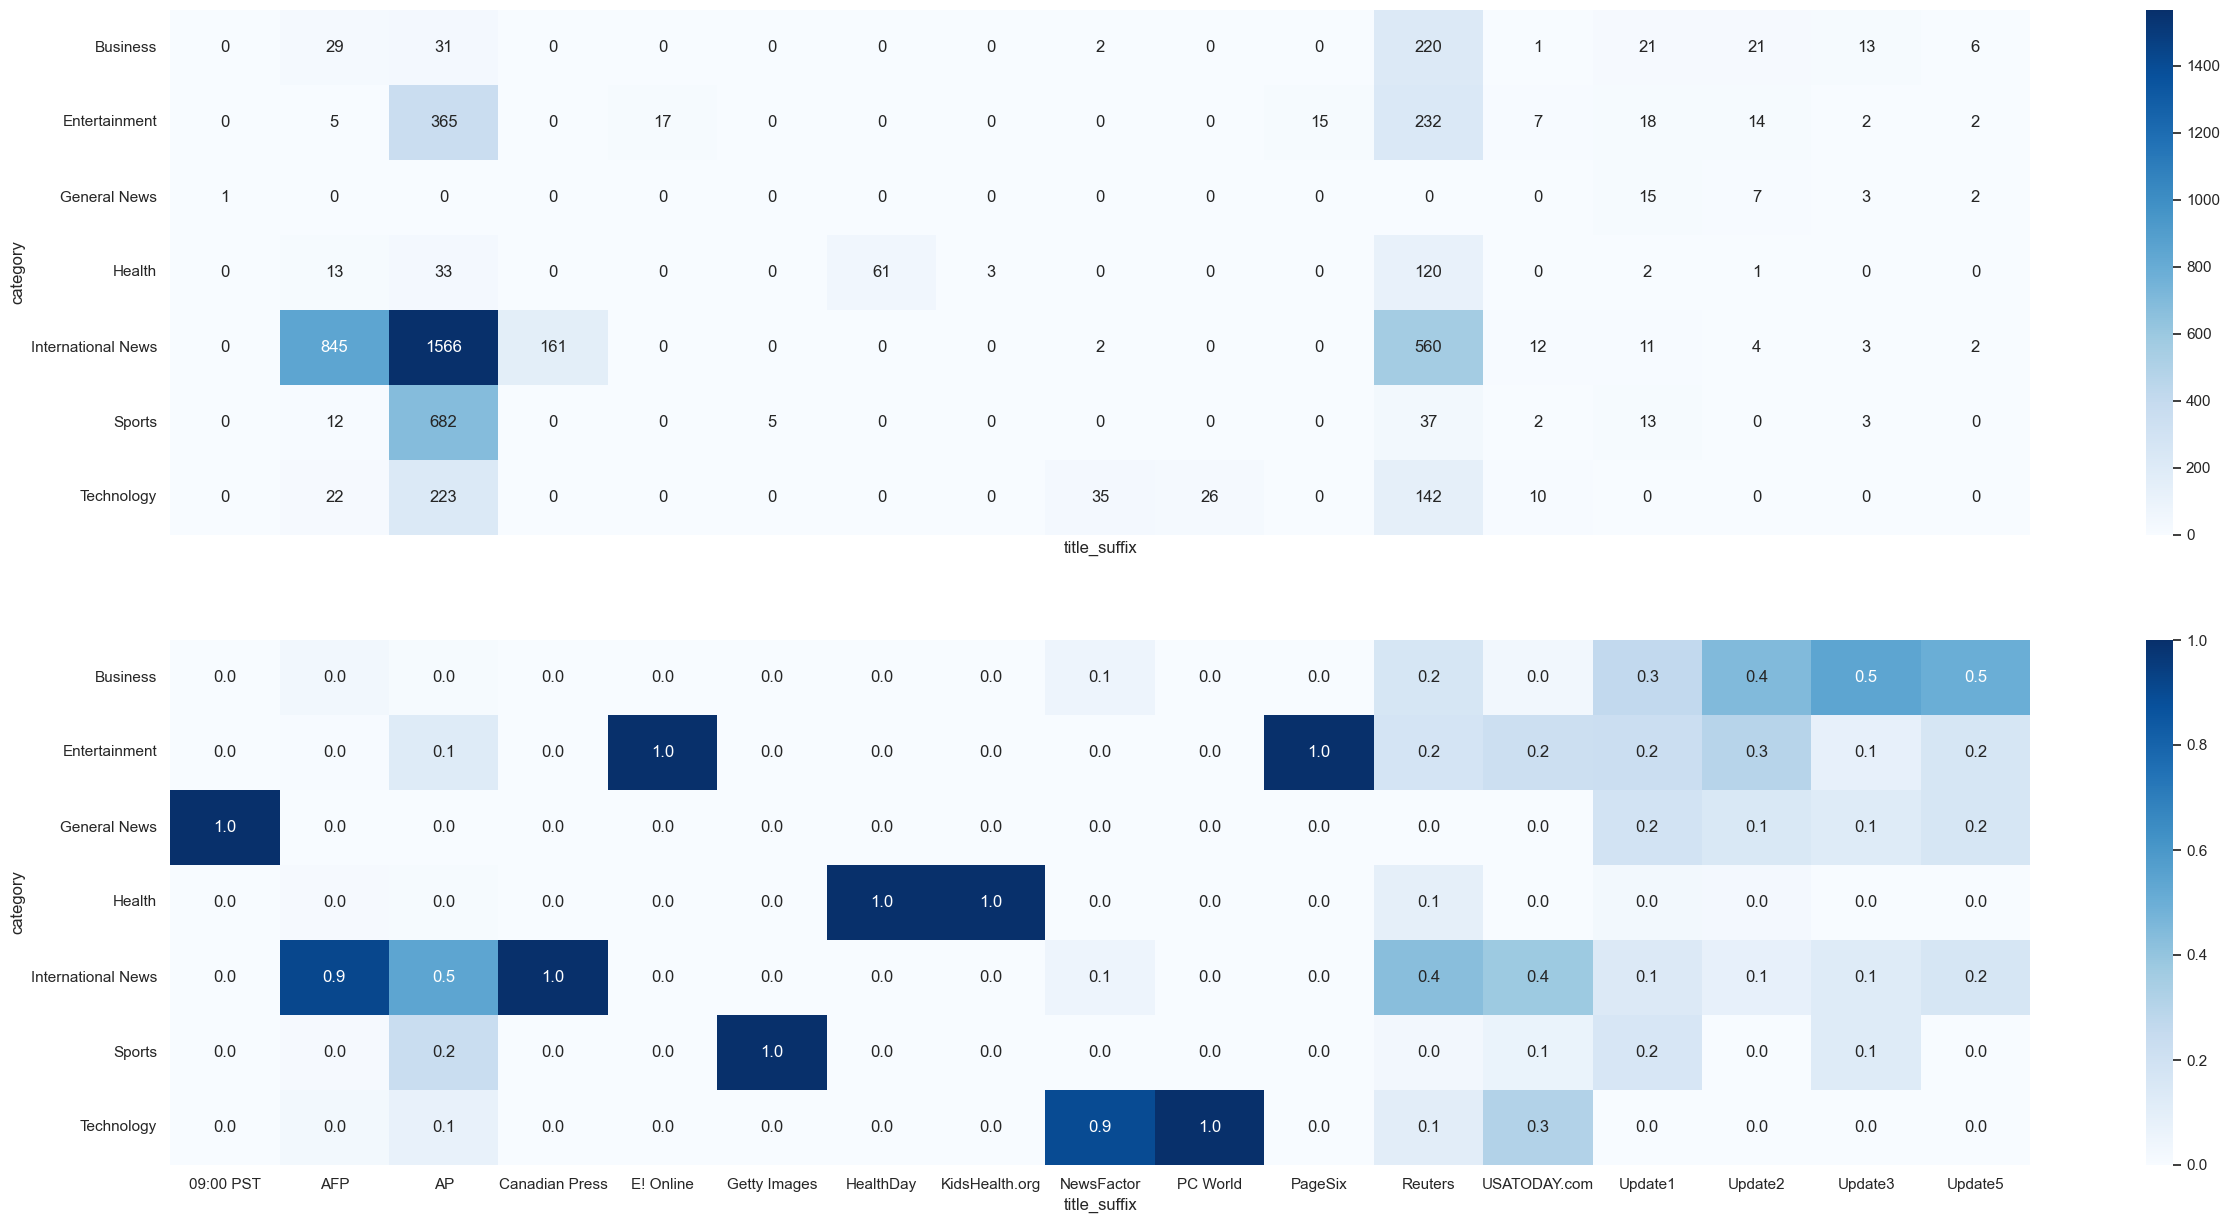

In [107]:


def extract_title_suffix_features(title: str):
    
    if isinstance(title, float):
        return None
    # Find words between brackets
    suffix_pattern = r'\(([^)]+)\)\s*$' #$ is usefull to find only at the end of the string
    match = re.search(suffix_pattern, title)
    title_clean = re.sub(suffix_pattern, '', title).strip() if match else title
    
    return match.group(1) if match else None
    
def apply_title_extraction(df):
    df['title_suffix'] = df['title'].apply(extract_title_suffix_features)
    return df


dev_df_title_suff = apply_title_extraction(dev_df)
dev_title_suffix_small = dev_df_title_suff[['title_suffix', 'category']]
dev_title_suffix_small = dev_title_suffix_small.dropna()

# Top 5 most common title suffixes for each category
grouped = dev_title_suffix_small.groupby(by = ['category', 'title_suffix']).size()
top_5_title_suff = grouped.groupby(level=0, group_keys=False).nlargest()


top_5_title_suff = top_5_title_suff.reset_index(name='count')['title_suffix'].unique()


dev_df_top_title_suffixs = dev_df[dev_df['title_suffix'].isin(top_5_title_suff)]


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(30, 15), sharex=True)
matrix = dev_df_top_title_suffixs.groupby(['category', 'title_suffix']).size().unstack(fill_value=0)
relative_matrix = (matrix / matrix.sum(axis=0)) 
    
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', ax=ax1)
sns.heatmap(relative_matrix, annot=True, fmt='.1f', cmap='Blues', ax=ax2)
    
ax1.set_title(f'Count of Categories by {col.capitalize()} for Top 5 title_suffixs per category')
ax2.set_title(f'Relative Percentage of Categories by {col.capitalize()} for Top 5 title_suffixs per category')



    




Let's create the top suffixes for each category. Let's use the best from the above . We do no include business and general news due to the poor informative value of these categories.

In [ ]:
tech_suffixes = ['PC World', 'NewsFactor', 'MacCentral', 'SPACE.com','Ziff Davis', 'washingtonpost.com']
    
sport_suffixes = ['Getty Images'] # The others seem scores to me

int_news_suffixes = ['AFP','Canadian Press','Chicago Tribune']

health_suffixes = ['HealthDay', 'KidsHealth.org']

ent_health_suffixes = ['AdWeek.com', 'E! Online', 'Fashion Wire Daily', 'PageSix','Variety', 'Playbill']

suffix_dict = {
    'is_tech_suffix': tech_suffixes,
    'is_sport_suffix': sport_suffixes,
    'is_int_news_suffix': int_news_suffixes,
    'is_health_suffix': health_suffixes,
    'is_ent_suffix': ent_health_suffixes
}

# Create binary columns for each suffix type
for col_name, suffix_list in suffix_dict.items():
    dev_df[col_name] = dev_df['title_suffix'].isin(suffix_list).astype(int)

# Top 5 most common title suffixes for each category
grouped = dev_title_suffix_small.groupby(by = ['category', 'title_suffix']).size()
top_5_title_suff = grouped.groupby(level=0, group_keys=False).nlargest()


top_5_title_suff = top_5_title_suff.reset_index(name='count')['title_suffix'].unique()


dev_df_top_title_suffixs = dev_df[dev_df['title_suffix'].isin(top_5_title_suff)]


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(30, 15), sharex=True)
matrix = dev_df_top_title_suffixs.groupby(['category', 'title_suffix']).size().unstack(fill_value=0)
relative_matrix = (matrix / matrix.sum(axis=0)) 
    
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', ax=ax1)
sns.heatmap(relative_matrix, annot=True, fmt='.1f', cmap='Blues', ax=ax2)
    
ax1.set_title(f'Count of Categories by {col.capitalize()} for Top 5 title_suffixs per category')
ax2.set_title(f'Relative Percentage of Categories by {col.capitalize()} for Top 5 title_suffixs per category')






### Article Discovery (link focuses)
I noticed that some articles contain one ore more links (web pages, images, videos, etc). It would be interesting to see the distribution of these links. And if some of them could be predictive of the label. Maybe I can discover something by categorizing the types of urls (feed, news, social media, etc).

In [49]:
from urllib.parse import urlparse
from collections import Counter
import re

def extract_link(article: str, first_only=False):
    if pd.isna(article) or article is None:
        return None

    if not isinstance(article, str):
        article = str(article)
    
    url_pattern = r'https?://[^\s<>"{}|\\^`\[\]]+'
    
    match = re.findall(url_pattern, article)
    article_clean = re.sub(url_pattern, '', article).strip() if match else article
    
    if first_only:
        return match[0] if match else None
    return match if match else None

def extract_domain(link: str):
    if pd.isna(link) or link is None:
        return None
    parsed = urlparse(link)
    domain = parsed.netloc.replace('www.', '')
    return domain 


def categorize_link(link: str):
    link_lower = link.lower()
    
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.webp', '.svg', '.ico']
    image_domains = ['yimg.com', 'img.', 'images.', 'static.']
    feed_patterns = ['feeds.', 'rss.', 'feed.', 'feedburner']
    ad_domains = ['doubleclick', 'adlog', 'pheedo', 'ad.']
    
    # images
    for ext in image_extensions:
        if ext in link_lower:
            return 'image'
    
    # Images
    for img_dom in image_domains:
        if img_dom in link_lower:
            return 'image'
    
    # Feed RSS
    for feed in feed_patterns:
        if feed in link_lower:
            return 'feed'
    
    # Advertising
    for ad in ad_domains:
        if ad in link_lower:
            return 'ad'
    
    return 'content'
    
    
    
    
    
links = extract_link("<p><a href=""://us.rd.yahoo.com/dailynewshttp/rss/europe/*http://news.yahoo.com/s/nm/20060922/wl_nm/transport_germany_accident_dc""><img src=""http://d.yimg.com/us.yimg.com/p/rids/20060922/i/r83709231.jpg?x=47&y=130&sig=dF38yH9MhxP9zBLqrj3SMw--"" align=""left"" height=""130"" width=""47"" alt=""An aerial view shows the crash site of a Transrapid high-speed train in the northern German region of Emsland near the town of Lathen, September 22, 2006. REUTERS/Bodo Marks"" border=""0"" /></a>Reuters - A high tech German train \
carrying 29 people smashed into a maintenance vehicle on a \
trial run in northern Germany on Friday, killing at least one \
and trapping 10 more in the wreckage, a local official said.</p><br clear=""all""/>")
print(links)


for link in links:
    domain = extract_domain(link)
    category = categorize_link(link)
    print(f"Link: {link}, Domain: {domain}, Category: {category}")


['http://news.yahoo.com/s/nm/20060922/wl_nm/transport_germany_accident_dc', 'http://d.yimg.com/us.yimg.com/p/rids/20060922/i/r83709231.jpg?x=47&y=130&sig=dF38yH9MhxP9zBLqrj3SMw--']
Link: http://news.yahoo.com/s/nm/20060922/wl_nm/transport_germany_accident_dc, Domain: news.yahoo.com, Category: content
Link: http://d.yimg.com/us.yimg.com/p/rids/20060922/i/r83709231.jpg?x=47&y=130&sig=dF38yH9MhxP9zBLqrj3SMw--, Domain: d.yimg.com, Category: image


In [58]:
links = extract_link("<p><a href=""http://us.rd.yahoo.com/dailynews/rss/entertainment/*http://news.yahoo.com/s/ap/20060801/ap_en_ot/authors_reading_rowling""><img src=""http://d.yimg.com/us.yimg.com/p/ap/20060801/capt.4b209be8b6fc422dae233c0f88cd3bfe.authors_reading_rowling_nysw117.jpg?x=130&y=84&sig=2GpDSy9tkMmUIFWMNWmbSw--"" align=""left"" height=""84"" width=""130"" alt=""Authors John Irving, left,  J.K. Rowling, center, and Stephen King pose for a picture during a press conference Tuesday, Aug 1, 2006, in New York.  The authors are appearing together on August 1 and 2 to read from their books as a fund raiser for Doctors Without Borders and The Haven Foundation.   (AP Photo/Seth Wenig)"" border=""0"" /></a>AP - Author J.K. Rowling says that writing the last of her seven Harry Potter books is proving to be ""fun in a way that it hasn't been before.""</p><br clear=""all""/>")
print(links)

['http://us.rd.yahoo.com/dailynews/rss/entertainment/*http://news.yahoo.com/s/ap/20060801/ap_en_ot/authors_reading_rowling', 'http://d.yimg.com/us.yimg.com/p/ap/20060801/capt.4b209be8b6fc422dae233c0f88cd3bfe.authors_reading_rowling_nysw117.jpg?x=130&y=84&sig=2GpDSy9tkMmUIFWMNWmbSw--']


In [60]:
import re
from urllib.parse import urlsplit
import tldextract

URL_RE = re.compile(r'https?://[^\s"<>]+', re.IGNORECASE)

def extract_urls(s: str) -> list[str]:
    # Estrae tutti gli URL nella stringa anche se è sporca
    return URL_RE.findall(s)

def pick_canonical_url(s: str) -> str | None:
    # Caso tipico Yahoo: ".../*http://target..."
    if "*" in s:
        after_star = s.split("*")[-1]
        urls = extract_urls(after_star)
        if urls:
            return urls[-1]

    urls = extract_urls(s)
    return urls[-1] if urls else None

def parse_url_full(url: str) -> dict:
    parts = urlsplit(url)
    host = (parts.hostname or "").lower()

    ext = tldextract.extract(host)
    # ext.subdomain, ext.domain, ext.suffix (suffix = public suffix, es "co.uk")
    registrable_domain = ".".join([p for p in [ext.domain, ext.suffix] if p])

    return {
        "url": url,
        "scheme": parts.scheme,
        "netloc": parts.netloc,
        "host": host,
        "path": parts.path,
        "query": parts.query,
        "fragment": parts.fragment,
        # “livelli”
        "public_suffix": ext.suffix,                 # es: "com", "co.uk"
        "domain": ext.domain,                        # es: "yahoo"
        "subdomain": ext.subdomain,                  # es: "news"
        "registrable_domain": registrable_domain,    # es: "yahoo.com"
        # se vuoi i label (terzo livello ecc.)
        "host_labels": host.split(".") if host else []
    }

# ---- ESEMPIO ----
s = links[0]
u = pick_canonical_url(s)
print(u)
print(parse_url_full(u))

http://news.yahoo.com/s/ap/20060801/ap_en_ot/authors_reading_rowling
{'url': 'http://news.yahoo.com/s/ap/20060801/ap_en_ot/authors_reading_rowling', 'scheme': 'http', 'netloc': 'news.yahoo.com', 'host': 'news.yahoo.com', 'path': '/s/ap/20060801/ap_en_ot/authors_reading_rowling', 'query': '', 'fragment': '', 'public_suffix': 'com', 'domain': 'yahoo', 'subdomain': 'news', 'registrable_domain': 'yahoo.com', 'host_labels': ['news', 'yahoo', 'com']}


In [71]:
import re
from urllib.parse import urlsplit, unquote

URL_RE = re.compile(r'https?://[^\s"<>]+', re.IGNORECASE)

def _extract_first_url(s: str) -> str | None:
    m = URL_RE.search(s)
    return m.group(0) if m else None

def _split_path_segments(path: str) -> list[str]:
    # "/a/b/c" -> ["a","b","c"]
    return [seg for seg in path.split("/") if seg]

def parse_yahoo_wrapped_url(raw: str) -> dict:
    raw = raw.strip().strip('"').strip("'")

    # 1) split su "*": spesso è "redirect * target"
    if "*" in raw:
        left, right = raw.split("*", 1)
        redirect_url = _extract_first_url(left) or left
        target_url = _extract_first_url(right) or right
    else:
        redirect_url = _extract_first_url(raw)
        target_url = None

    out = {"raw": raw, "redirect": None, "target": None, "wrapper_meta": {}}

    # 2) parse redirect
    if redirect_url:
        r = urlsplit(redirect_url)
        out["redirect"] = {
            "url": redirect_url,
            "scheme": r.scheme,
            "host": (r.hostname or "").lower(),
            "path": r.path,
            "path_segments": _split_path_segments(r.path),
            "query": r.query,
            "fragment": r.fragment,
        }

        # 3) meta “comode” dal wrapper: es. dailynews/rss/entertainment
        segs = out["redirect"]["path_segments"]
        # prova a catturare pattern noti: ".../rss/<category>/..."
        if "rss" in segs:
            i = segs.index("rss")
            out["wrapper_meta"]["has_rss"] = True
            out["wrapper_meta"]["rss_category"] = segs[i+1] if i+1 < len(segs) else None
        else:
            out["wrapper_meta"]["has_rss"] = False

    # 4) parse target
    if target_url:
        t = urlsplit(target_url)
        out["target"] = {
            "url": target_url,
            "scheme": t.scheme,
            "host": (t.hostname or "").lower(),
            "path": t.path,
            "path_segments": _split_path_segments(t.path),
            "query": t.query,
            "fragment": t.fragment,
        }

    return out

# ---- esempio ----
raw = "http://rss.csmonitor.com/~a/feeds/usa?a=yVNyUA"
info = parse_yahoo_wrapped_url(raw)
info

{'raw': 'http://rss.csmonitor.com/~a/feeds/usa?a=yVNyUA',
 'redirect': {'url': 'http://rss.csmonitor.com/~a/feeds/usa?a=yVNyUA',
  'scheme': 'http',
  'host': 'rss.csmonitor.com',
  'path': '/~a/feeds/usa',
  'path_segments': ['~a', 'feeds', 'usa'],
  'query': 'a=yVNyUA',
  'fragment': ''},
 'target': None,
 'wrapper_meta': {'has_rss': False}}

In [ ]:
links

In [68]:
for cat in dev_df['category'].unique():
    print("="*20)
    print(f"Category {cat}")
    dev_df_cat = dev_df[dev_df['category'] == cat]
    all_doc = len(dev_df_cat)
    counter = 0
    all_links = []
    for article in dev_df_cat['article']:
        links = extract_link(article)
        if links:
            counter += 1
            all_links.append(links)
    print("Number of articles:", all_doc)
    print("Number of articles with links:", counter, f"({(counter/all_doc)*100:.2f}%)")
    
    print("Average number of links per article:", np.mean([len(links) for links in all_links]))
    
    flat_links = [link for sublist in all_links for link in sublist]
    domains = [extract_domain(link) for link in flat_links]
    domain_counts = Counter(domains)
    print(f"Top 10 domains: {domain_counts.most_common(10)}")
    
    cat_links = [categorize_link(link) for link in flat_links]
    cat_counts = Counter(cat_links)
    print(f"Top 10 domains: {cat_counts.most_common(10)}")
    
    
    

    print()


Category General News
Number of articles: 13053
Number of articles with links: 1663 (12.74%)
Average number of links per article: 3.445580276608539
Top 10 domains: [('rss.cnn.com', 3814), ('pheedo.com', 776), ('feeds.feedburner.com', 452), ('newsisfree.com', 397), ('feeds.reuters.com', 279), ('investor.reuters.com', 9), ('indianexpress.com', 1), ('ire.org', 1), ('download.', 1)]
Top 10 domains: [('feed', 4545), ('content', 401), ('image', 395), ('ad', 389)]

Category International News
Number of articles: 23542
Number of articles with links: 4485 (19.05%)
Average number of links per article: 2.354738015607581
Top 10 domains: [('us.rd.yahoo.com', 3741), ('d.yimg.com', 3544), ('rss.csmonitor.com', 1697), ('feeds.reuters.com', 585), ('feeds.feedburner.com', 340), ('us.news3.yimg.com', 198), ('ad.doubleclick.net', 196), ('topix.net', 164), ('pheedo.com', 63), ('investor.reuters.com', 10)]
Top 10 domains: [('content', 3933), ('image', 3785), ('feed', 2622), ('ad', 221)]

Category Entertainm

Text(0.5, 1.0, 'Relative Percentage of Categories by Week for Top 5 first_link_domain per category')

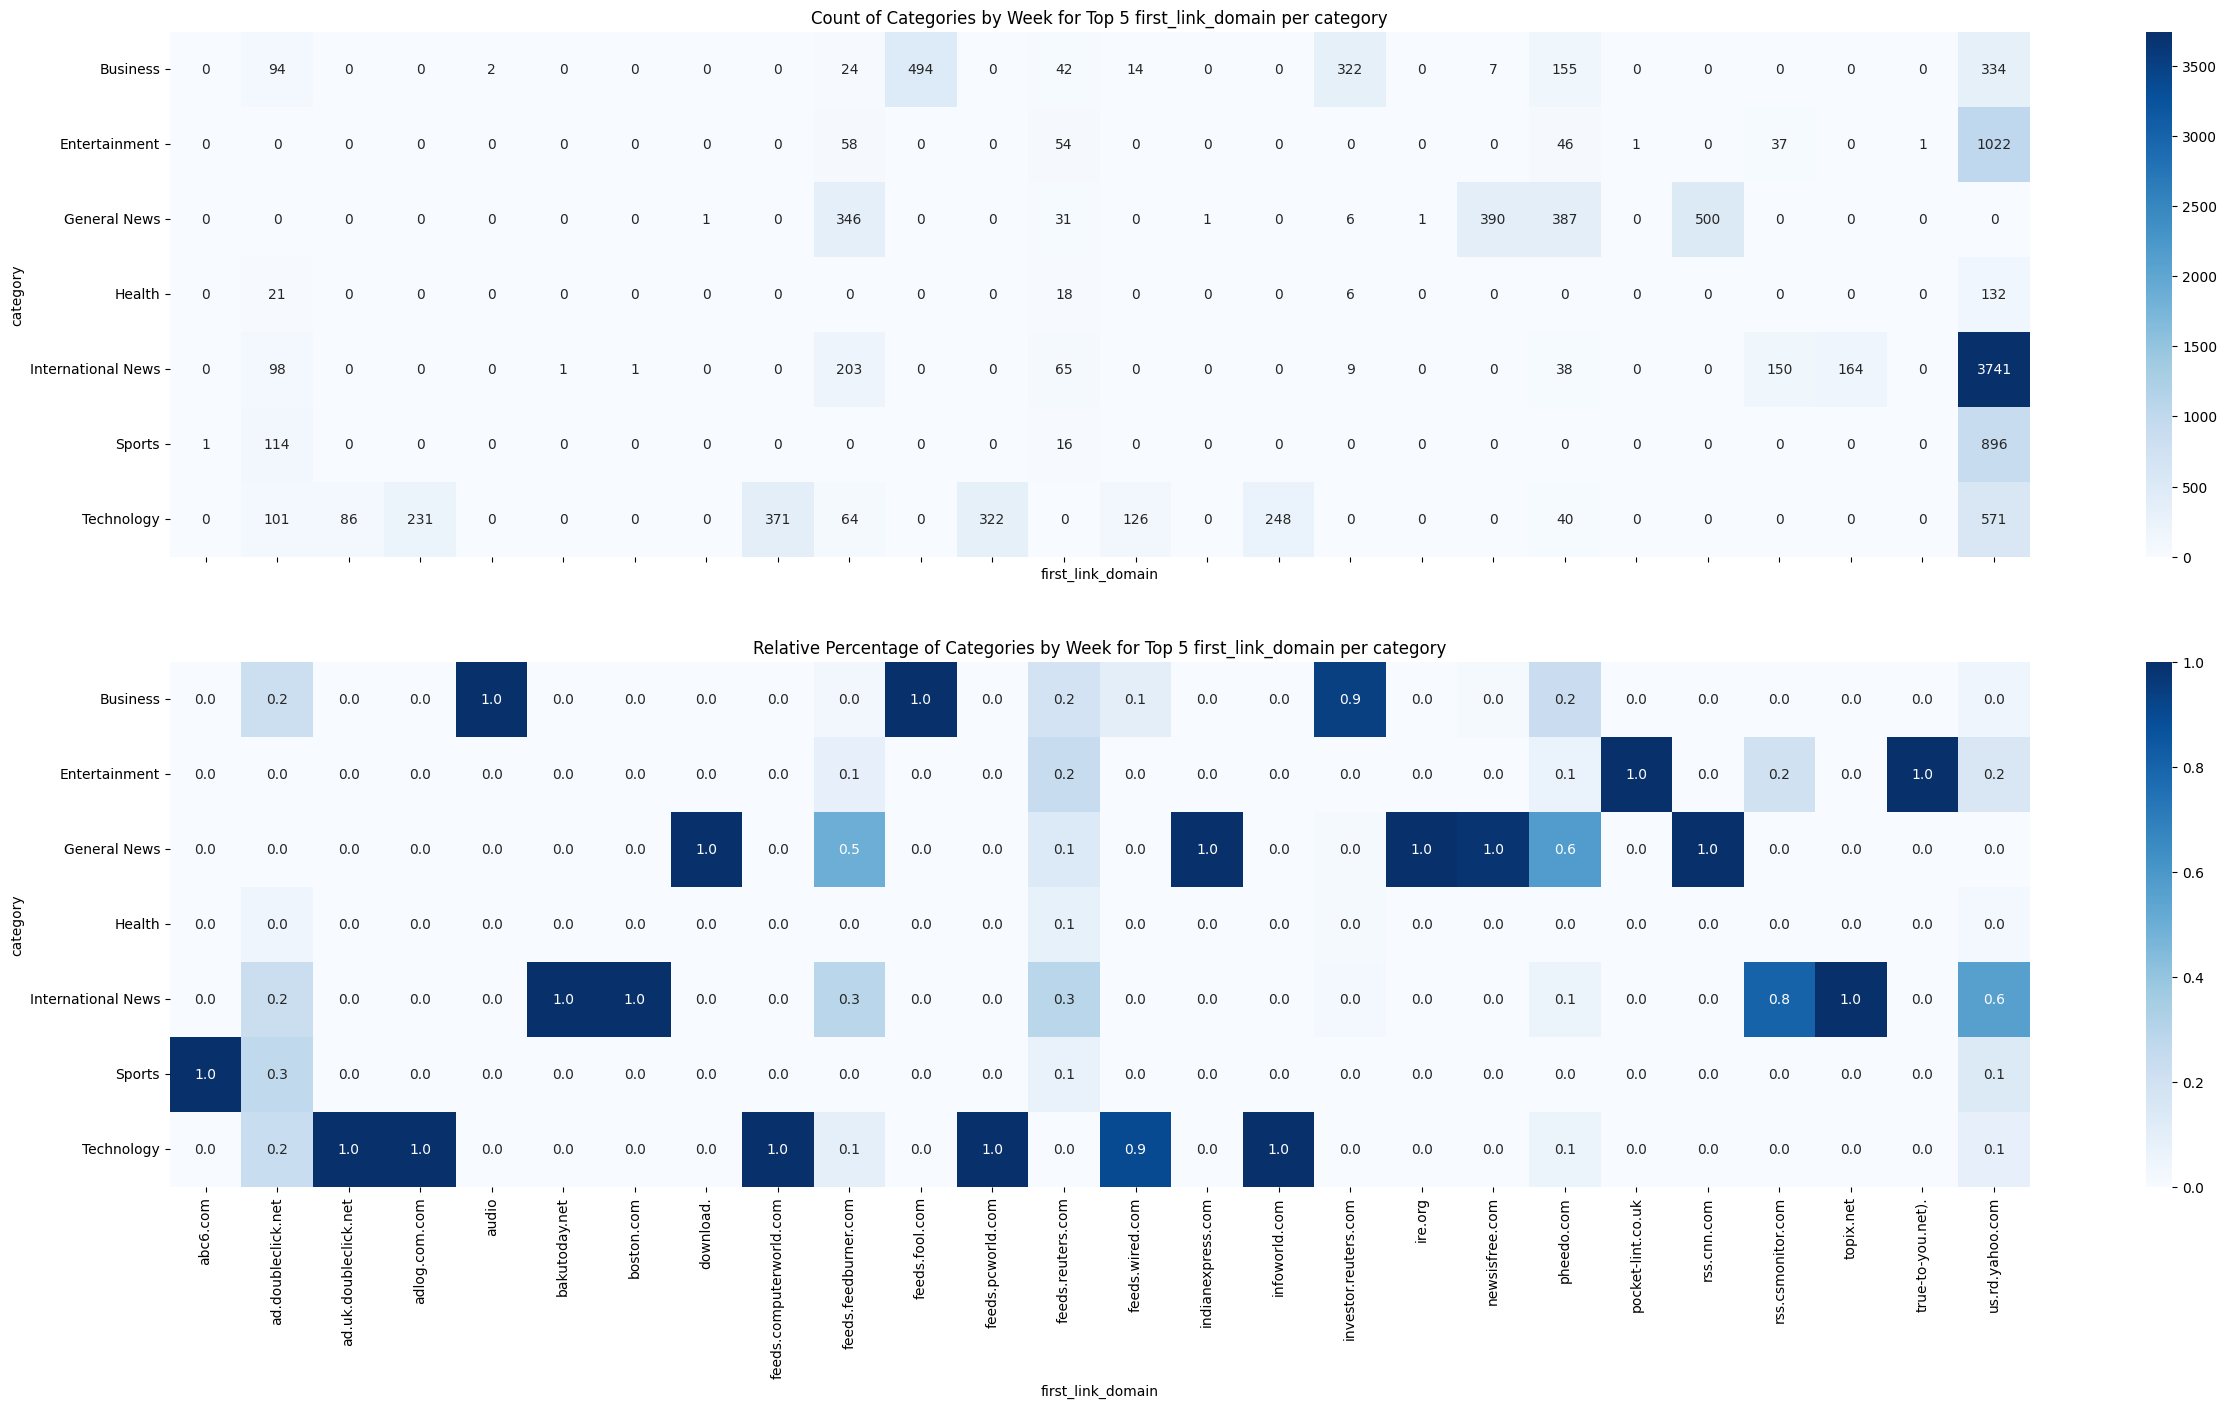

In [65]:
def apply_domain_extraction(df):
    df['first_link_domain'] = df['article'].apply(lambda row: extract_link(row, first_only=True)).apply(extract_domain) 
    return df 

dev_df_domain = apply_domain_extraction(dev_df)


# Top 5 most common title suffixes for each category
grouped = dev_df_domain.groupby(by = ['category', 'first_link_domain']).size()
top_5_title_suff = grouped.groupby(level=0, group_keys=False).nlargest(10)


top_5_title_suff = top_5_title_suff.reset_index(name='count')['first_link_domain'].unique()


dev_df_top_title_suffixs = dev_df[dev_df['first_link_domain'].isin(top_5_title_suff)]


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(30, 15), sharex=True)
matrix = dev_df_top_title_suffixs.groupby(['category', 'first_link_domain']).size().unstack(fill_value=0)
relative_matrix = (matrix / matrix.sum(axis=0)) 
    
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', ax=ax1)
sns.heatmap(relative_matrix, annot=True, fmt='.1f', cmap='Blues', ax=ax2)
    
ax1.set_title(f'Count of Categories by {col.capitalize()} for Top 5 first_link_domain per category')
ax2.set_title(f'Relative Percentage of Categories by {col.capitalize()} for Top 5 first_link_domain per category')

In [66]:
for cat in relative_matrix.index:
    print("="*20)
    print(f"Category {cat}")
    cat_links = relative_matrix.loc[cat]
    print(cat_links[cat_links > 0.95].sort_values(ascending=False))
    print()

Category Business
first_link_domain
audio             1.0
feeds.fool.com    1.0
Name: Business, dtype: float64

Category Entertainment
first_link_domain
pocket-lint.co.uk    1.0
true-to-you.net).    1.0
Name: Entertainment, dtype: float64

Category General News
first_link_domain
download.            1.000000
indianexpress.com    1.000000
ire.org              1.000000
rss.cnn.com          1.000000
newsisfree.com       0.982368
Name: General News, dtype: float64

Category Health
Series([], Name: Health, dtype: float64)

Category International News
first_link_domain
bakutoday.net    1.0
boston.com       1.0
topix.net        1.0
Name: International News, dtype: float64

Category Sports
first_link_domain
abc6.com    1.0
Name: Sports, dtype: float64

Category Technology
first_link_domain
ad.uk.doubleclick.net      1.0
adlog.com.com              1.0
feeds.computerworld.com    1.0
feeds.pcworld.com          1.0
infoworld.com              1.0
Name: Technology, dtype: float64



In [ ]:
tech_domains = ["ad.uk.doubleclick.net", "adlog.com.com", "feeds.computerworld.com", "feeds.pcworld.com", "infoworld.com"]

int_news_domains = ["bakutoday.net", "boston.com", "topix.net"]

gen_news_domains = ["rss.cnn.com", "newsisfree.com"] 

business_domains = ["feeds.fool.com"]


suffix_dict = {
    'is_tech_domains': tech_domains,
    'is_gen_news_domains': gen_news_domains,
    'is_int_news_domains': int_news_domains,
    'is_business_domains': business_domains
}

# Create binary columns for each suffix type
for col_name, suffix_list in suffix_dict.items():
    dev_df_domain[col_name] = dev_df_domain['first_link_domain'].isin(suffix_list).astype(int)

In [186]:
dev_df_domain['n_links'] = dev_df_domain['article'].apply(lambda x: len(extract_link(x)) if extract_link(x) is not None else 0)

In [188]:
dev_df_domain['n_images'] = dev_df_domain['article'].apply(lambda x: len([link for link in extract_link(x) if categorize_link(link) == 'image']) if extract_link(x) is not None else 0)
dev_df_domain['n_ads'] = dev_df_domain['article'].apply(lambda x: len([link for link in extract_link(x) if categorize_link(link) == 'ad']) if extract_link(x) is not None else 0)
dev_df_domain['n_feeds'] = dev_df_domain['article'].apply(lambda x: len([link for link in extract_link(x) if categorize_link(link) == 'feed']) if extract_link(x) is not None else 0)

In [ ]:
dev_df_domain

In [191]:
dev_df_domain.sort_values(by=['source', 'title', 'article', 'label', 'timestamp_new'], 
                          ascending=[True, True, True, True, False], inplace=True)

# Drop duplicates, keeping the first occurrence (which will be the one with a valid timestamp_new if possible)
dev_df_domain.drop_duplicates(subset=['source', 'title', 'article', 'label'], inplace=True)

In [211]:
grouped = dev_df_domain.groupby(by = ['source','title','article'], as_index=False)['label'].agg({'nunique'})
index = grouped[grouped['nunique'] >= 2].sort_values(by='nunique', ascending=False).index

dev_df_domain.iloc[~dev_df_domain.index.isin(index)].drop(columns=['Id','timestamp', 'is_ent_news_suffix']).sample(frac=0.95).to_csv("data/data.csv", index=False)

In [72]:
RSS_TO_LABEL = {
    # International (label 0)
    'world': 0,
    'europe': 0,
    'politics': 0,
    'elections': 0,
    'us': 0,
    
    # Business (label 1)
    'business': 1,
    
    # Technology (label 2)
    'tech': 2,
    'science': 2,
    
    # Entertainment (label 3)
    'entertainment': 3,
    
    # Sports (label 4)
    'sports': 4,
    
    # General (label 5)
    'cnn_topstories': 5,
    
    # Health (label 6)
    'health': 6,
}

LABEL_NAMES = {
    0: 'International',
    1: 'Business',
    2: 'Technology',
    3: 'Entertainment',
    4: 'Sports',
    5: 'General',
    6: 'Health'
}


# =============================================================================
# FUNZIONI DI ESTRAZIONE
# =============================================================================

def extract_rss_label(text):
    """
    Estrae la label predetta dalla categoria RSS presente nel testo.
    
    Questa feature ha 100% di accuratezza ma copre solo ~9% degli articoli.
    
    Parameters
    ----------
    text : str
        Testo dell'articolo (colonna 'article')
    
    Returns
    -------
    int or None
        Label predetta (0-6) se trova RSS category, None altrimenti
    """
    if pd.isna(text) or not isinstance(text, str):
        return None
    
    # Pattern per estrarre la categoria RSS
    match = re.search(r'/rss/([a-z_]+)', text.lower())
    if match:
        category = match.group(1).split('?')[0]  # Rimuovi query string
        return RSS_TO_LABEL.get(category, None)
    return None


def extract_all_links(text):
    """
    Estrae tutti i link da un testo, inclusi quelli annidati (separati da *).
    
    Gestisce:
    1. Link standard http/https
    2. Link dopo href= o src=
    3. Link annidati separati da *
    
    Parameters
    ----------
    text : str
        Testo dell'articolo
    
    Returns
    -------
    list
        Lista di URL estratti
    """
    if pd.isna(text) or not isinstance(text, str):
        return []
    
    links = []
    
    # Pattern 1: Link standard http/https
    for match in re.findall(r'https?://[^\s<>"\')\]]+', text, re.IGNORECASE):
        links.append(match)
    
    # Pattern 2: href="..." o src="..."
    for match in re.findall(r'(?:href|src)=["\']([^"\']+)["\']', text, re.IGNORECASE):
        if 'http' in match.lower():
            links.append(match)
    
    # Separa link annidati (separati da *)
    all_links = []
    for link in links:
        if '*http' in link:
            parts = link.split('*http')
            all_links.append(parts[0])
            for part in parts[1:]:
                all_links.append('http' + part)
        else:
            all_links.append(link)
    
    return all_links


def extract_link_info(url):
    """
    Estrae informazioni strutturate da un URL.
    
    Parameters
    ----------
    url : str
        URL da analizzare
    
    Returns
    -------
    dict
        Dizionario con: domain, domain_main, path, path_parts, query
    """
    try:
        # Pulisci URL
        url = re.sub(r'[<>"\')\]\s]+$', '', url)
        parsed = urlparse(url)
        
        domain = parsed.netloc.split(':')[0] if parsed.netloc else ''
        domain_parts = domain.split('.')
        domain_main = '.'.join(domain_parts[-2:]) if len(domain_parts) >= 2 else domain
        
        return {
            'full_url': url,
            'domain': domain,
            'domain_main': domain_main,
            'path': parsed.path,
            'path_parts': [p for p in parsed.path.split('/') if p],
            'query': parsed.query
        }
    except:
        return None


def extract_link_features(text):
    """
    Estrae tutte le feature derivate dai link per un articolo.
    
    Parameters
    ----------
    text : str
        Testo dell'articolo
    
    Returns
    -------
    dict
        Dizionario con:
        - rss_label: label predetta da RSS (o None)
        - has_links: bool
        - num_links: int
        - has_yahoo_link: bool
        - has_reuters_link: bool
        - has_cnn_link: bool
        - has_img: bool
        - main_domain: dominio principale (o None)
    """
    features = {
        'rss_label': None,
        'has_links': False,
        'num_links': 0,
        'has_yahoo_link': False,
        'has_reuters_link': False,
        'has_cnn_link': False,
        'has_img': False,
        'main_domain': None
    }
    
    if pd.isna(text) or not isinstance(text, str):
        return features
    
    text_lower = text.lower()
    
    # Feature principale: RSS label
    features['rss_label'] = extract_rss_label(text)
    
    # Estrai link
    links = extract_all_links(text)
    features['has_links'] = len(links) > 0
    features['num_links'] = len(links)
    
    # Presenza di specifici domini
    features['has_yahoo_link'] = 'yahoo.com' in text_lower
    features['has_reuters_link'] = 'reuters.com' in text_lower
    features['has_cnn_link'] = 'cnn.com' in text_lower
    features['has_img'] = '<img' in text_lower
    
    # Dominio principale (primo link)
    if links:
        info = extract_link_info(links[0])
        if info:
            features['main_domain'] = info['domain_main']
    
    return features


# =============================================================================
# FUNZIONE PRINCIPALE PER PROCESSARE UN DATAFRAME
# =============================================================================

def add_link_features(df, article_col='article'):
    """
    Aggiunge le feature estratte dai link a un DataFrame.
    
    Parameters
    ----------
    df : pd.DataFrame
        DataFrame con gli articoli
    article_col : str
        Nome della colonna con il testo degli articoli
    
    Returns
    -------
    pd.DataFrame
        DataFrame con le nuove colonne di feature
    """
    # Estrai feature per ogni articolo
    link_features = df[article_col].apply(extract_link_features)
    
    # Espandi in colonne separate
    features_df = pd.DataFrame(link_features.tolist())
    
    # Aggiungi al DataFrame originale
    result = pd.concat([df, features_df], axis=1)
    
    return result

In [73]:
df_with_features = add_link_features(dev_df)
    
# Statistiche
print(f"\nTotale articoli: {len(dev_df)}")

with_rss = df_with_features['rss_label'].notna().sum()
print(f"Articoli con RSS label: {with_rss} ({with_rss/len(dev_df)*100:.1f}%)")

# Verifica accuratezza RSS
rss_rows = df_with_features[df_with_features['rss_label'].notna()]
if len(rss_rows) > 0:
    correct = (rss_rows['rss_label'] == rss_rows['label']).sum()
    print(f"Accuratezza RSS label: {correct/len(rss_rows)*100:.2f}%")

# Altre feature
print(f"\nArticoli con link: {df_with_features['has_links'].sum()}")
print(f"Articoli con link Yahoo: {df_with_features['has_yahoo_link'].sum()}")
print(f"Articoli con link Reuters: {df_with_features['has_reuters_link'].sum()}")
print(f"Articoli con immagini: {df_with_features['has_img'].sum()}")

print("\n" + "=" * 70)
print("ESEMPIO DI UTILIZZO PER CLASSIFICAZIONE")
print("=" * 70)
print("""
# Pipeline ibrida: Rule-based + ML

def predict_hybrid(df):
    predictions = []
    
    for idx, row in df.iterrows():
        # 1. Prova con RSS label (100% accuracy)
        rss_label = extract_rss_label(row['article'])
        if rss_label is not None:
            predictions.append(rss_label)
        else:
            # 2. Usa modello ML per il resto
            ml_pred = ml_model.predict([row])  # Il tuo modello
            predictions.append(ml_pred[0])
    
    return predictions
""")


Totale articoli: 79997
Articoli con RSS label: 7217 (9.0%)
Accuratezza RSS label: 100.00%

Articoli con link: 12412
Articoli con link Yahoo: 6705
Articoli con link Reuters: 570
Articoli con immagini: 11354

ESEMPIO DI UTILIZZO PER CLASSIFICAZIONE

# Pipeline ibrida: Rule-based + ML

def predict_hybrid(df):
    predictions = []

    for idx, row in df.iterrows():
        # 1. Prova con RSS label (100% accuracy)
        rss_label = extract_rss_label(row['article'])
        if rss_label is not None:
            predictions.append(rss_label)
        else:
            # 2. Usa modello ML per il resto
            ml_pred = ml_model.predict([row])  # Il tuo modello
            predictions.append(ml_pred[0])

    return predictions



In [75]:
df_with_features['rss_label'].value_counts(dropna=False)

rss_label
NaN    72780
0.0     3742
3.0     1022
4.0      896
2.0      571
5.0      520
1.0      334
6.0      132
Name: count, dtype: int64

In [ ]:
df_with_features

In [76]:
df_with_features

Id            source  \
0          0     AllAfrica.com   
1          1            Xinhua   
2          2             Yahoo   
3          3               BBC   
4          4             Yahoo   
...      ...               ...   
79992  79992             Yahoo   
79993  79993  All-Baseball.com   
79994  79994             Yahoo   
79995  79995             Voice   
79996  79996             Yahoo   

                                                   title  \
0      OPEC Boosts Nigeria&#39;s Oil Revenue By .82m Bpd   
1      Yearender: Mideast peace roadmap reaches dead-...   
2      Battleground Dispatches for Oct. 5 \\n    (CQP...   
3                       Air best to resuscitate newborns   
4      High tech German train crash kills at least on...   
...                                                  ...   
79992  Italy's embattled Prodi faces vote of confiden...   
79993                        Ding Dong, the Deal is Dead   
79994  Two bombs discovered in Sardinia after Berlusc...   
79995  Red Cross Report Alleges US Detainee Abuse at ...   
79996  UN: Myanmar allows early visit by envoy \\n   ...   

                                                 article  page_rank  \
0      THE Organisation of Petroleum Exporting Countr...          5   
1      Looking back at the major events that took pla...          5   
2      CQPolitics.com - Here are today's Battleground...          5   
3      Air rather than oxygen should be used to resus...          5   
4      <p><a href="://us.rd.yahoo.com/dailynewshttp/r...          5   
...                                                  ...        ...   
79992  <p><a href="http://us.rd.yahoo.com/dailynews/r...          5   
79993  As yesterday began, there was widespread antic...          5   
79994  AFP - Police discovered two bombs near the Sar...          5   
79995  A report by the International Committee of the...          5   
79996  <p><a href="http://us.rd.yahoo.com/dailynews/r...          5   

                 timestamp  label            category       timestamp_new  \
0      2004-09-16 22:39:53      5        General News 2004-09-16 22:39:53   
1      2004-12-17 19:01:14      0  International News 2004-12-17 19:01:14   
2      2006-10-05 18:42:29      0  International News 2006-10-05 18:42:29   
3      0000-00-00 00:00:00      0  International News                 NaT   
4      2006-09-22 17:28:57      0  International News 2006-09-22 17:28:57   
...                    ...    ...                 ...                 ...   
79992  2008-01-23 11:39:35      0  International News 2008-01-23 11:39:35   
79993  0000-00-00 00:00:00      4              Sports                 NaT   
79994  0000-00-00 00:00:00      0  International News                 NaT   
79995  0000-00-00 00:00:00      3       Entertainment                 NaT   
79996  2007-10-24 17:15:44      0  International News 2007-10-24 17:15:44   

       year  ...  title_over_article  first_link_domain  rss_label  has_links  \
0      2004  ...            0.272727                NaN        NaN      False   
1      2004  ...            0.296296                NaN        NaN      False   
2      2006  ...            0.200000                NaN        NaN      False   
3      <NA>  ...            0.277778                NaN        NaN      False   
4      2006  ...            0.285714     news.yahoo.com        0.0       True   
...     ...  ...                 ...                ...        ...        ...   
79992  2008  ...            0.300000    us.rd.yahoo.com        0.0       True   
79993  <NA>  ...            0.176471                NaN        NaN      False   
79994  <NA>  ...            0.312500                NaN        NaN      False   
79995  <NA>  ...            0.290323                NaN        NaN      False   
79996  2007  ...            0.200000    us.rd.yahoo.com        0.0       True   

       num_links has_yahoo_link  has_reuters_link has_cnn_link  has_img  \
0              0          False             False     